In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

from raw_util import clean_trace

# Entity Timelines

The purpose of this is to build some intuition for what's occuring in a single trace. See the Tor Rendezvouz Specification https://gitweb.torproject.org/torspec.git/tree/rend-spec.txt to read what each command is doing. 

In [24]:
shape_dict = {
 'BEGIN_DIR(13)': 'D',
 'DATA(2)': 'H',
 'CONNECTED(4)': 's',
 'END(3)': 'v',
 'BEGIN(1)': 'o',
 'SENDME(5)': 'H',

 'EXTEND(6)': 'o',
 'EXTEND2(14)': 'H',
 'EXTENDED(7)': 'v',
 'EXTENDED2(15)': 'd',

 'ESTABLISH_RENDEZVOUS(33)': 'd',
 'RENDEZVOUS_ESTABLISHED(39)': 'D',
 'RENDEZVOUS2(37)': 'v',

 'INTRODUCE1(34)': 'H',
 'INTRODUCE_ACK(40)': 's'
}

color_dict = {
 'BEGIN_DIR(13)': "#268bd2",
 'DATA(2)': "#586e75",
 'CONNECTED(4)': "#268bd2",
 'END(3)': "#268bd2",

 'BEGIN(1)': "#268bd2",
 'SENDME(5)': "#268bd2",

 'EXTEND(6)': "#cb4b16",
 'EXTEND2(14)': "#cb4b16",
 'EXTENDED(7)': "#cb4b16",
 'EXTENDED2(15)': "#cb4b16",

 'ESTABLISH_RENDEZVOUS(33)': "#2aa198",
 'RENDEZVOUS_ESTABLISHED(39)': "#2aa198",
 'RENDEZVOUS2(37)': "#2aa198",

 'INTRODUCE1(34)': "#859900",
 'INTRODUCE_ACK(40)': "#859900"}

def create_timeline_plot(timeline, color_dict, shape_dict, maximums=None,
                         titlestr="", fig_height=16, fig_width=20, marker_size=150.0):
    # Extract the data for plotting.
    x_data      = timeline['Elapsed Time']
    y_data      = timeline['Length']
    type_data   = timeline['Command']
    if maximums is None:
        maximums = timeline
    max_x = max(maximums['Elapsed Time'])
    max_y = max(maximums['Length'])
    
    # Get a list of unique types in the timeline data.
    unique_types = list(type_data.unique())
    
    # Create a figure and time-axis.
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    ax.hold(True)

    # For each event type, create a scatter plot.
    for event_type in unique_types:

        # Get the x and y values.i
        mask = timeline['Command'] == event_type
        data = timeline[mask]
        x_data = data['Elapsed Time']
        y_data = data['Length']

        # For light colors, make the edges darker.
        if color_dict[event_type] in ["yellow", "white", "pink"]:
            linewidth = 1.5
        else:
            linewidth = 0.0

        # Create the scatter plot.
        ax.scatter(x_data.values, y_data.values, label=event_type.split('(')[0],
                   marker=shape_dict[event_type], s=marker_size, c=color_dict[event_type],
                   linewidths=linewidth, alpha=0.80)

    # Make the figure pretty.
    fig.autofmt_xdate()
    ax.yaxis.set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_axis_bgcolor('whitesmoke')
    plt.xticks(rotation=80)
    plt.tick_params(labelsize=20)
    ax.set_xlabel('Elapsed Time (s)')
    ax.set_ylabel('Length (bytes)')
    ax.set_xlim([-0.25, max_x + 1])
    ax.set_ylim([-25, max_y + 200])
    
    handles, labels = ax.get_legend_handles_labels()

    # reverse the order
    #ax.legend(handles[::-1], labels[::-1])

    # or sort them by labels
    import operator
    hl = sorted(zip(handles, labels),
                key=operator.itemgetter(1))
    handles2, labels2 = zip(*hl)

    ax.legend(handles2, labels2, loc=2, numpoints=1, scatterpoints=1)
    
    # Remove grid lines
    ax.grid(False)
    # Remove plot frame
    ax.set_frame_on(False)
    # Set the title.
    plt.title(titlestr, fontsize=20)

    # Show the plot.
    plt.show()

    # Return the axis handle.
    return ax

In [25]:
traces_folder = '~/Documents/FingerprintSecureDrop/logging/batch-06-26_06:51:05'
df_00raw = clean_trace('{}/{}'.format(traces_folder, '0-0-raw'))

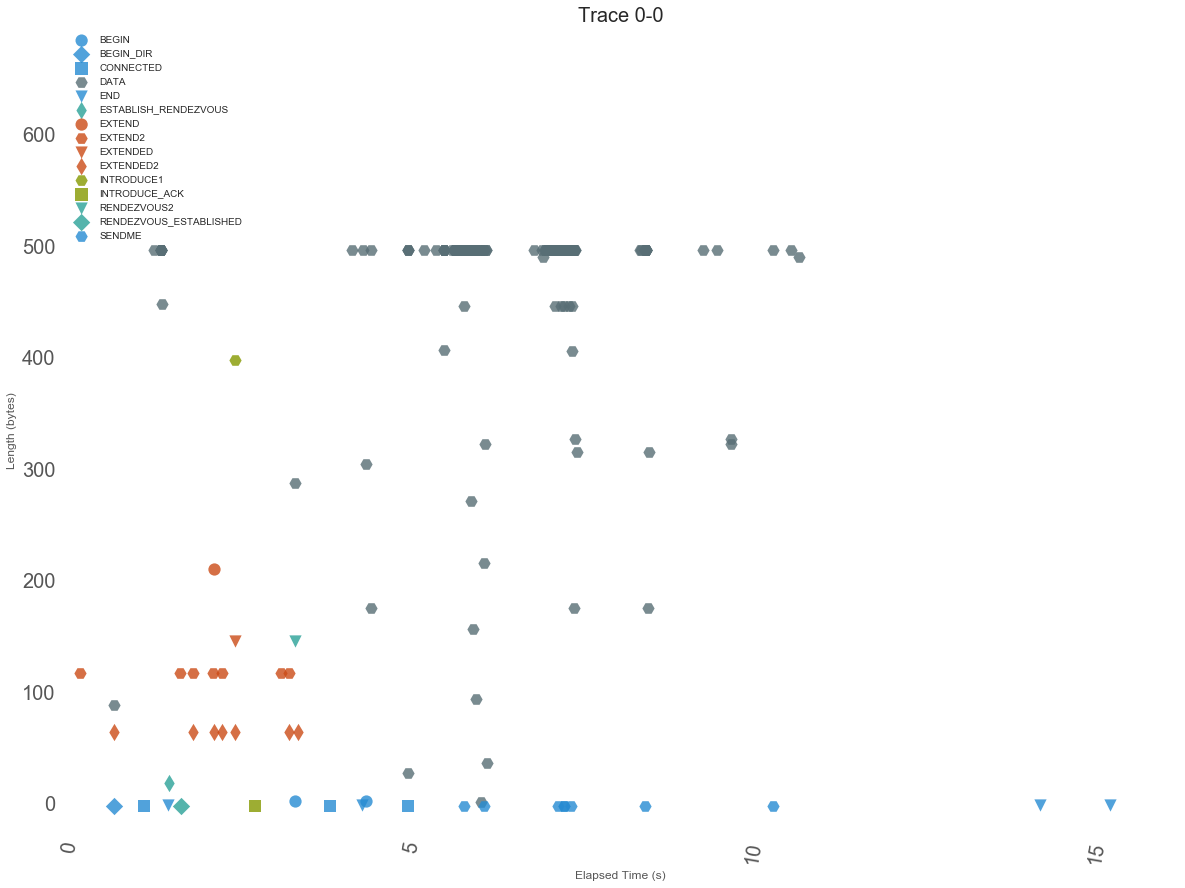

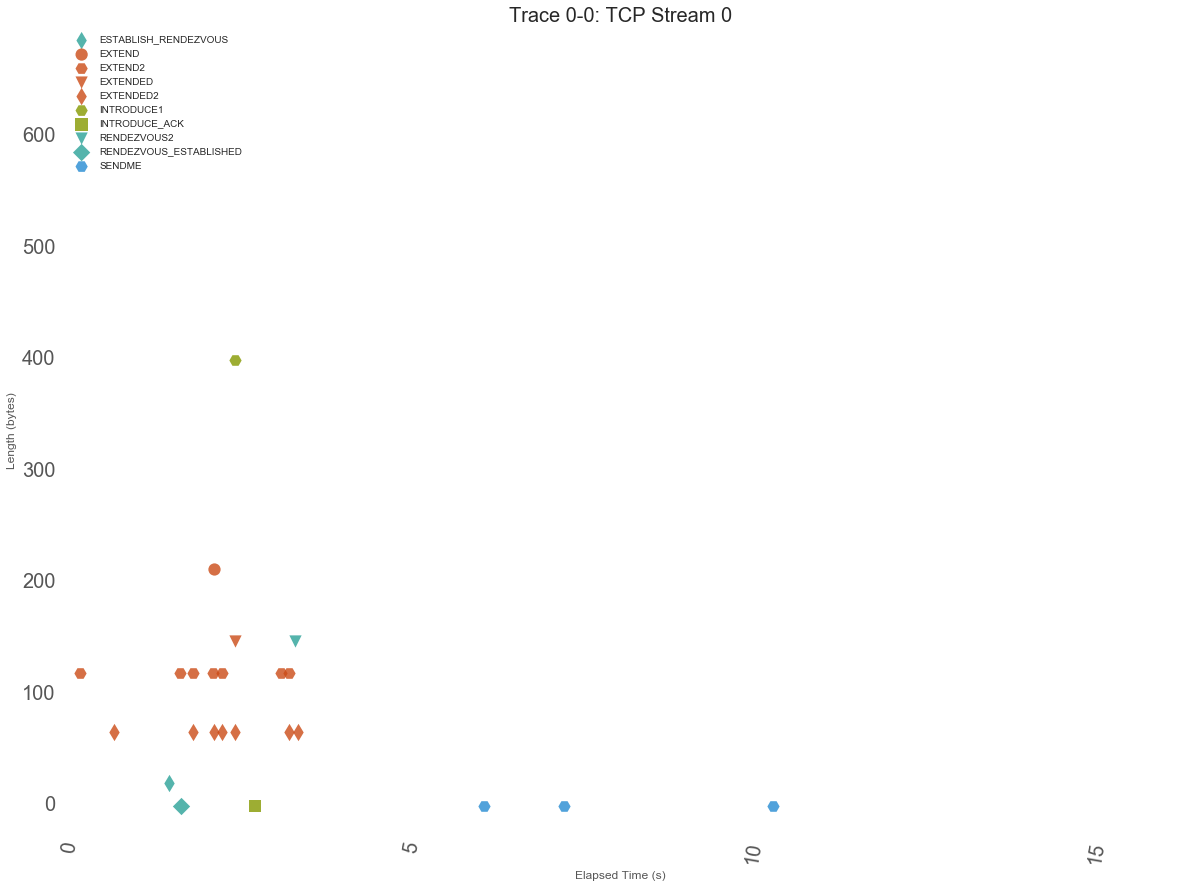

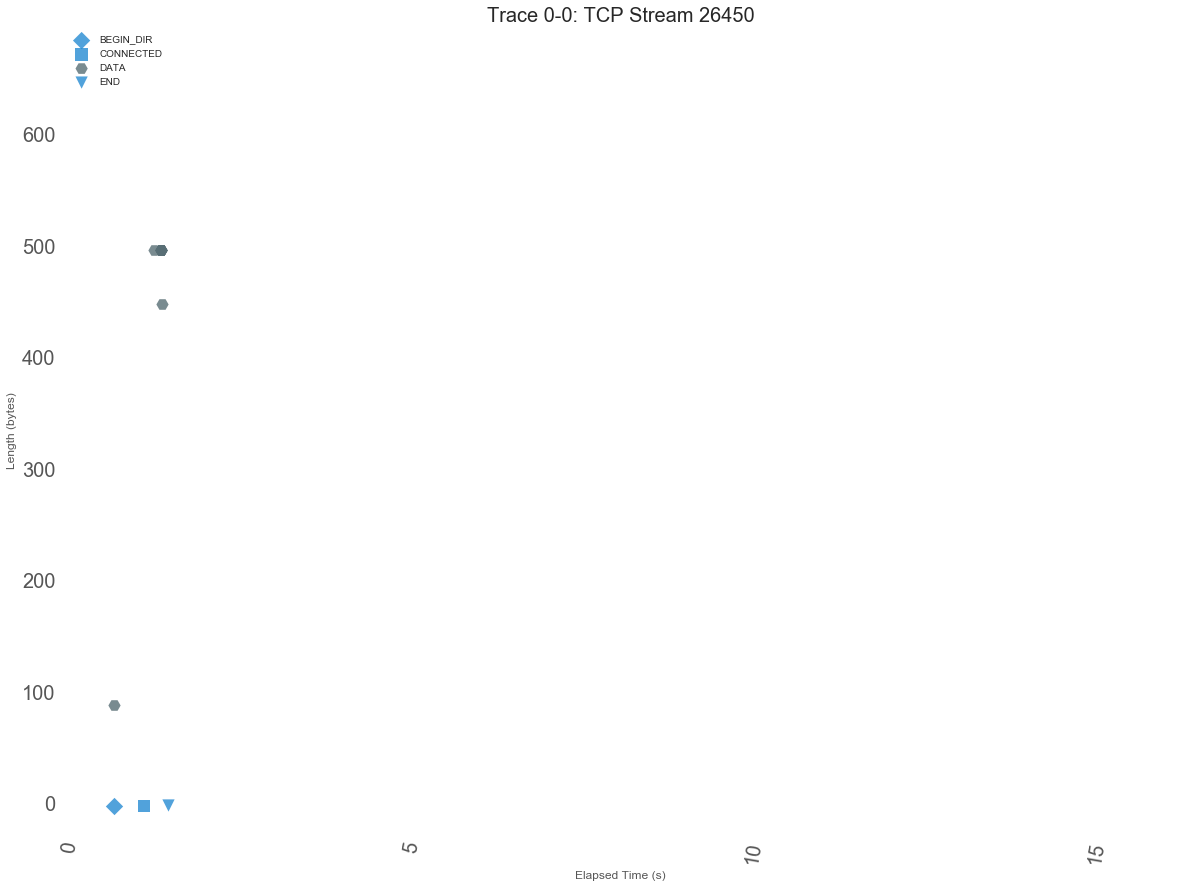

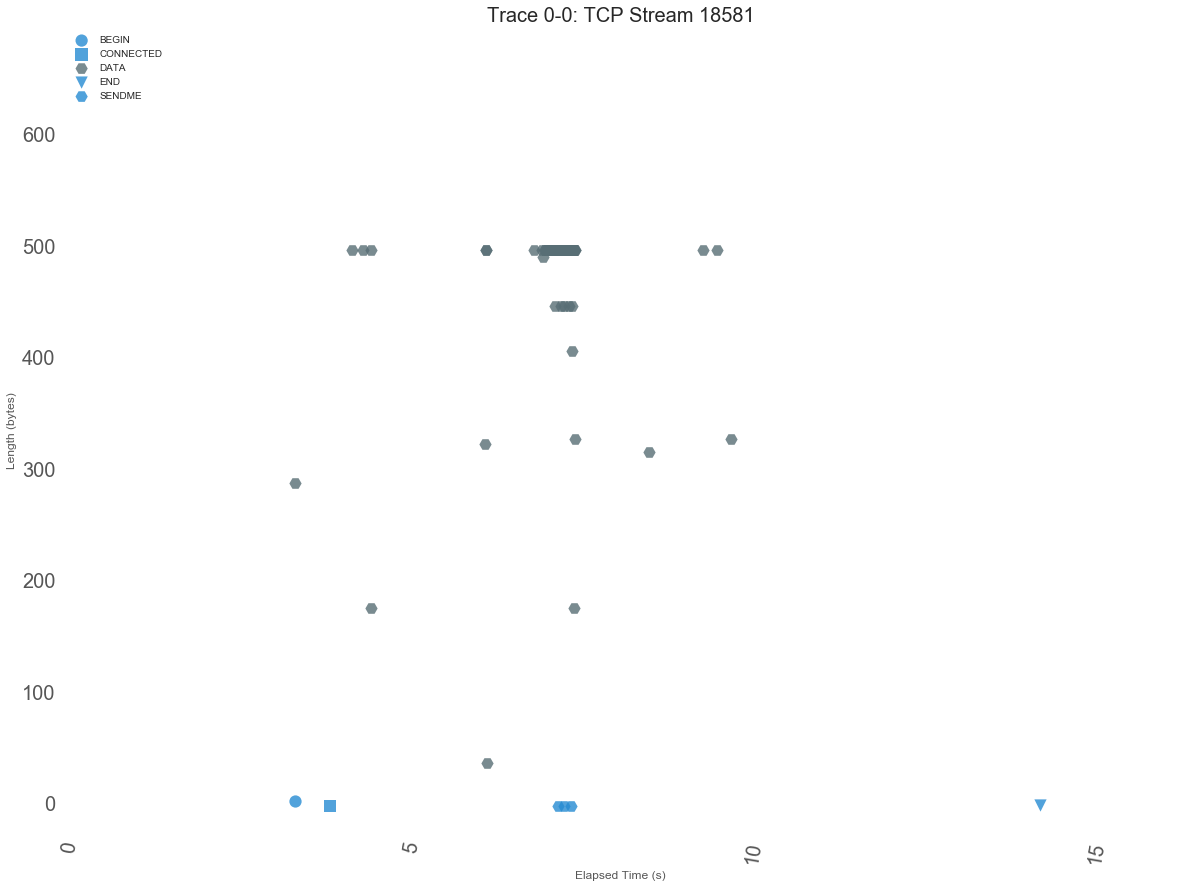

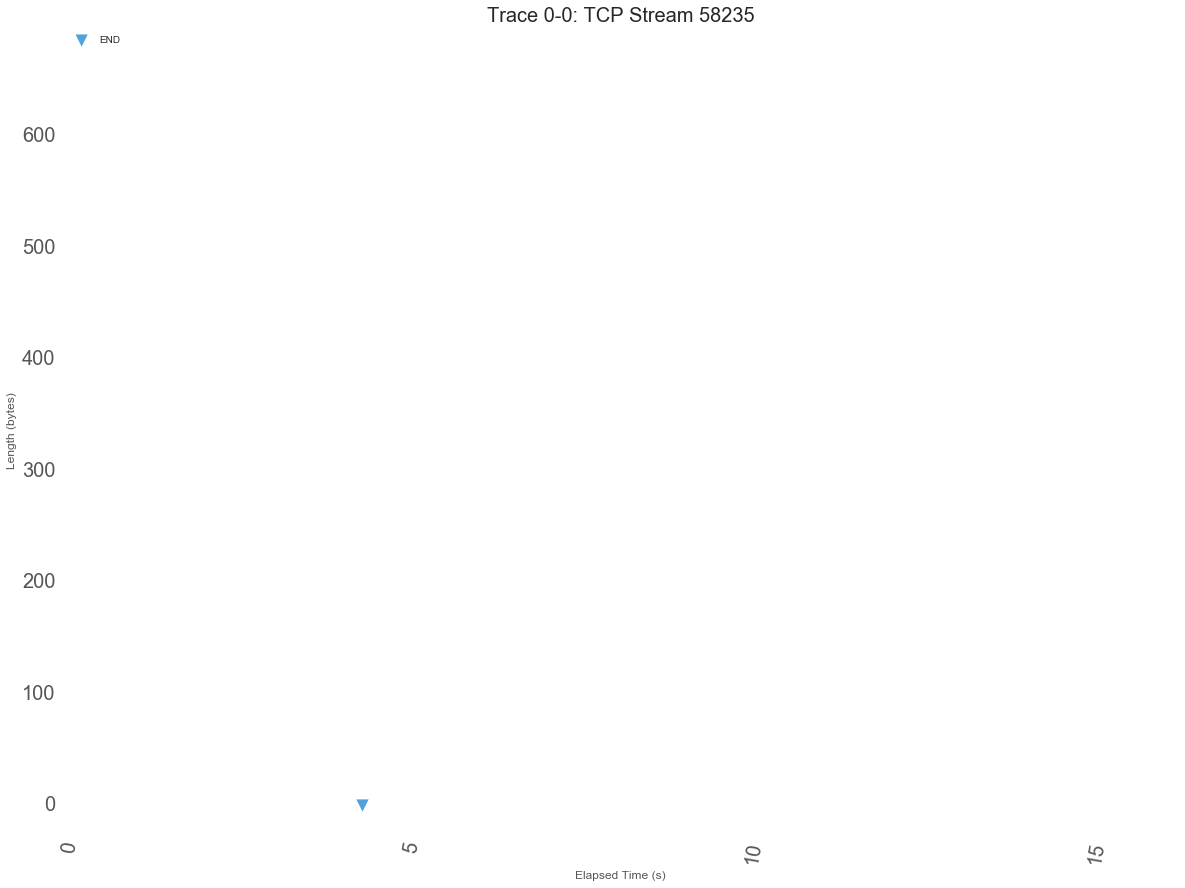

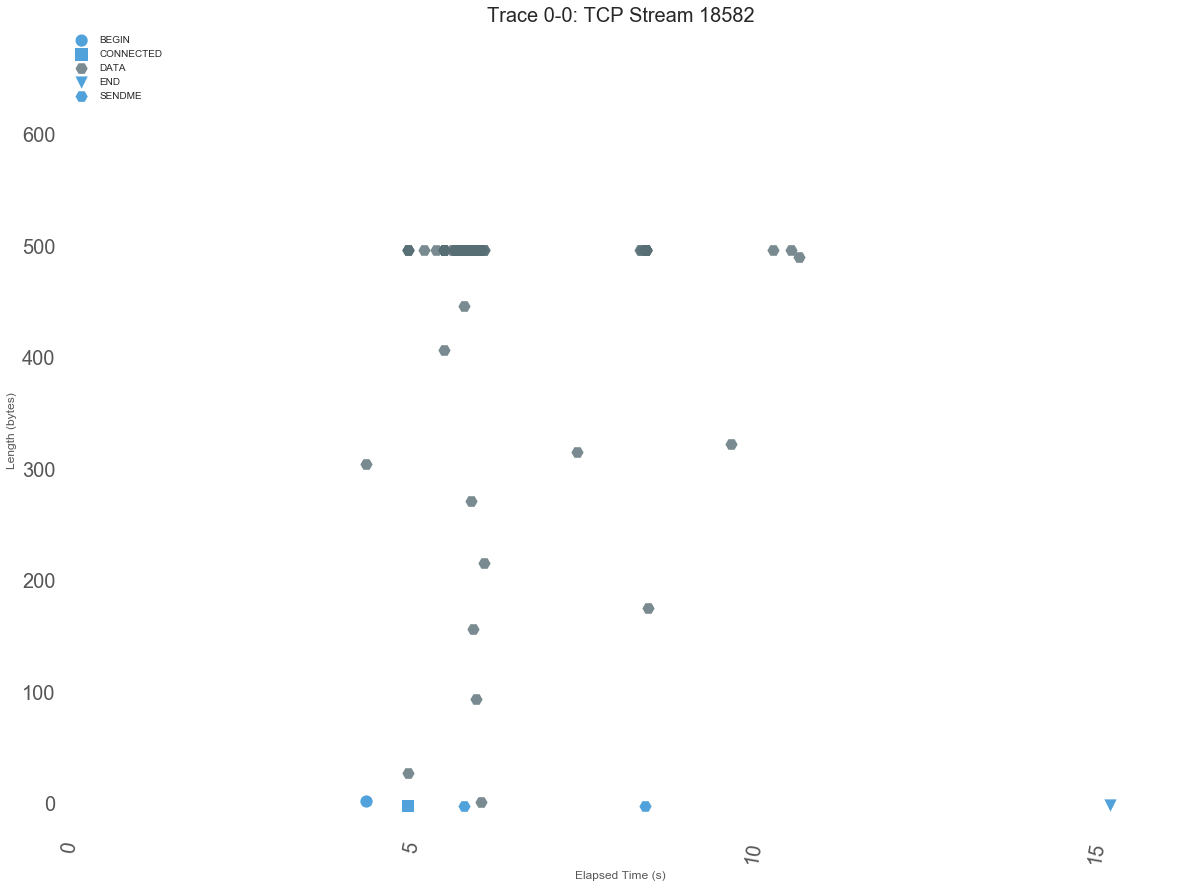

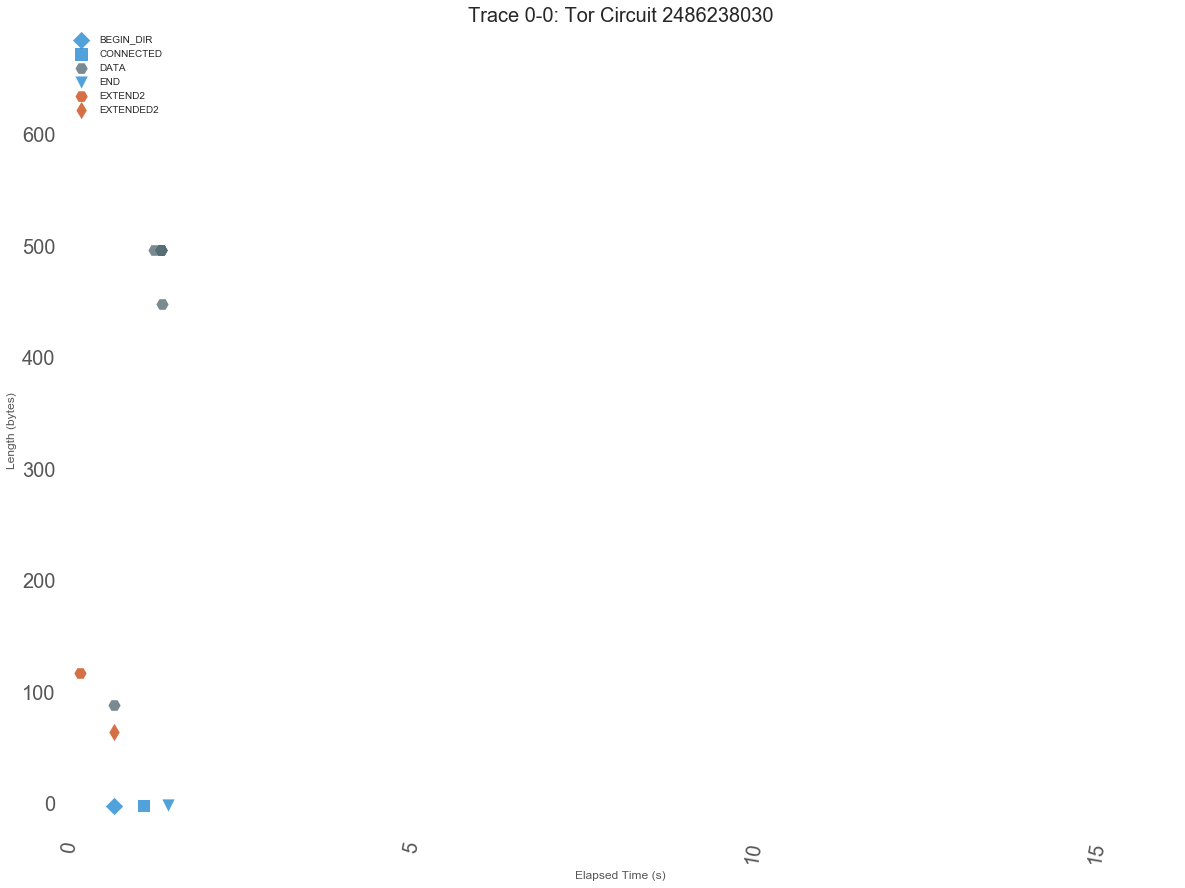

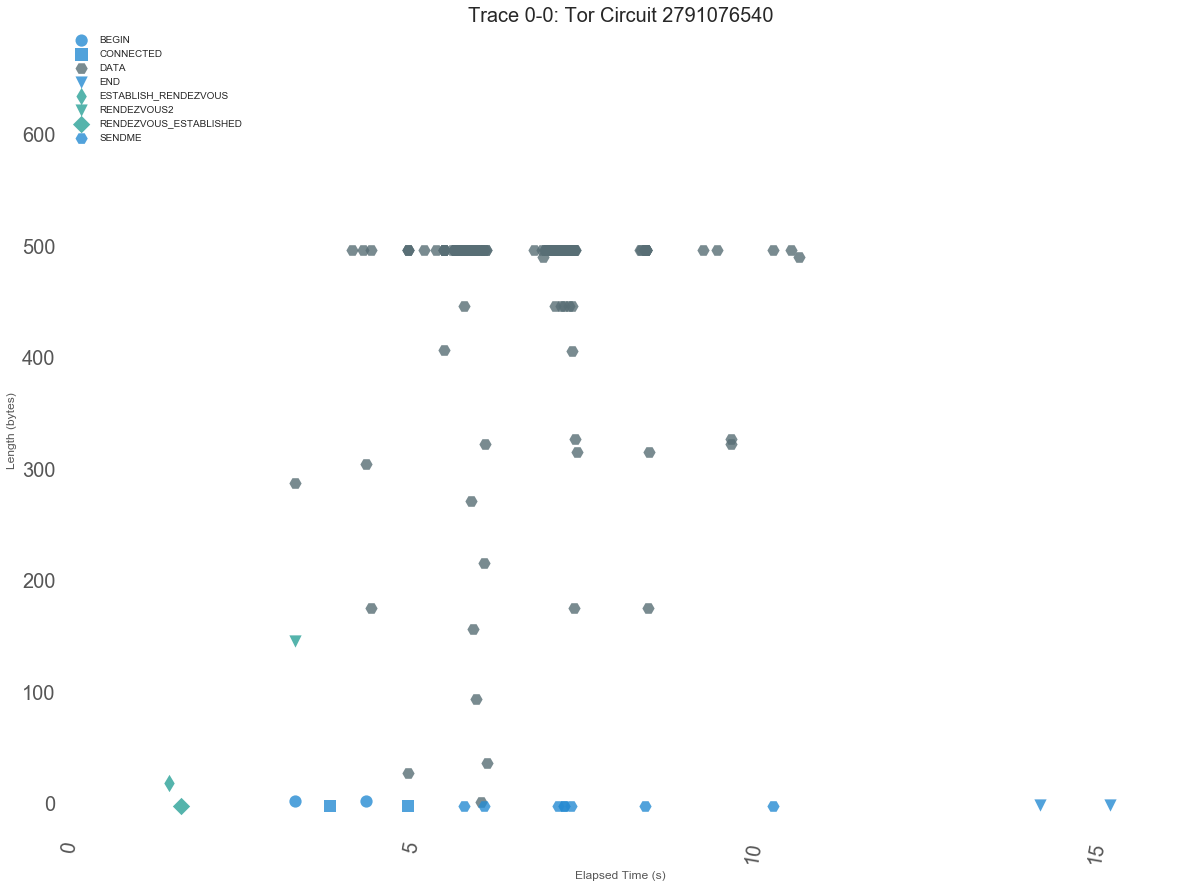

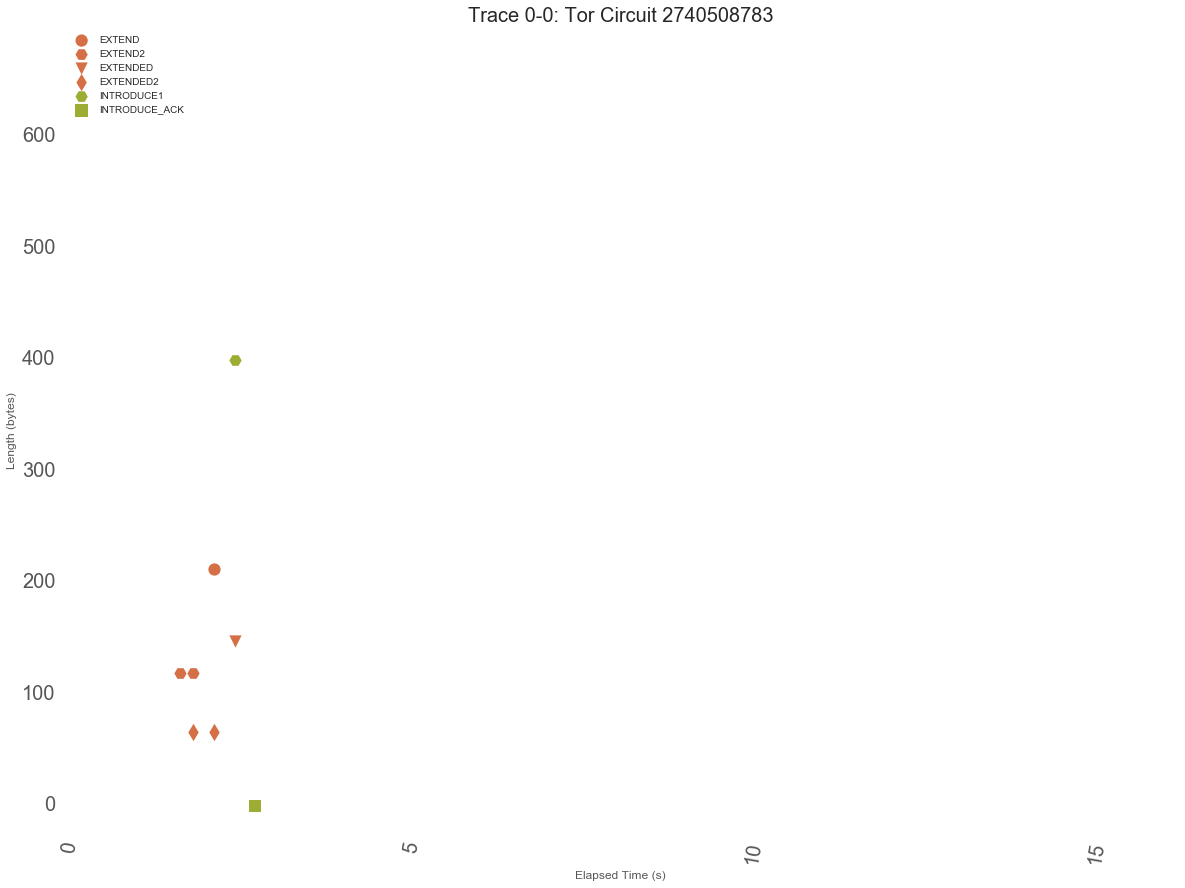

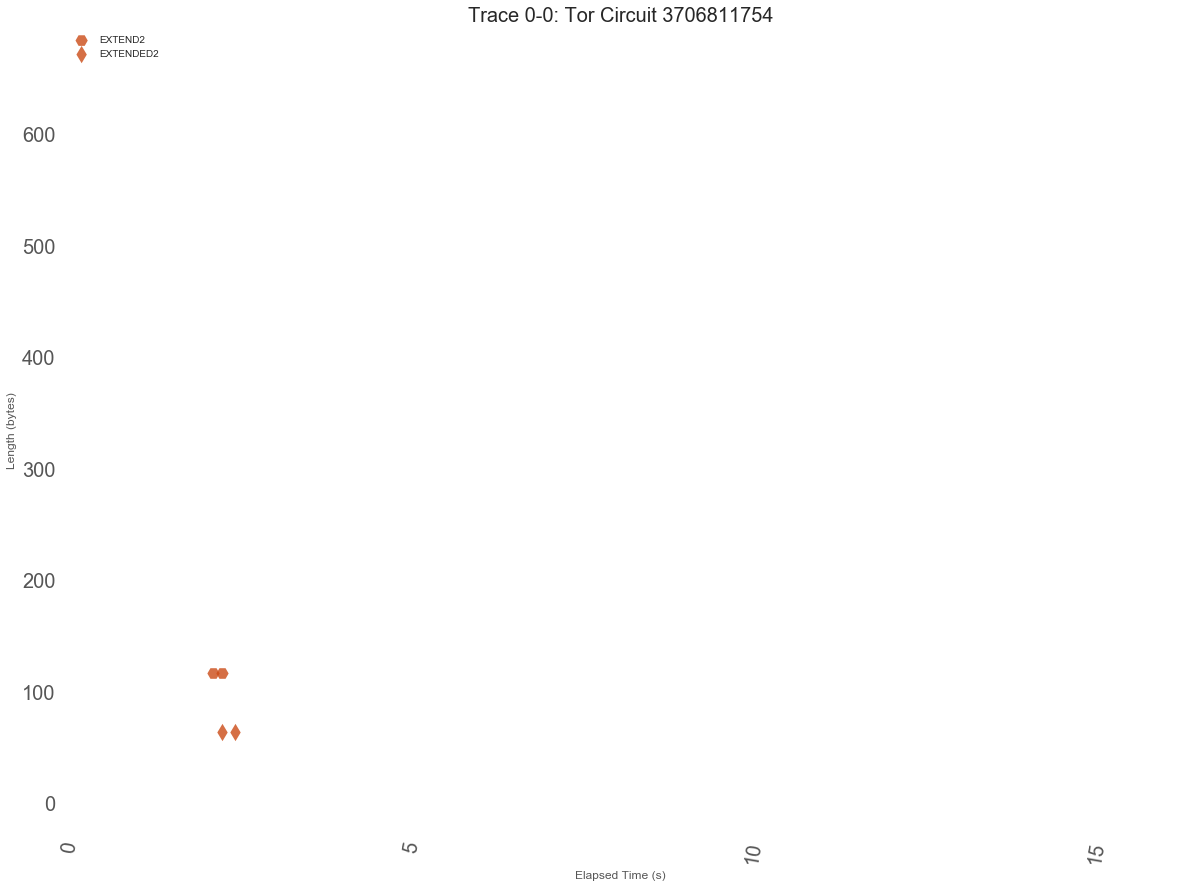

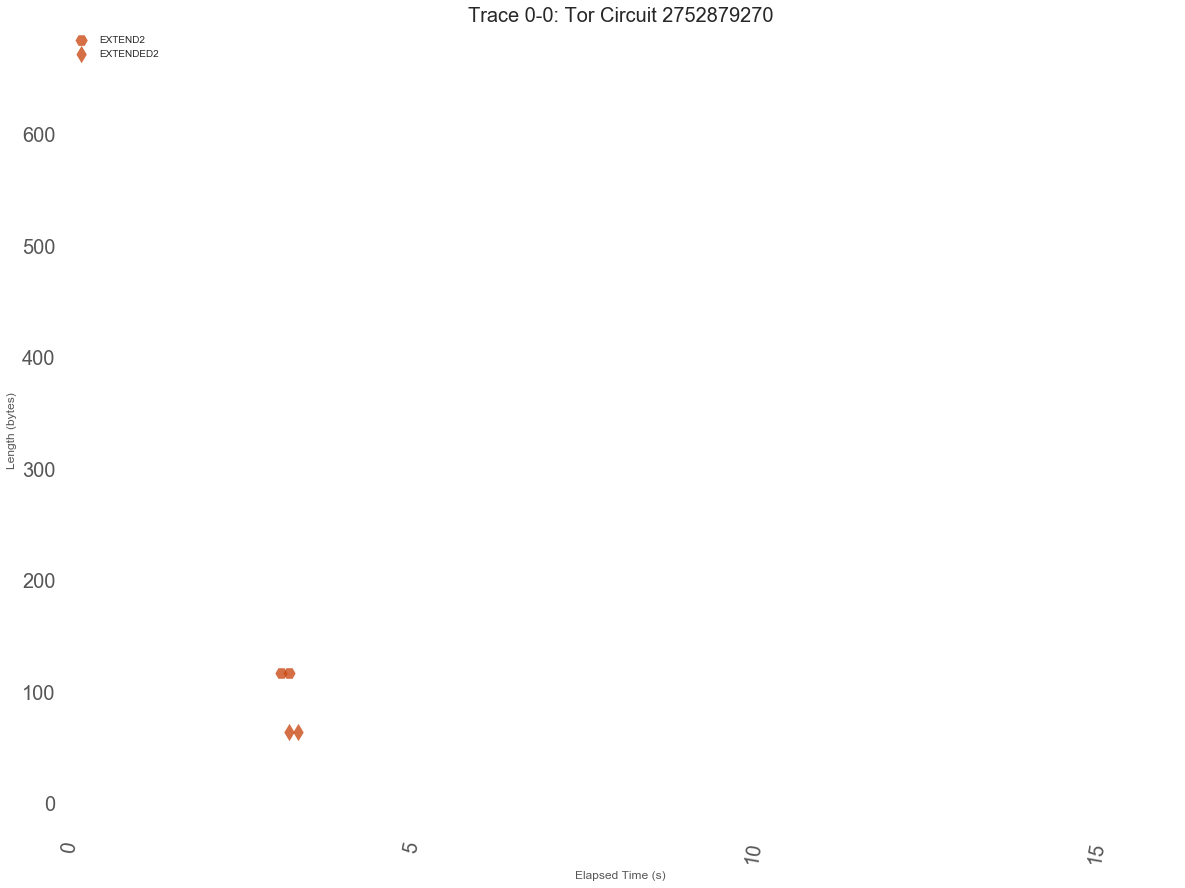

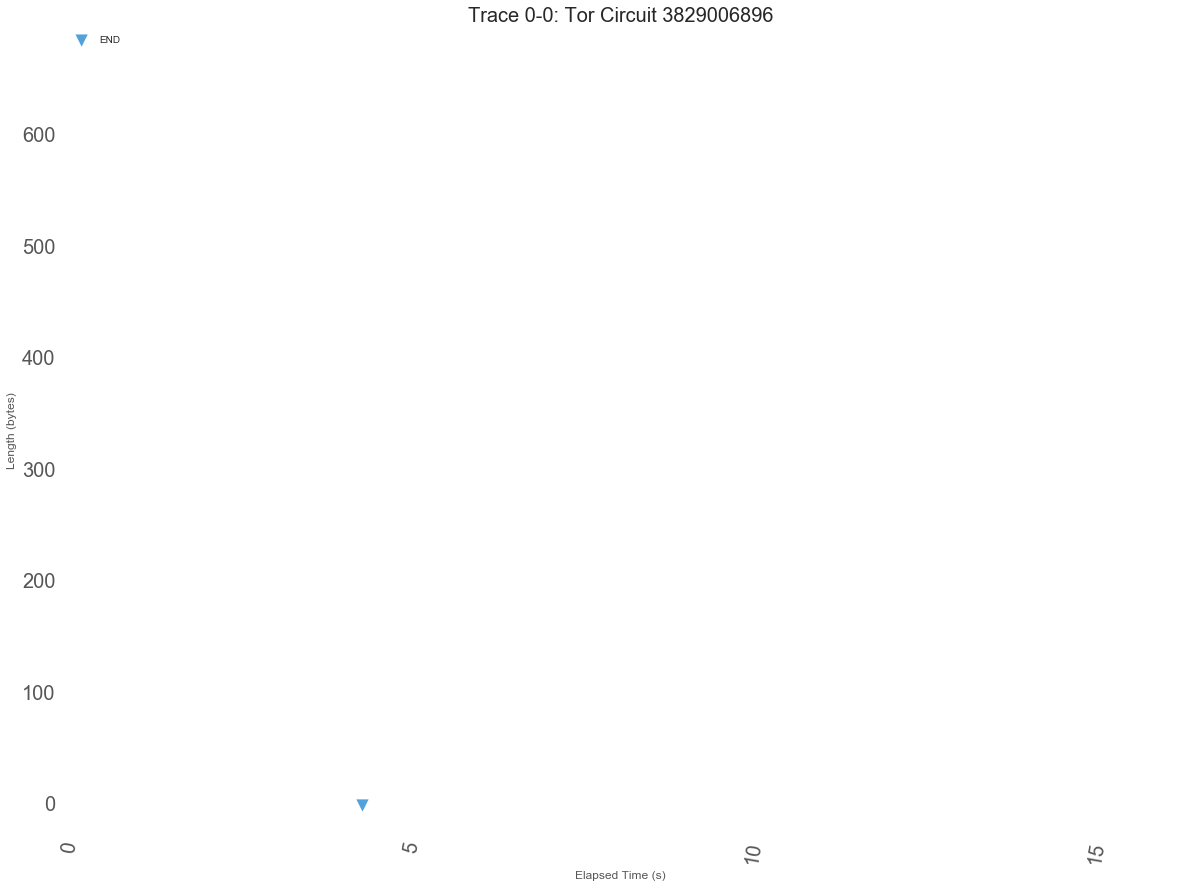

In [26]:
def explore_circuit_streams(df, title):
    create_timeline_plot(df, color_dict, shape_dict, titlestr='Trace {}'.format(title))
    for stream in df['Stream'].unique():
        create_timeline_plot(df[df['Stream'] == stream], color_dict, shape_dict, maximums=df,
                             titlestr="Trace {}: TCP Stream {}".format(title, stream))
    for circuit in df['Circuit'].unique():
        create_timeline_plot(df[df['Circuit'] == circuit], color_dict, shape_dict, maximums=df,
                             titlestr="Trace {}: Tor Circuit {}".format(title, circuit))

explore_circuit_streams(df_00raw, '0-0')

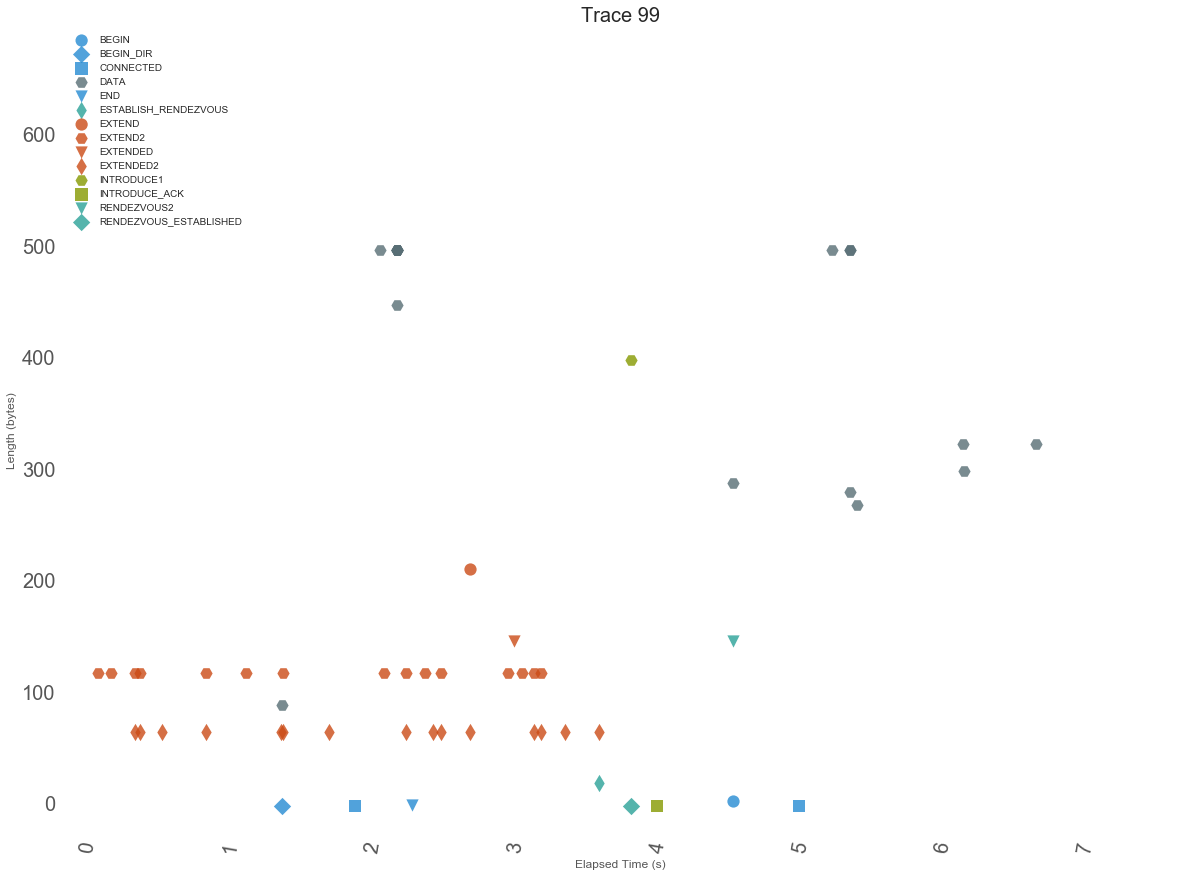

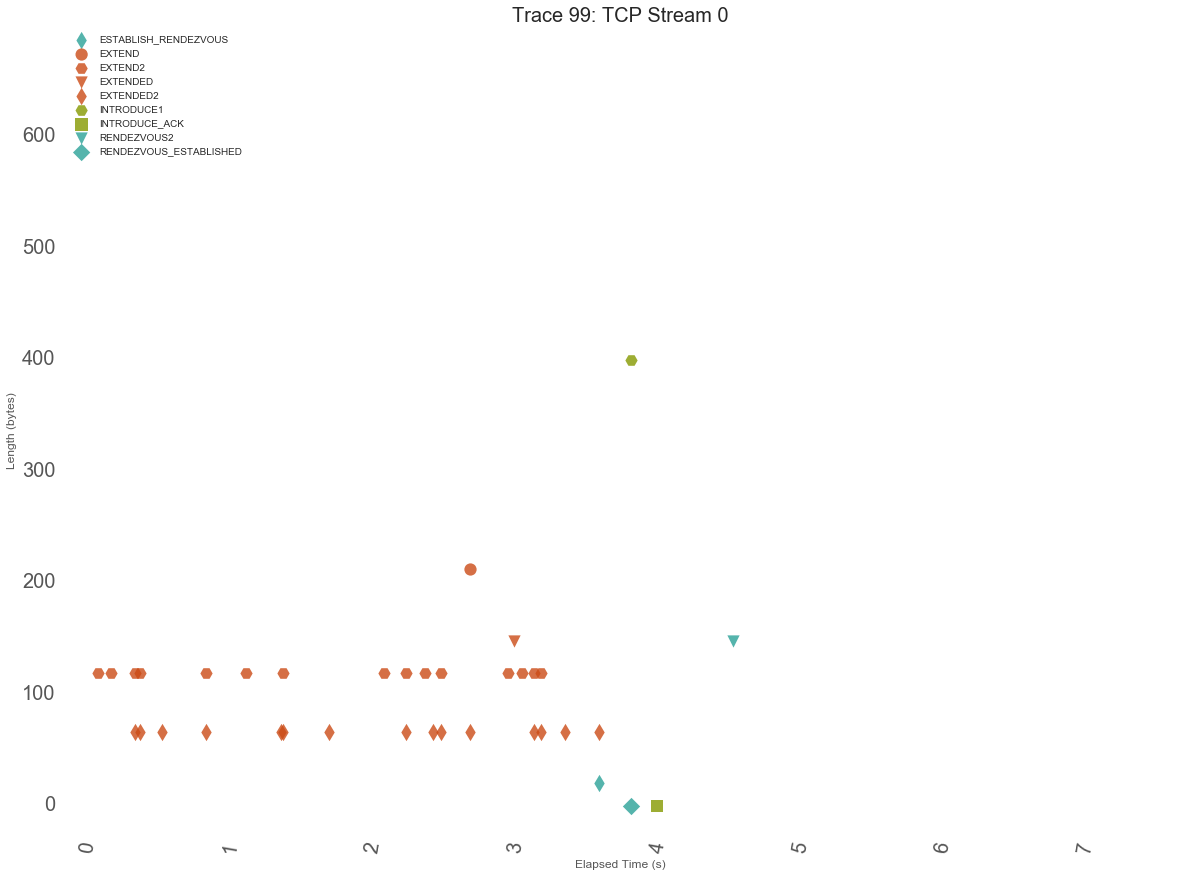

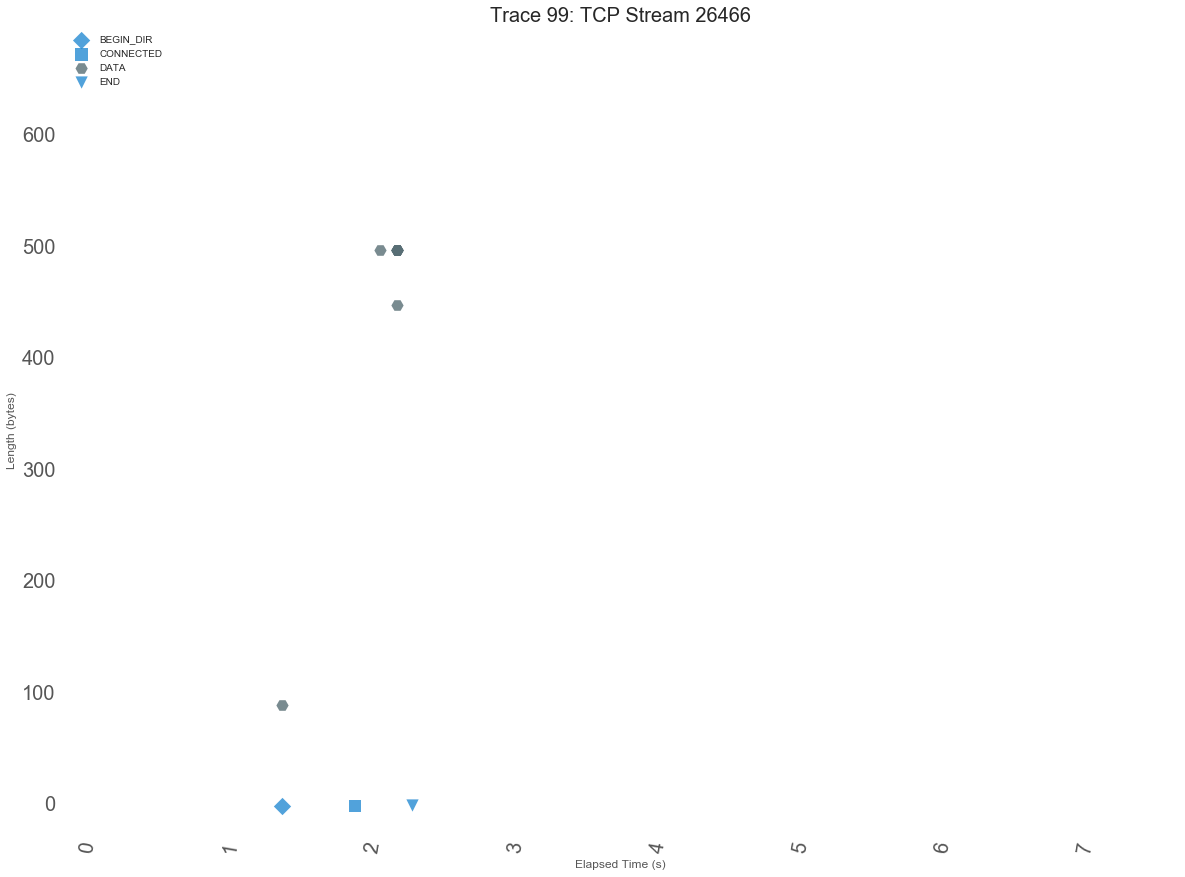

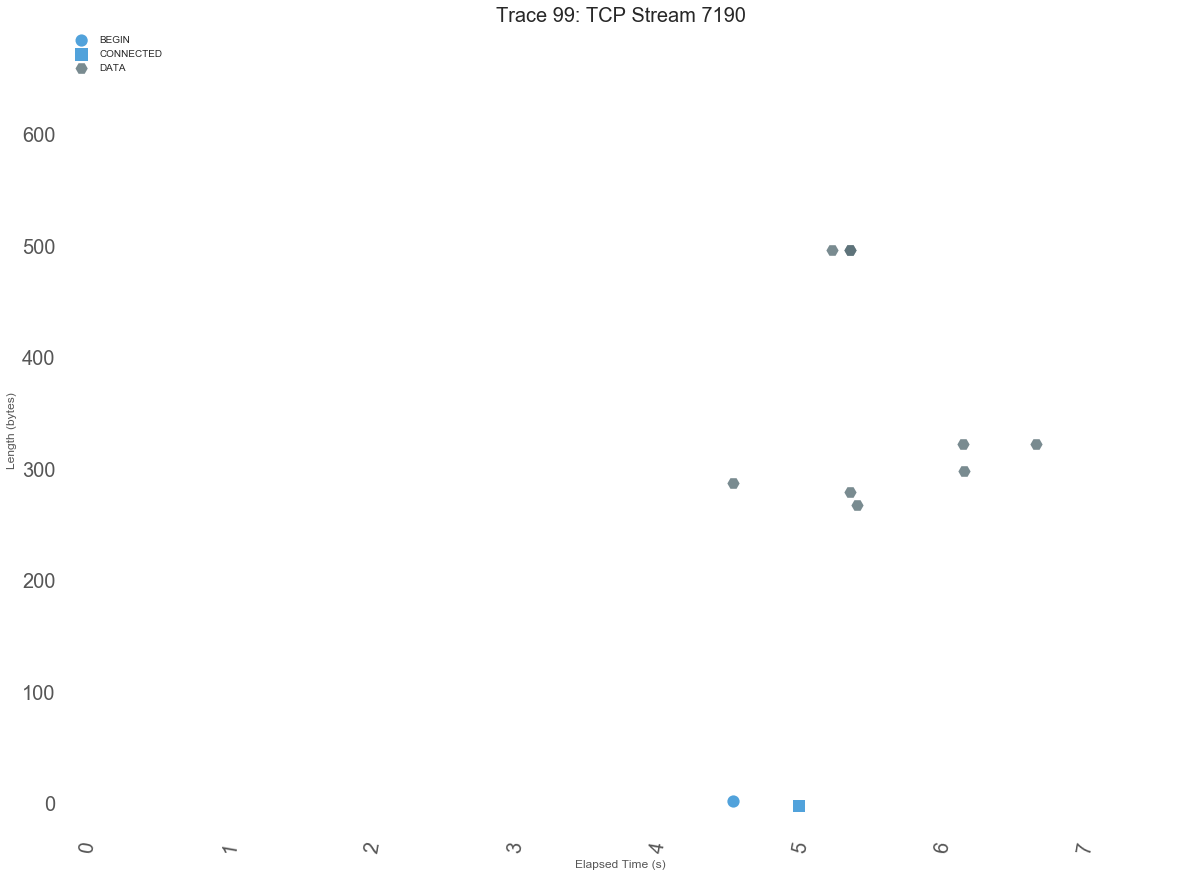

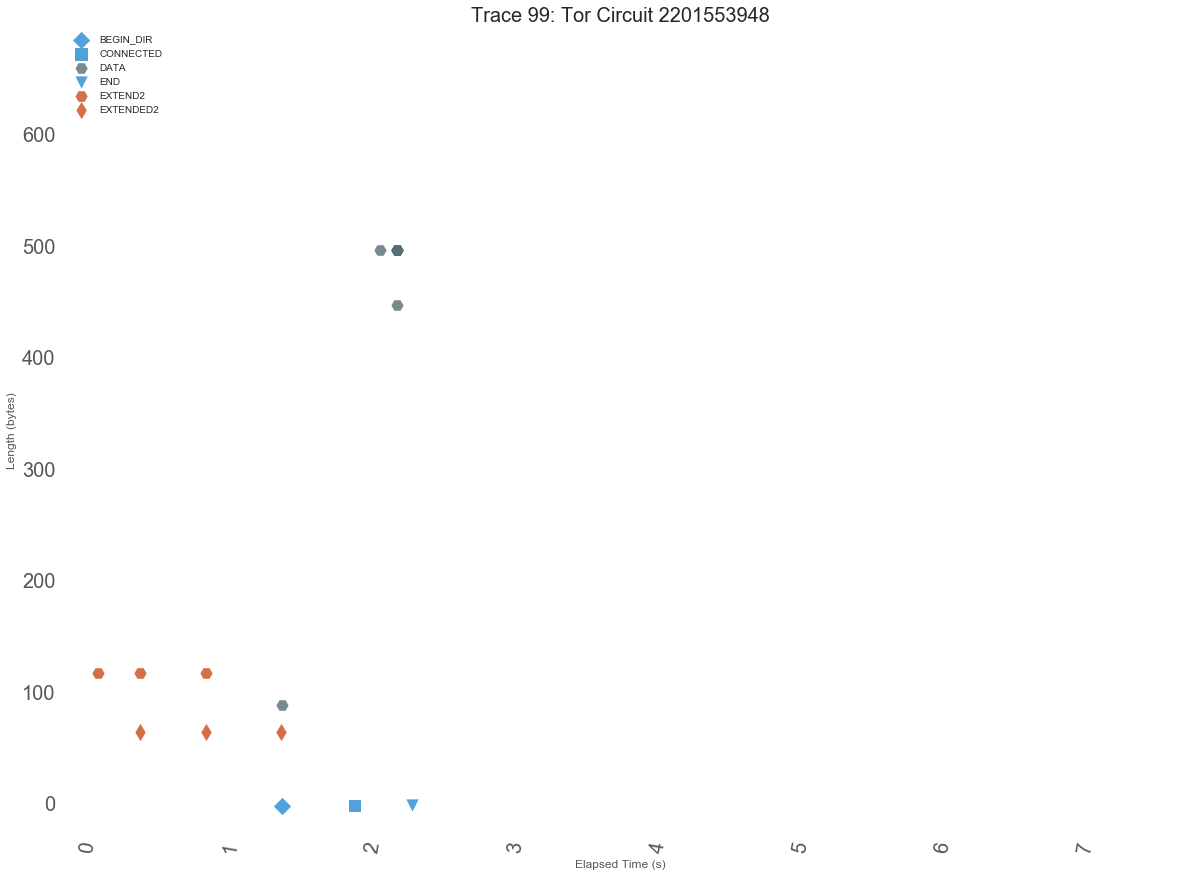

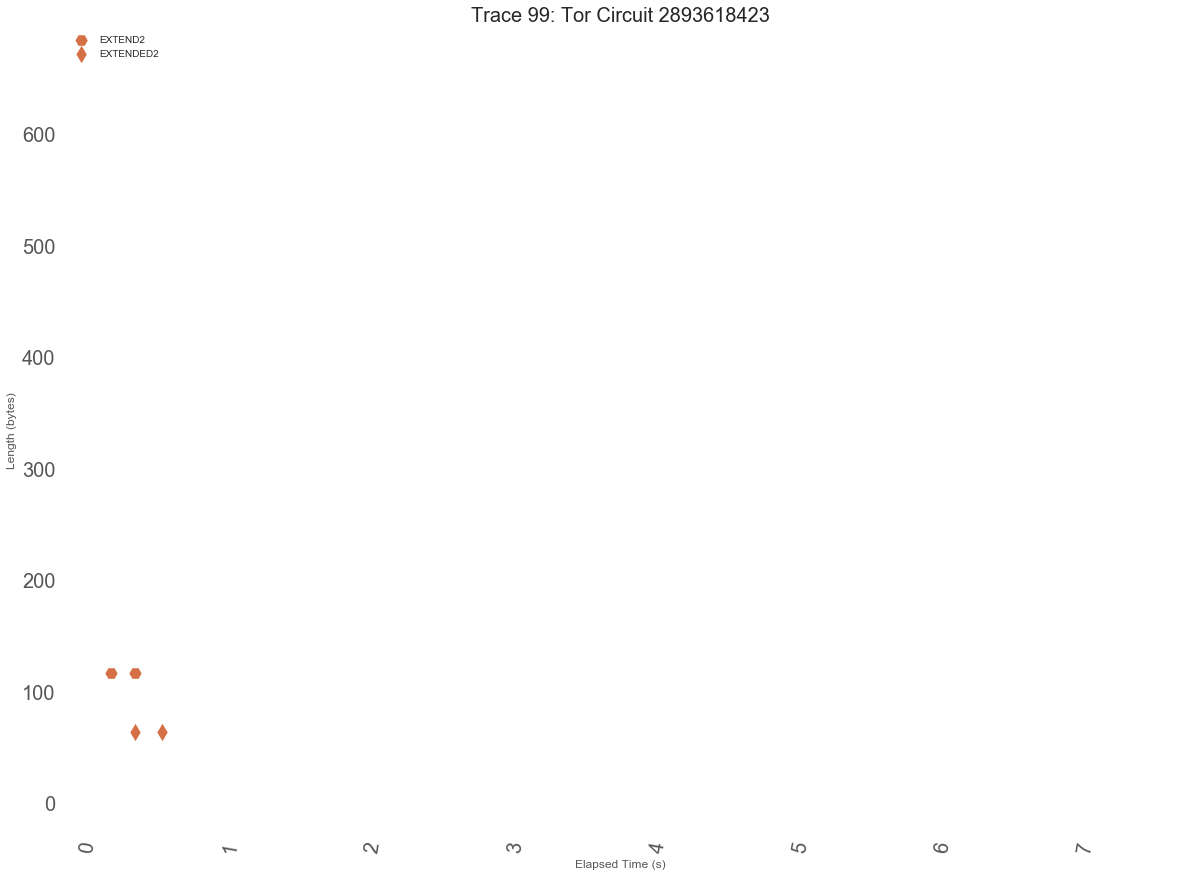

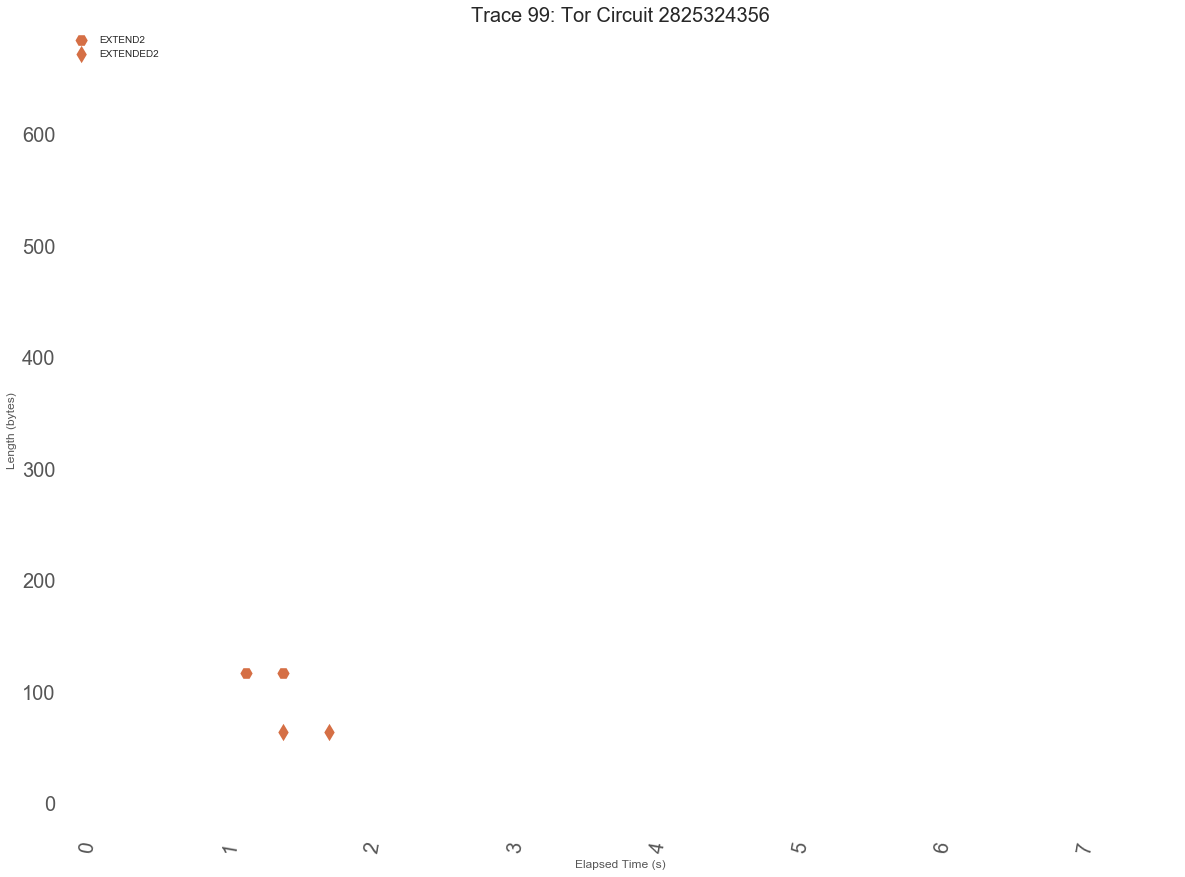

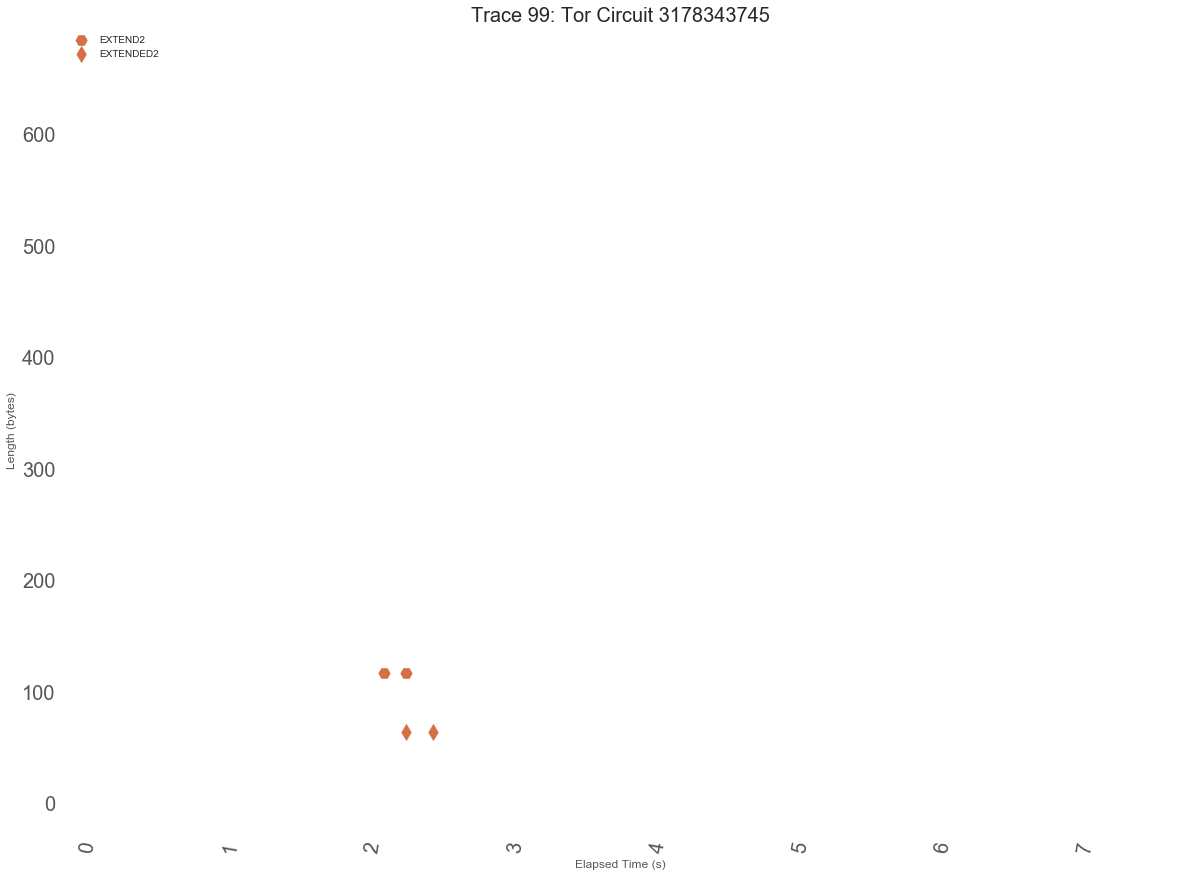

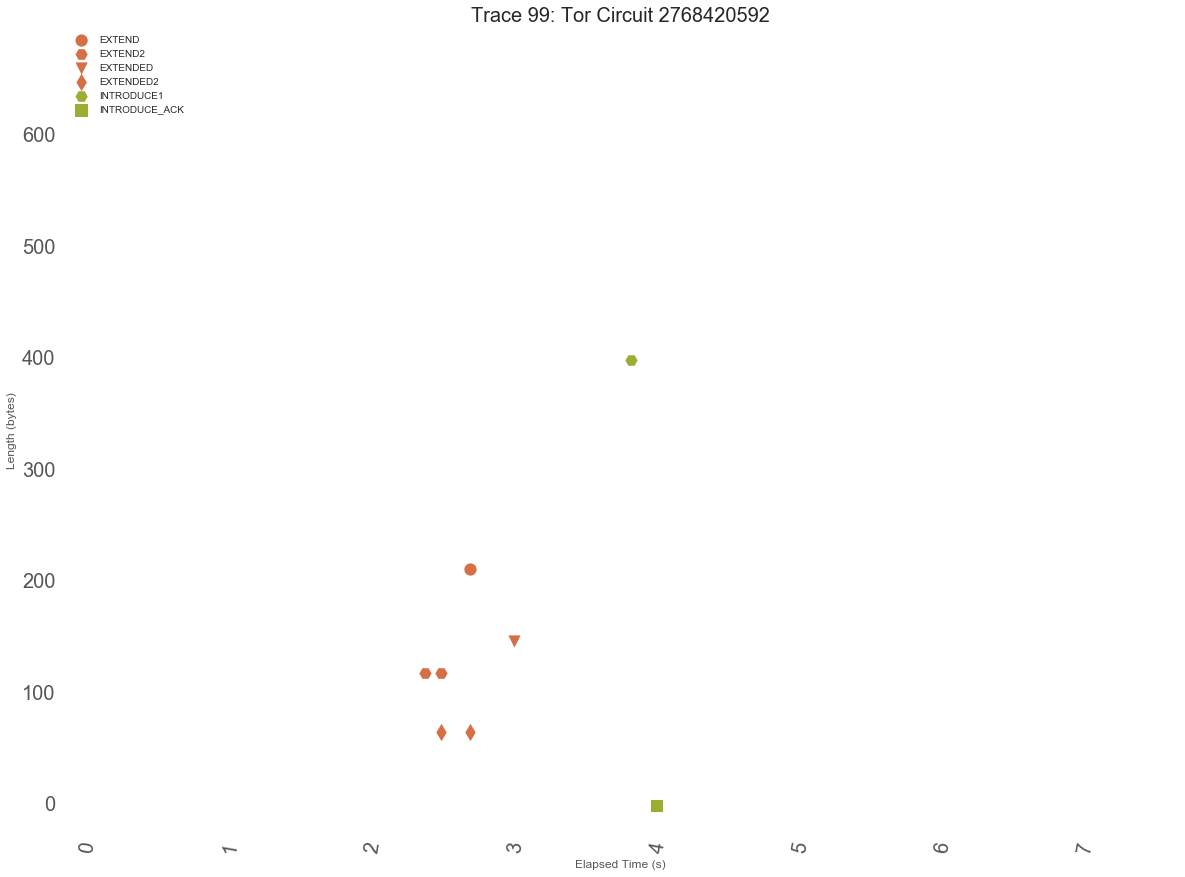

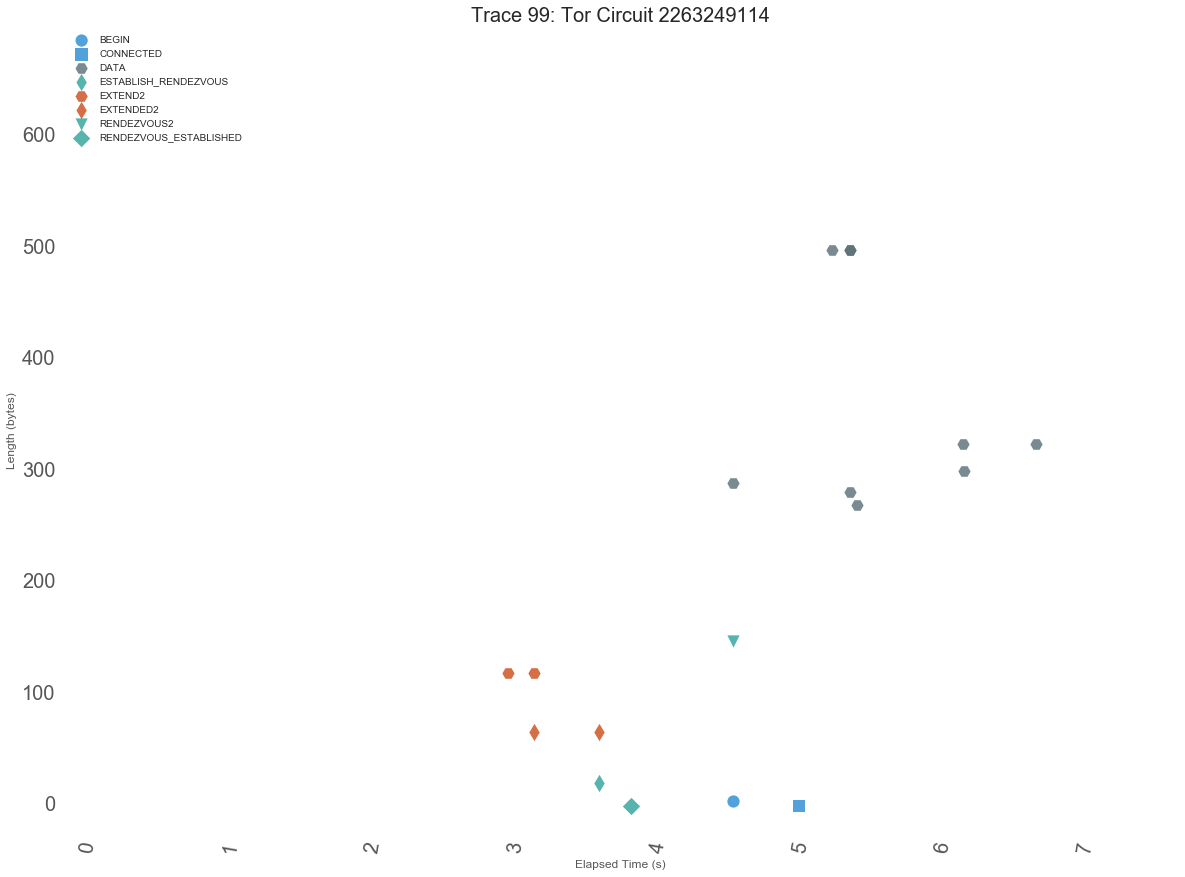

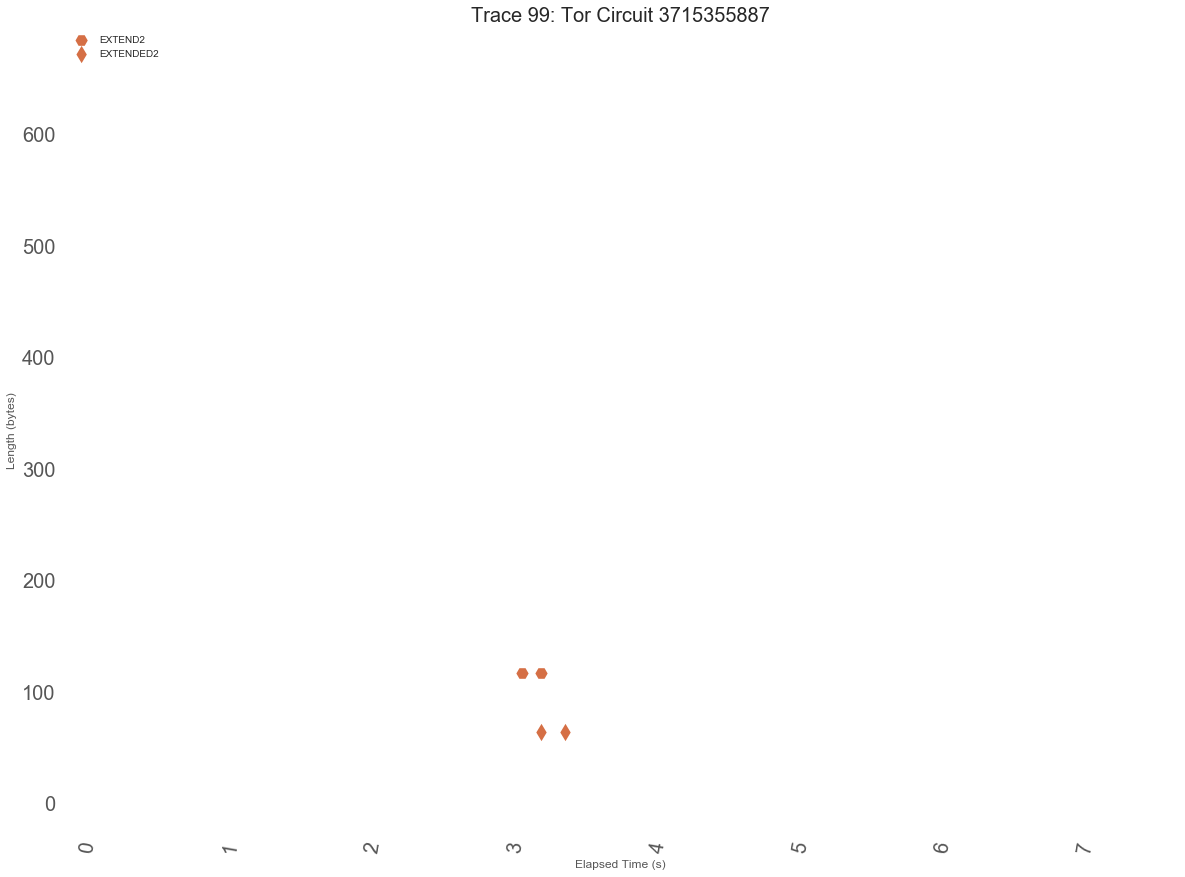

In [27]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '99-raw')), '99')

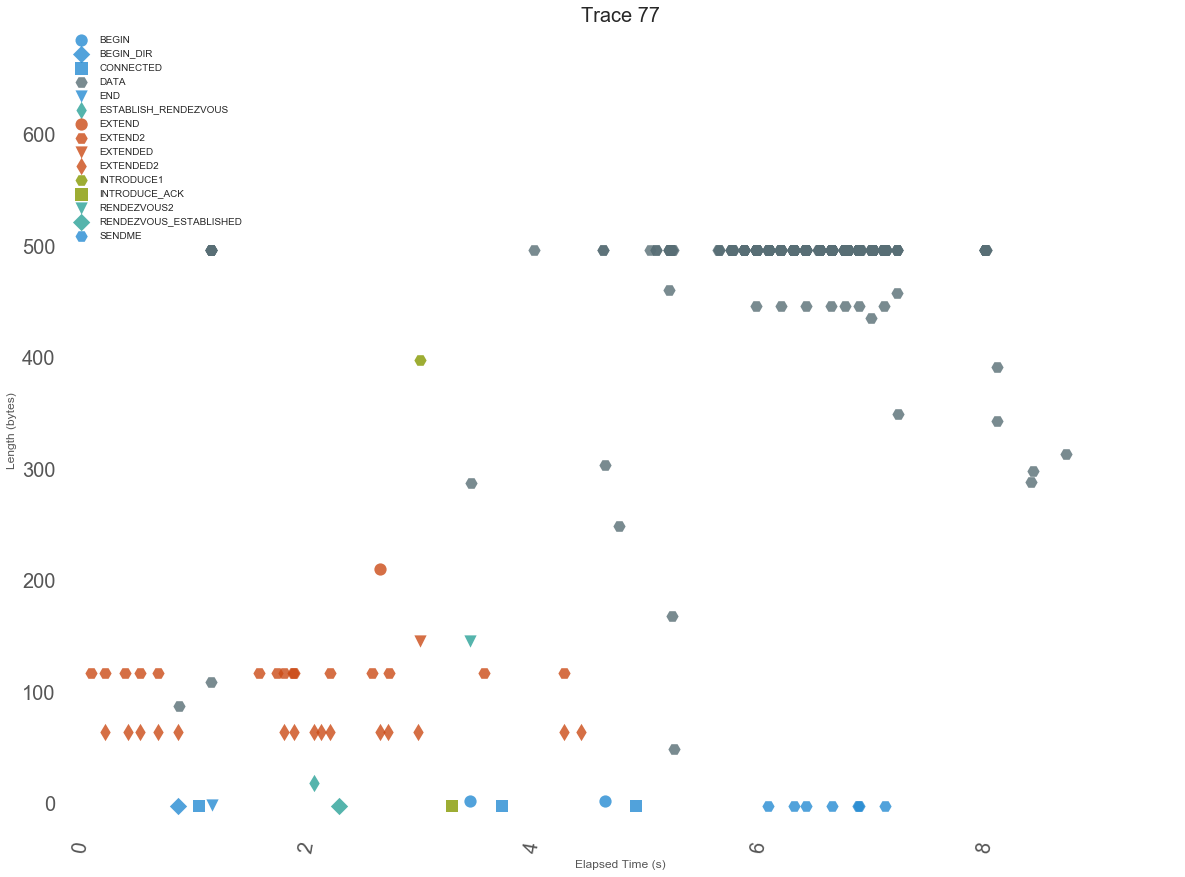

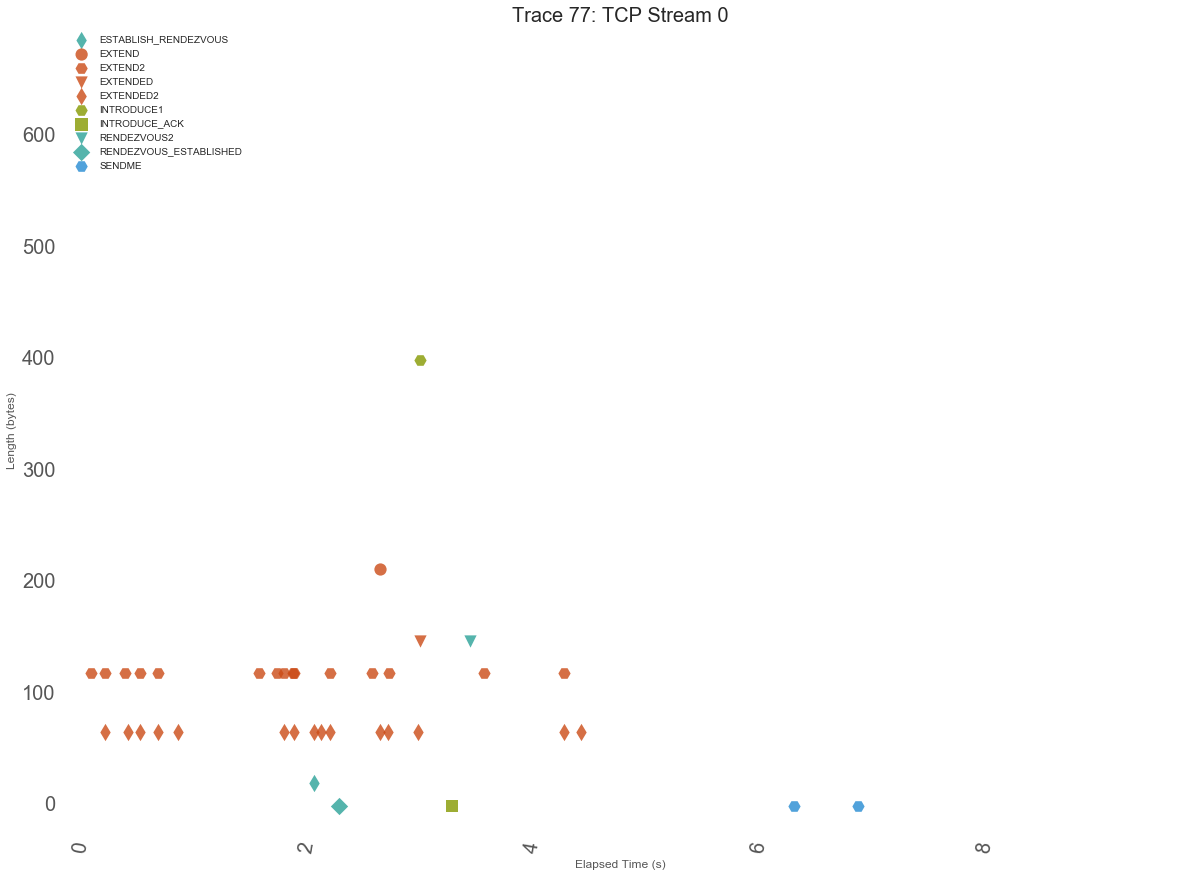

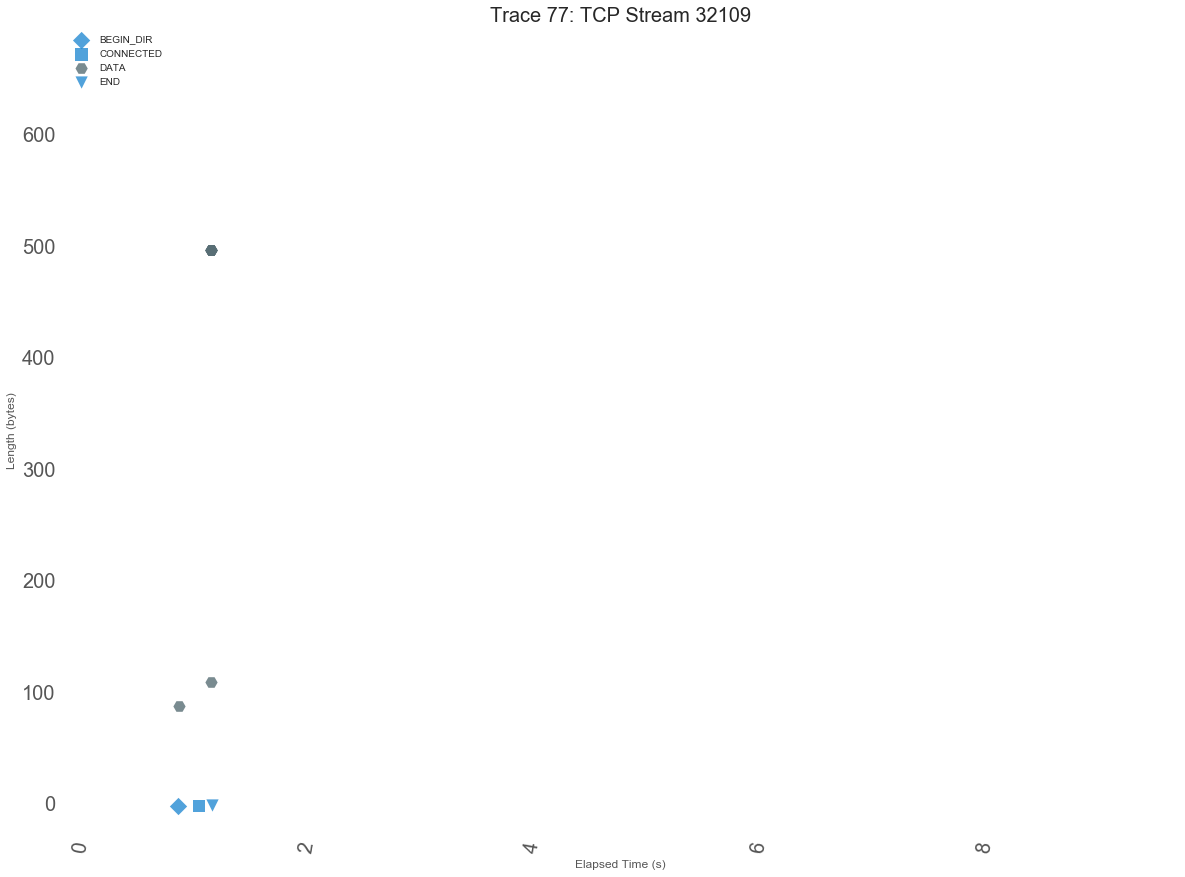

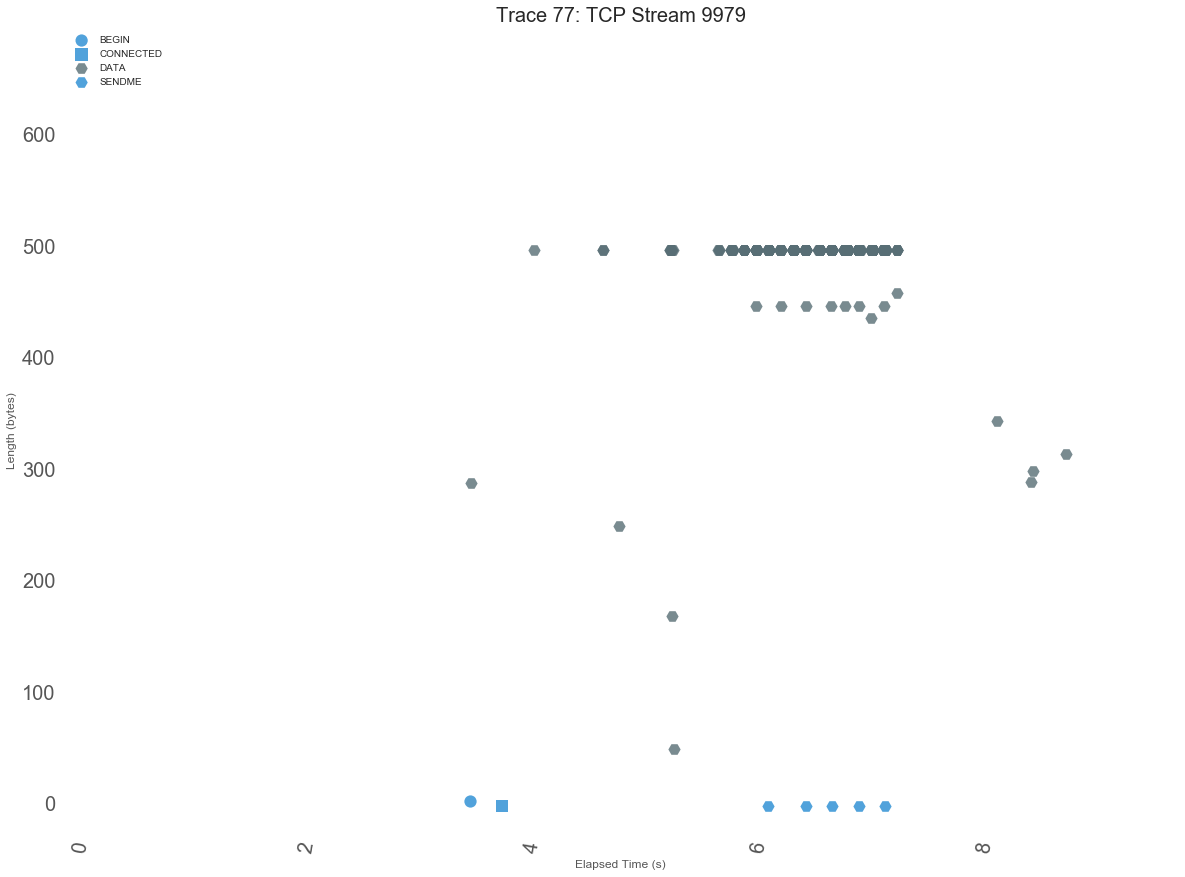

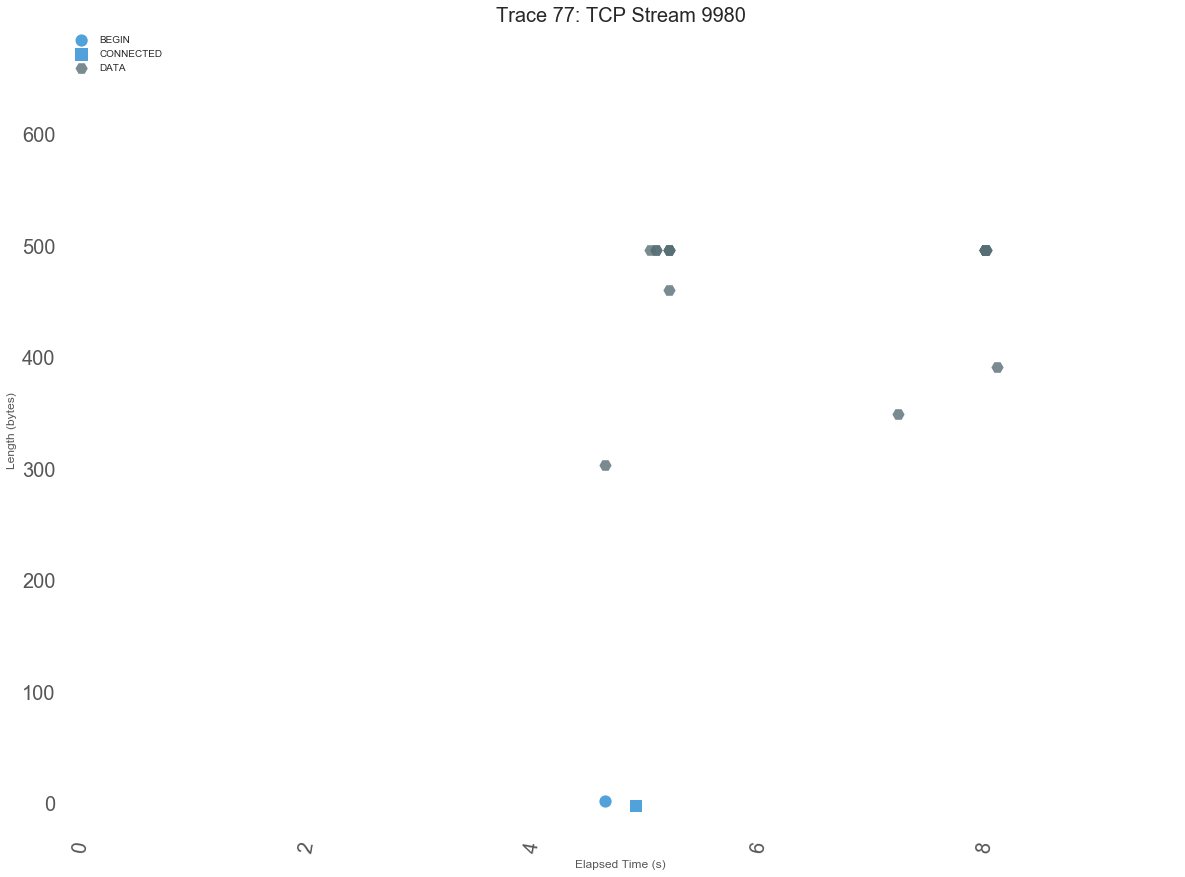

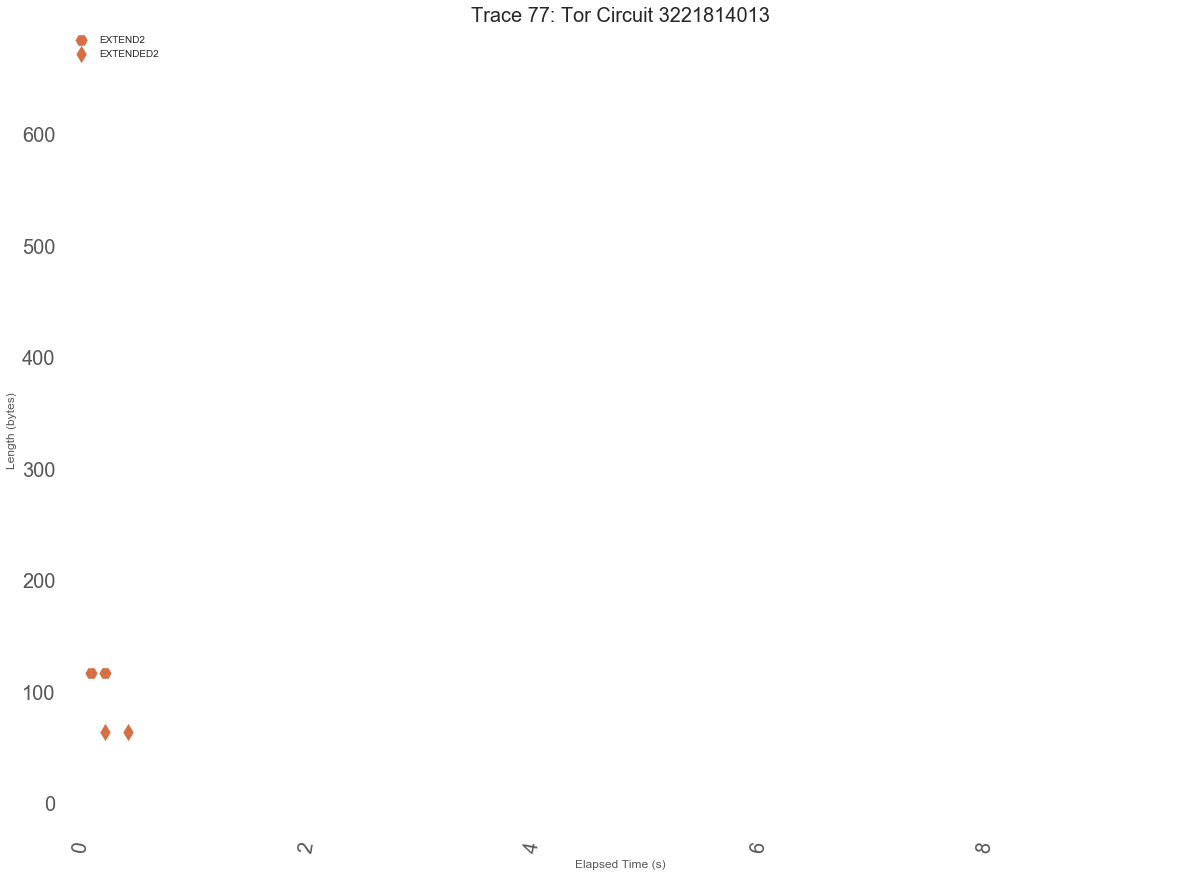

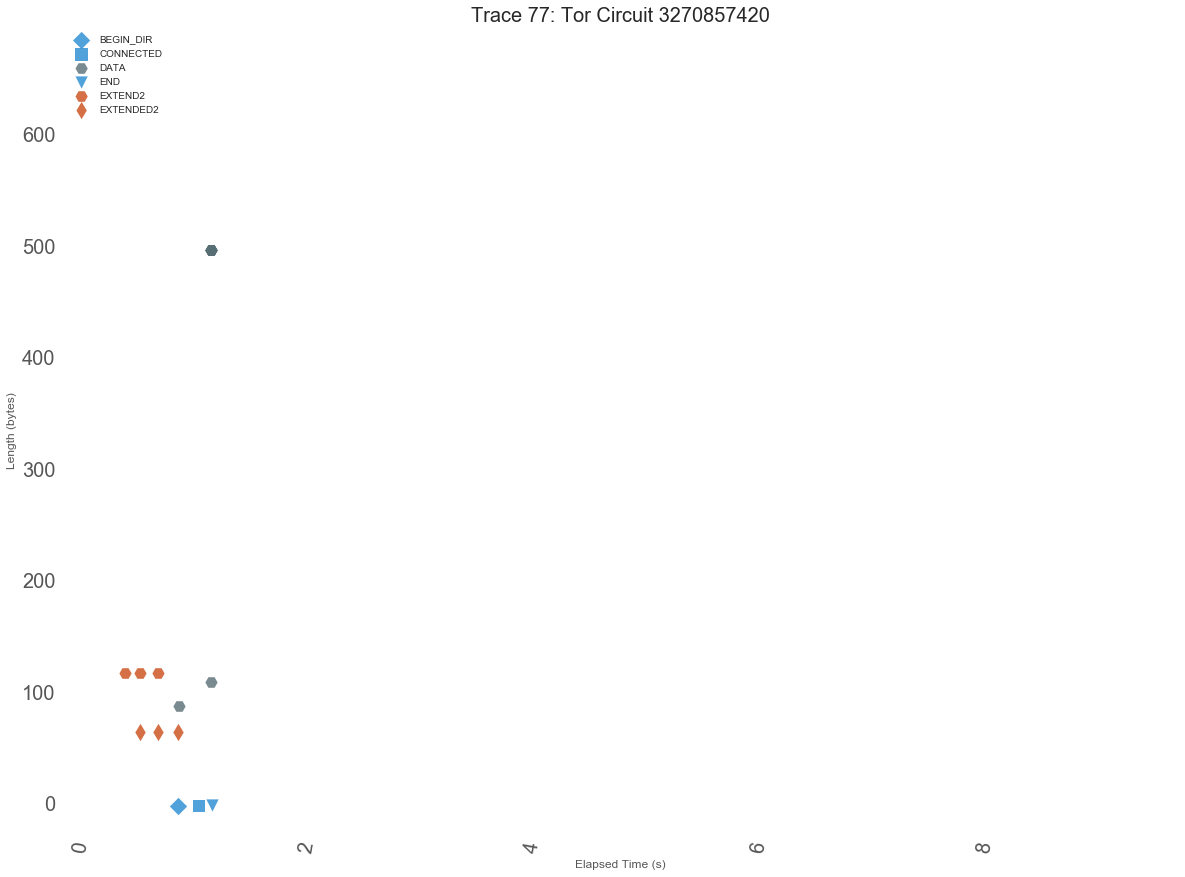

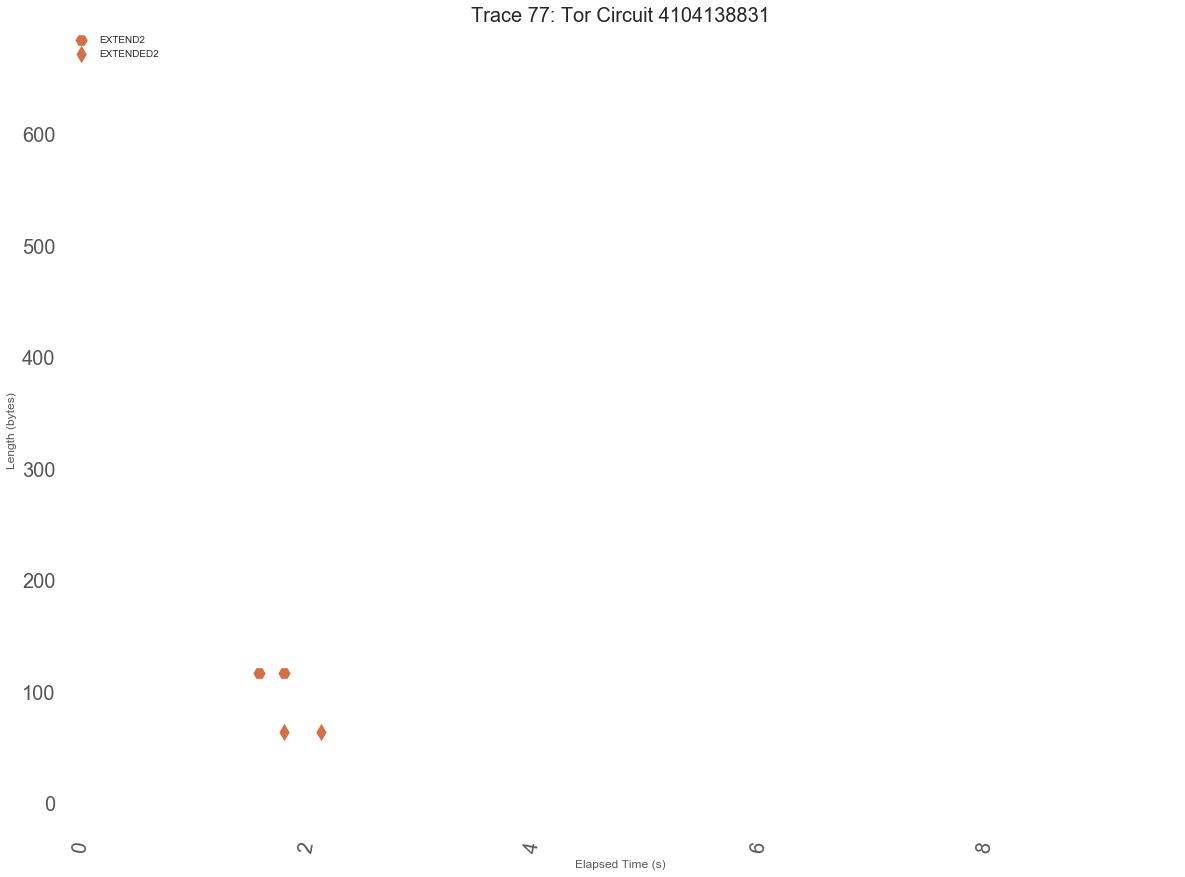

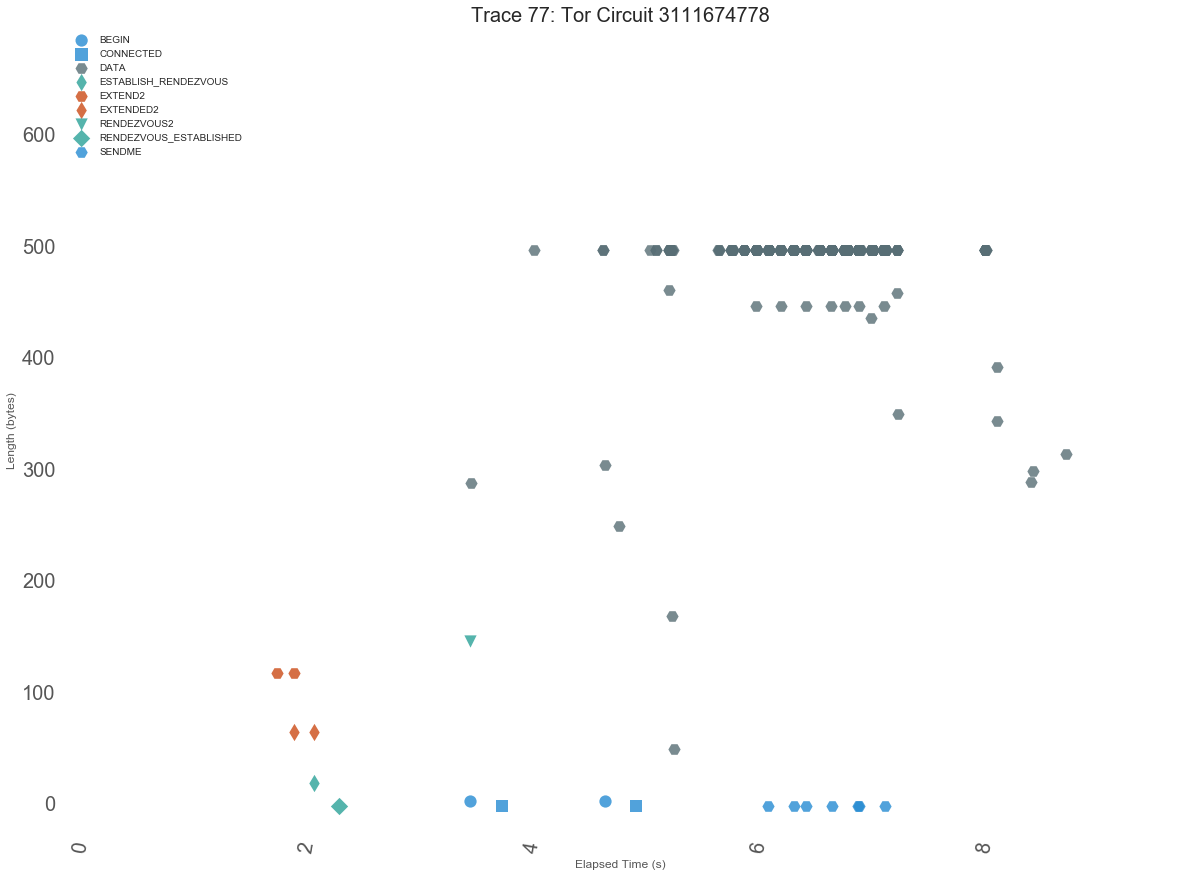

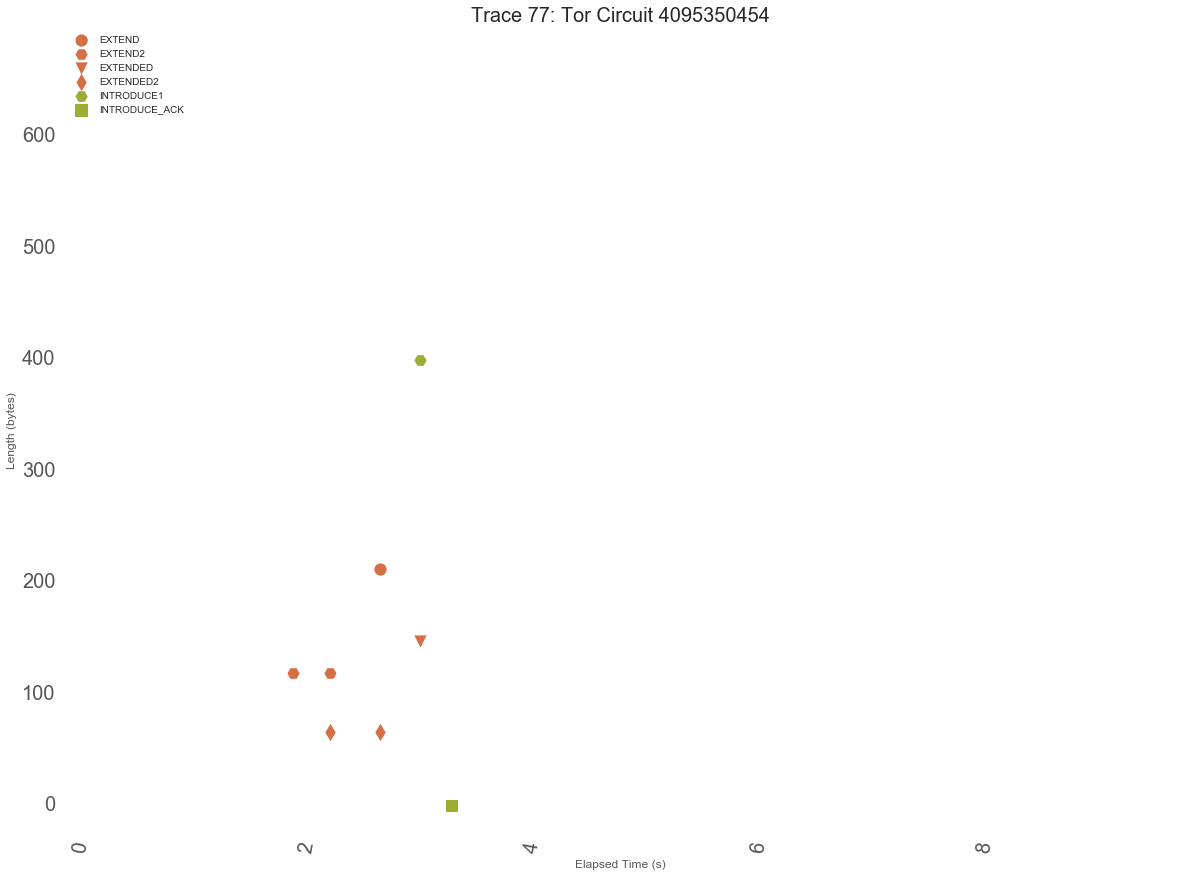

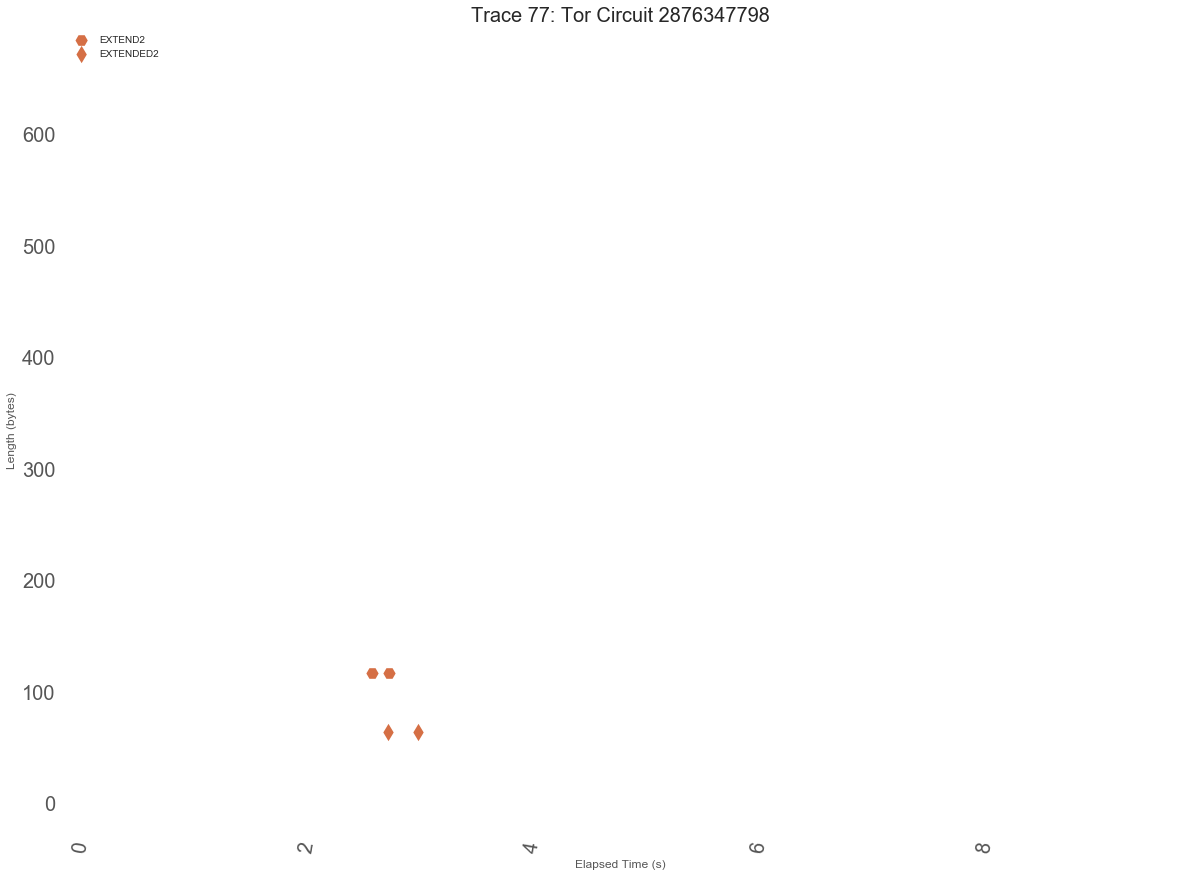

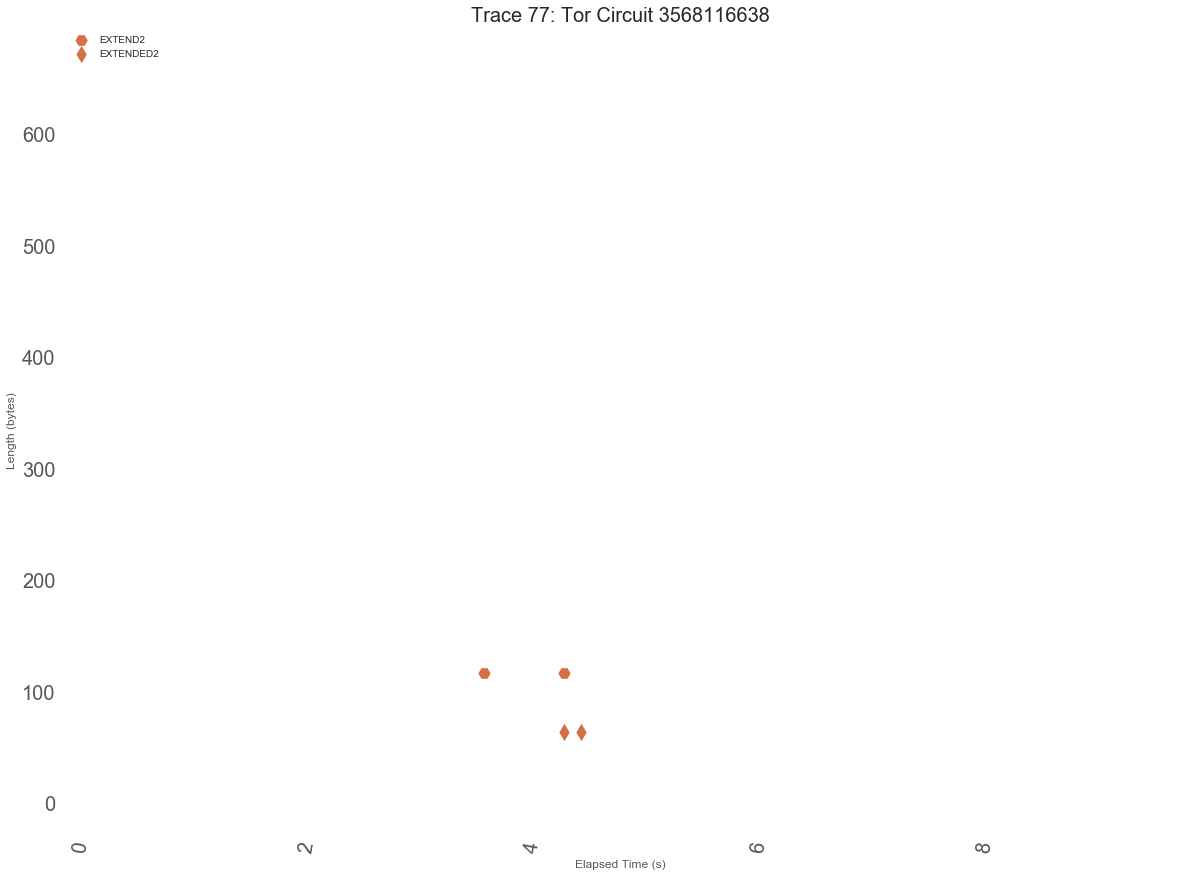

In [28]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '77-raw')), '77')

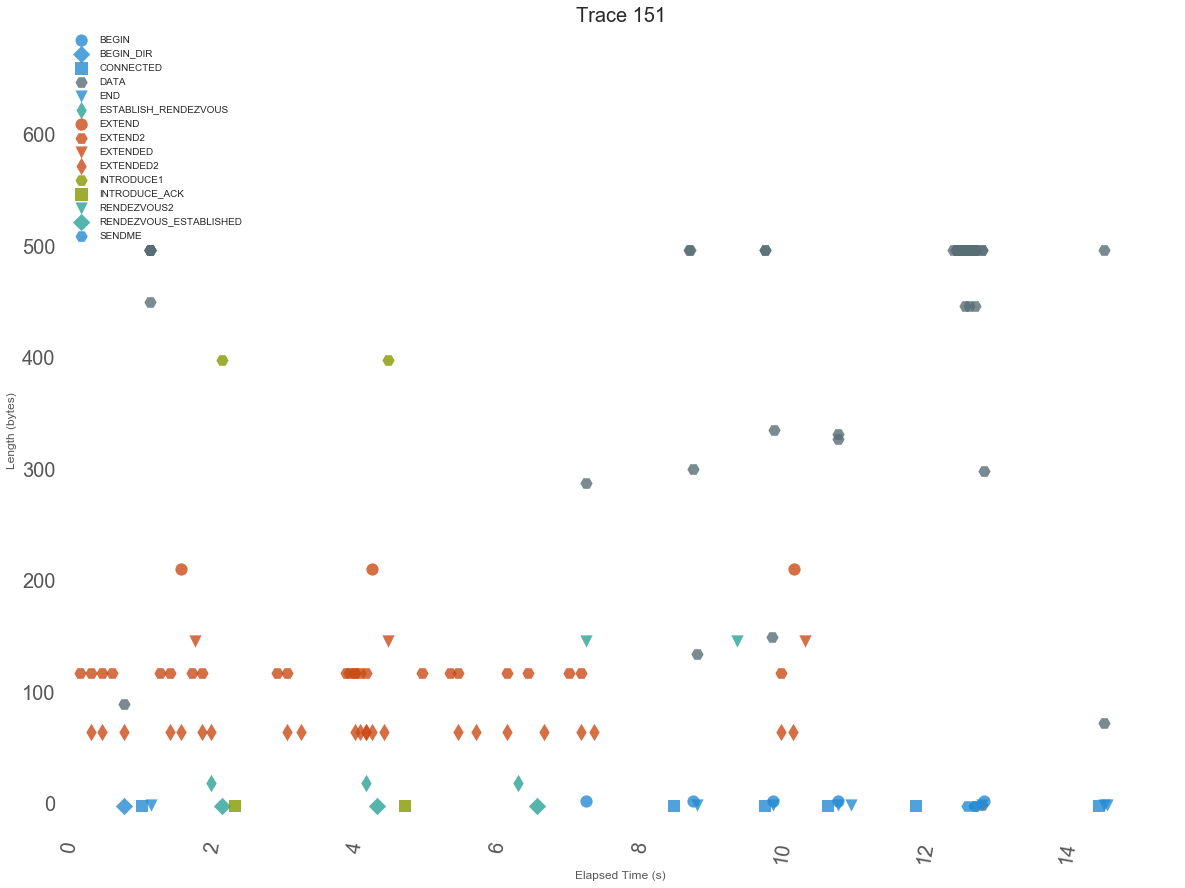

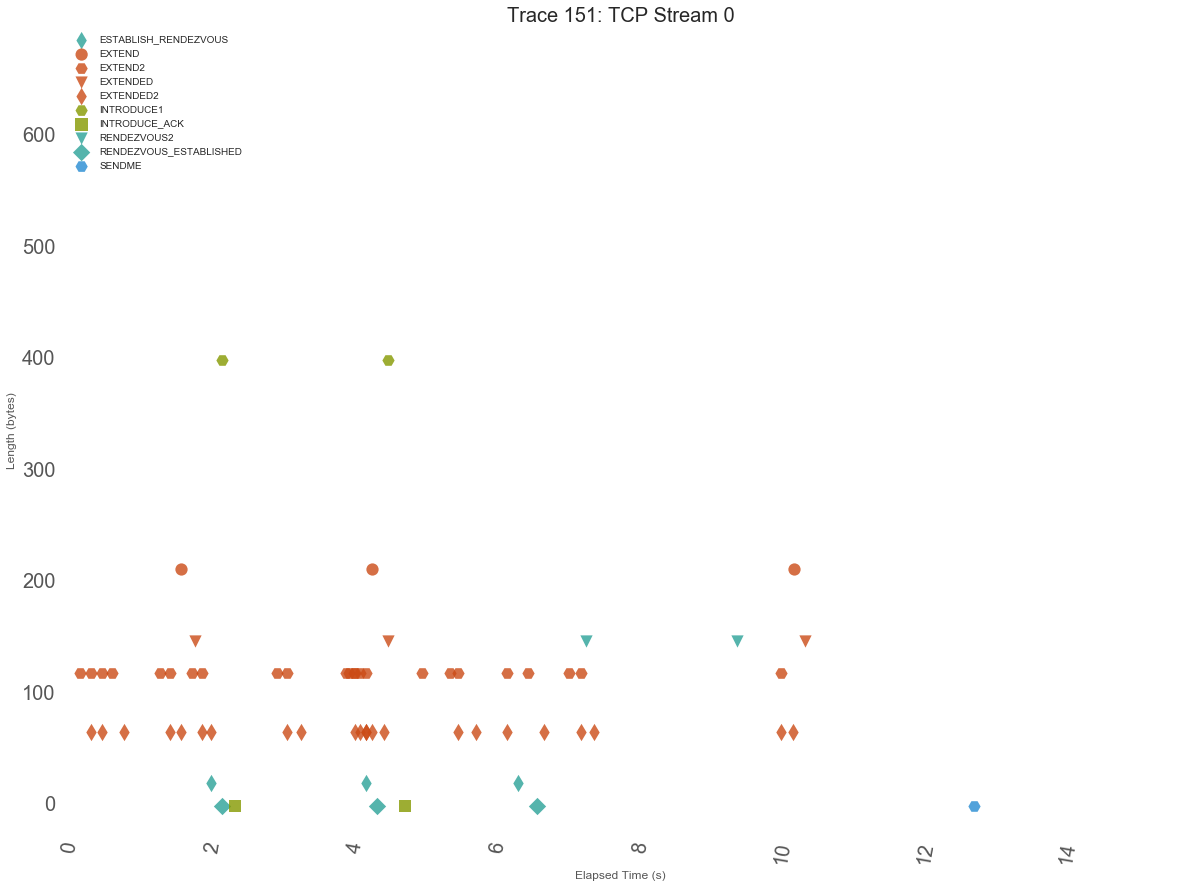

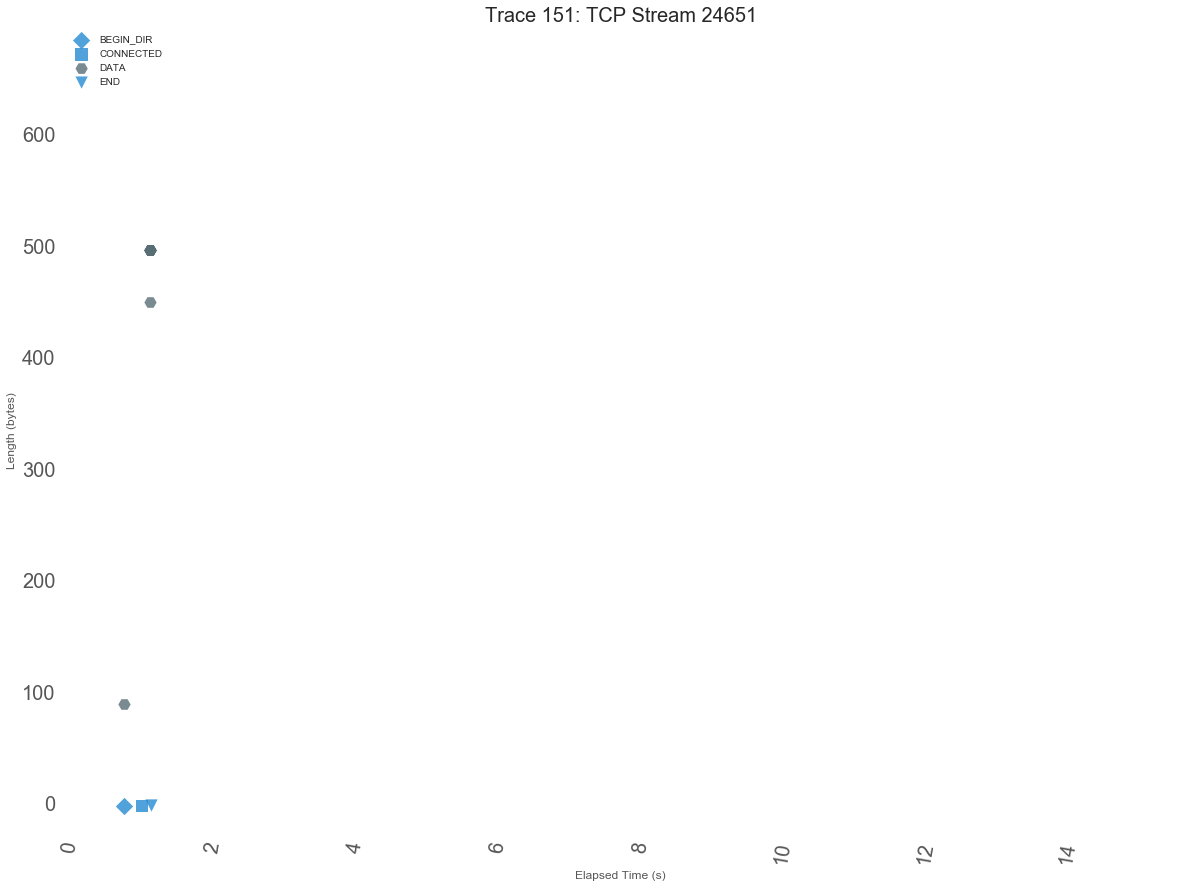

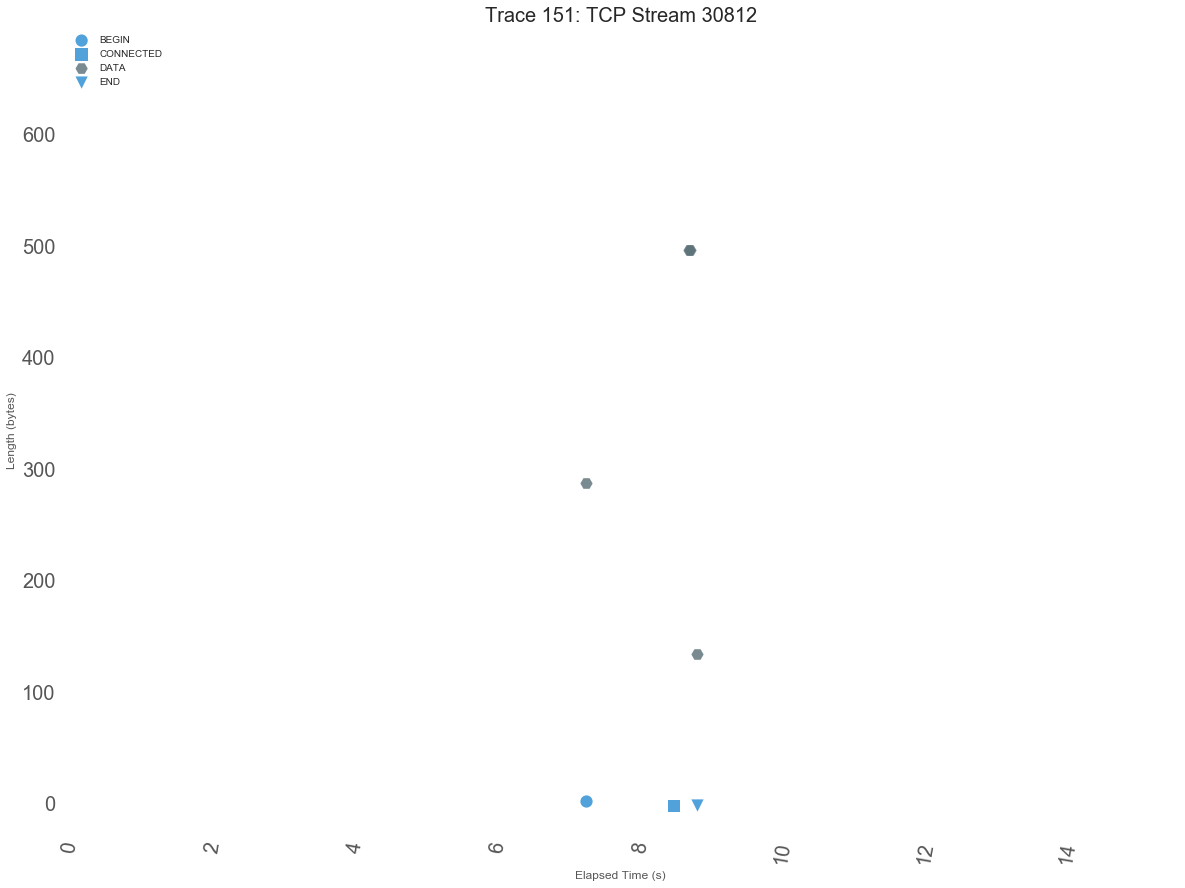

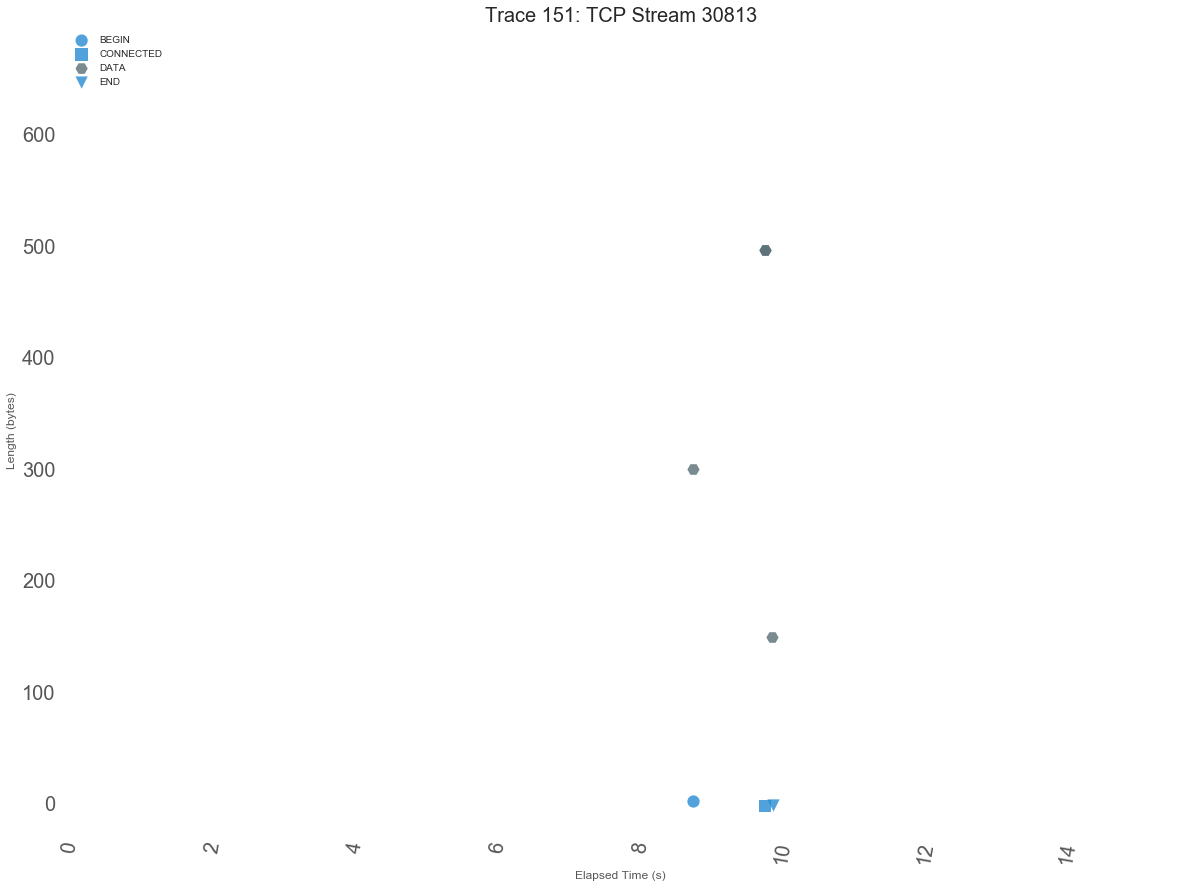

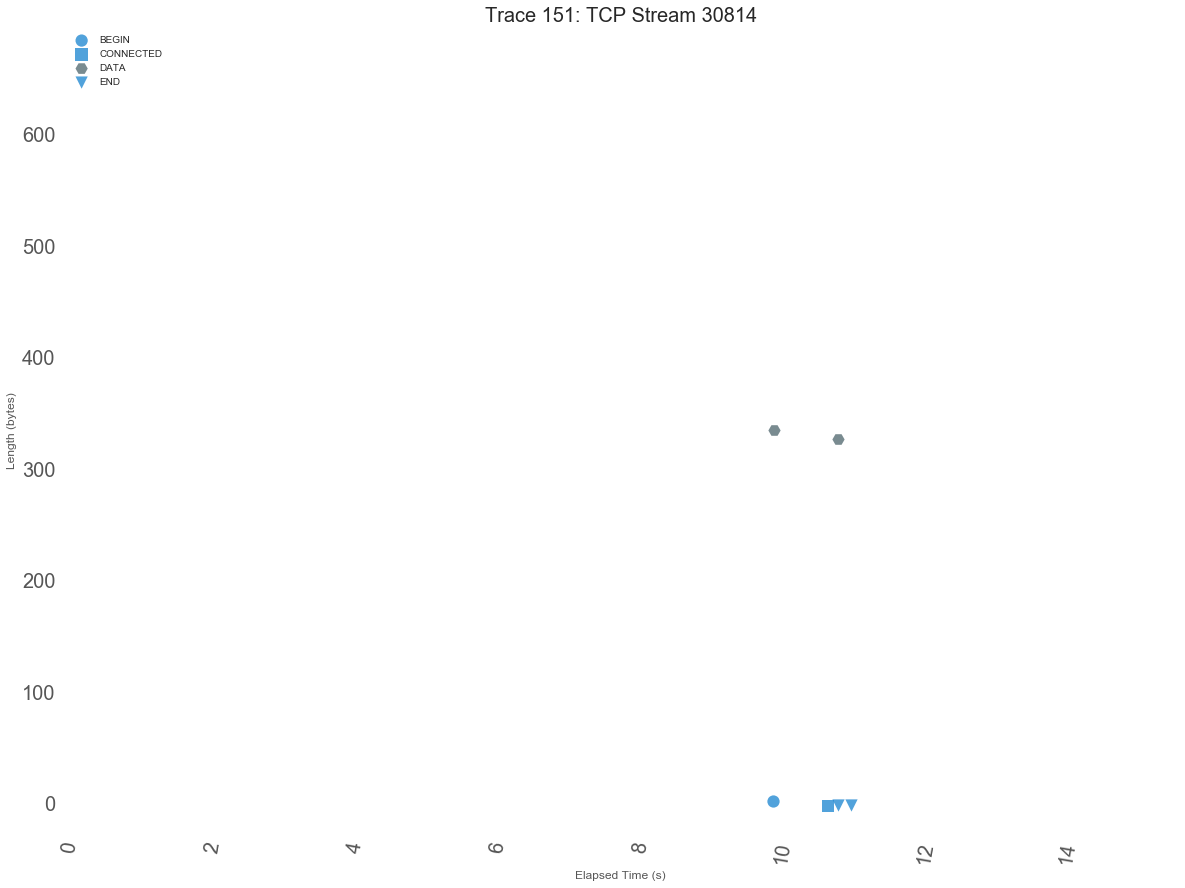

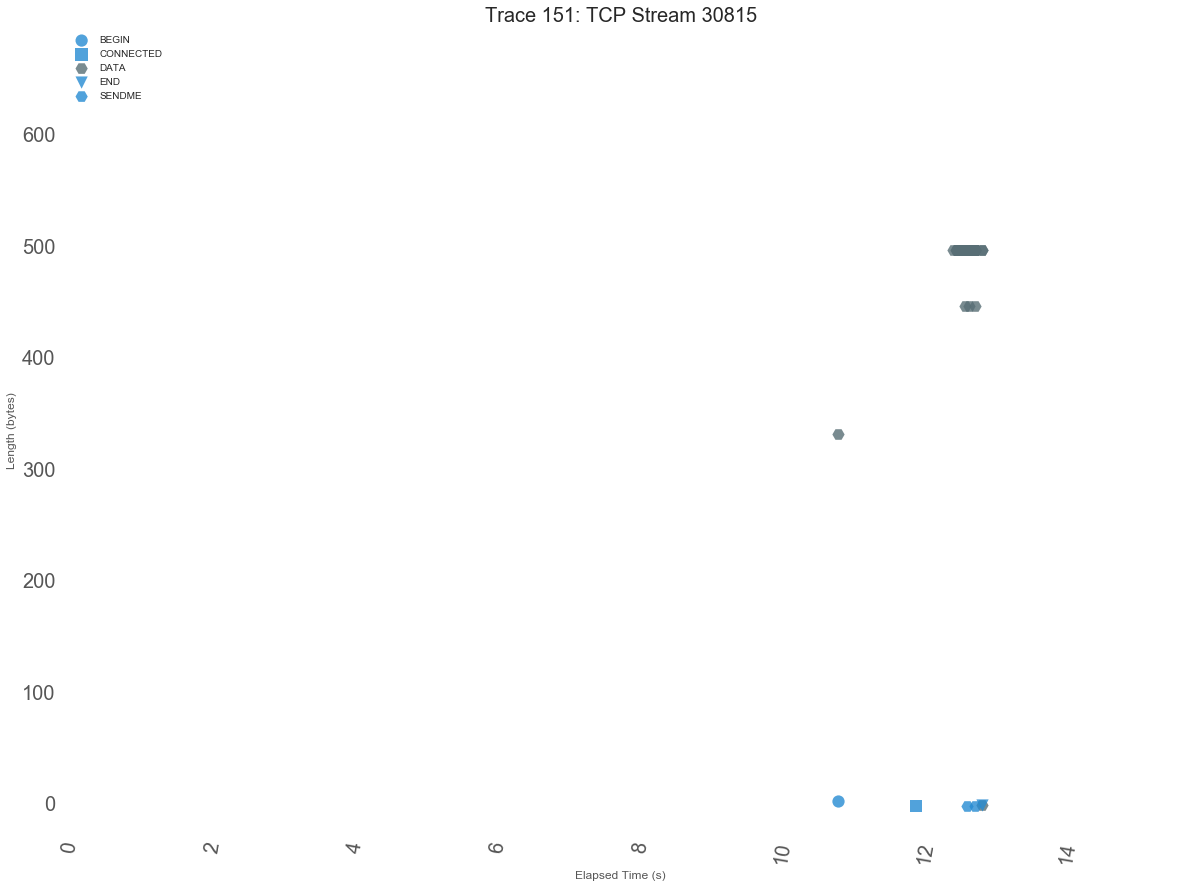

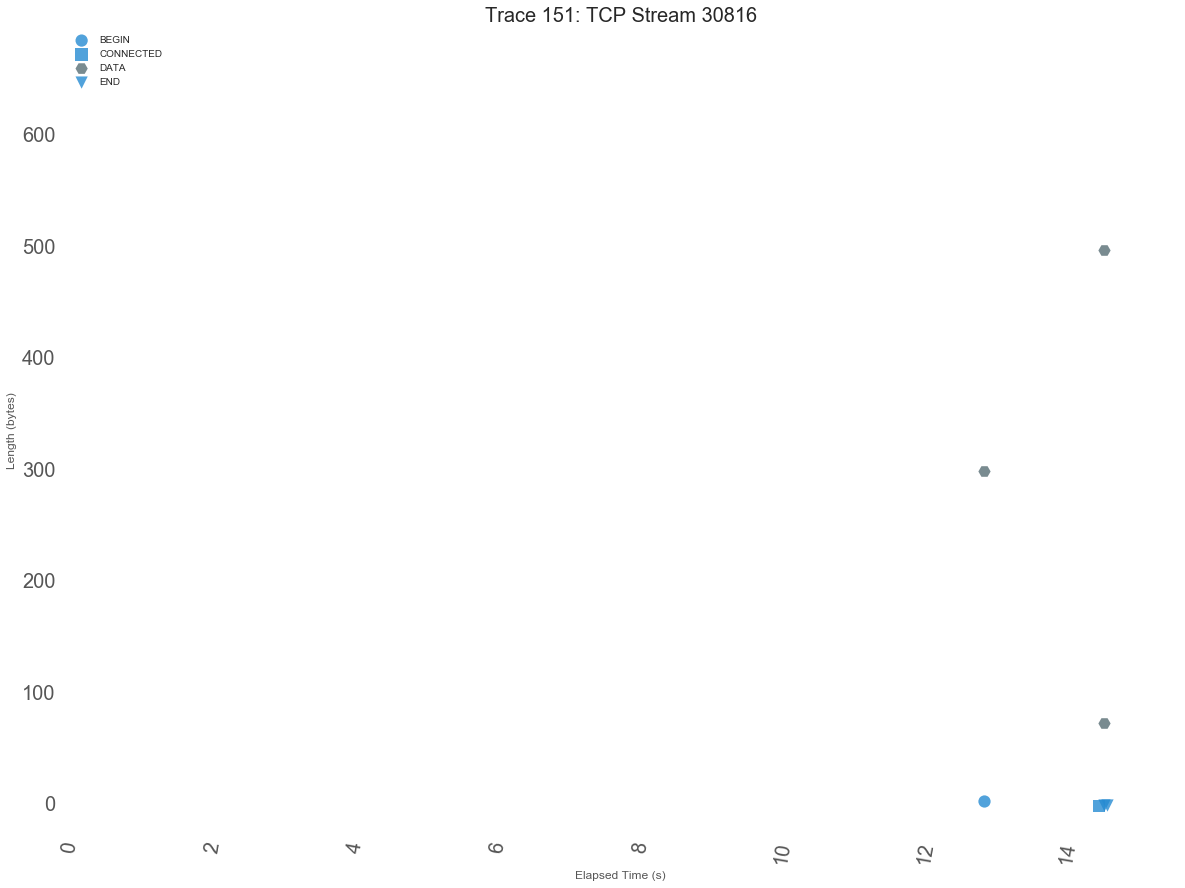

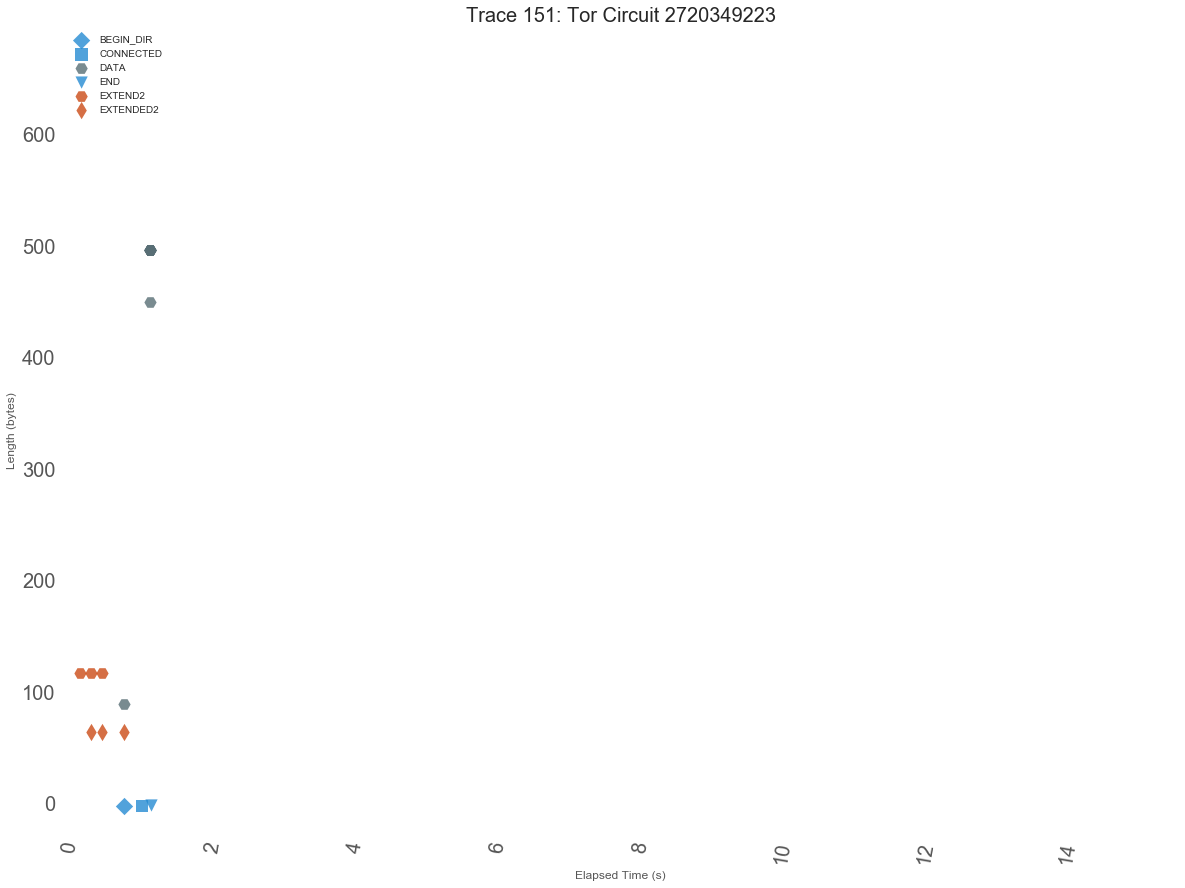

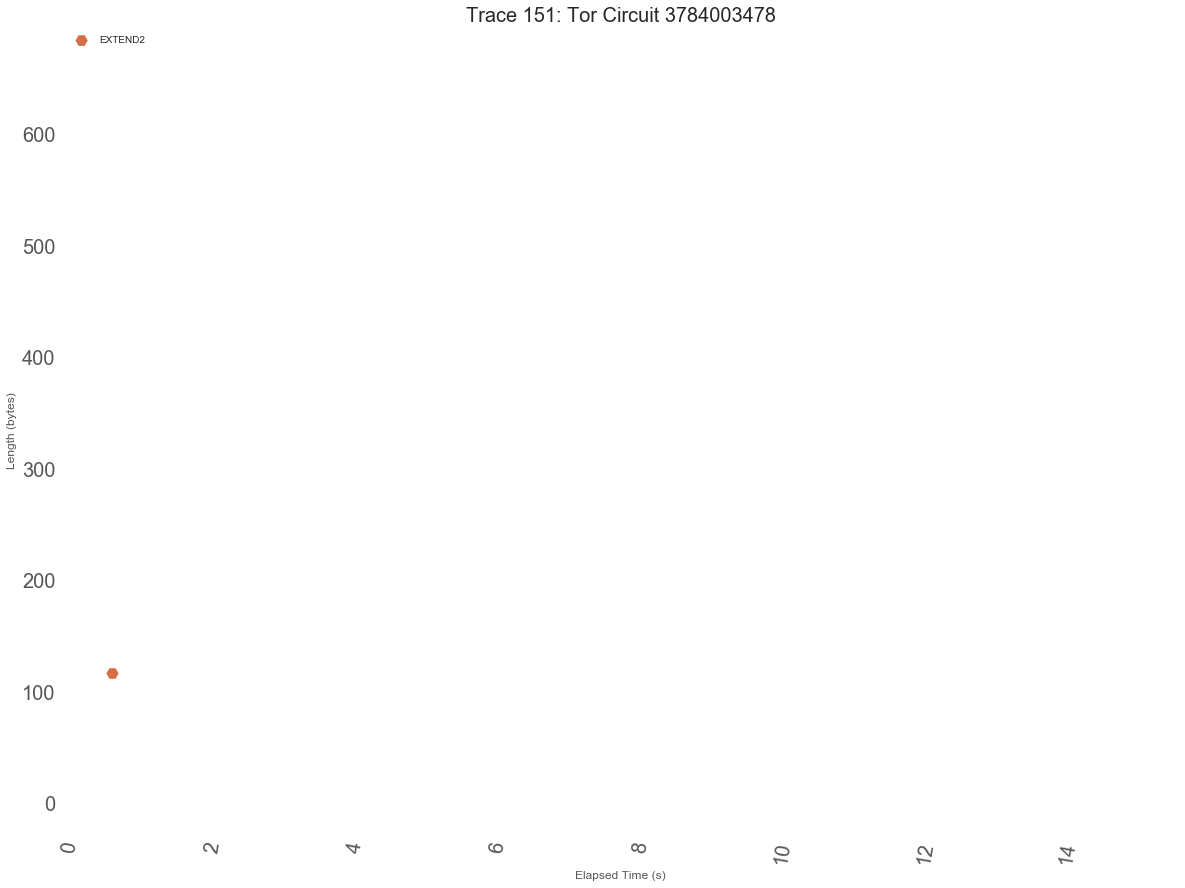

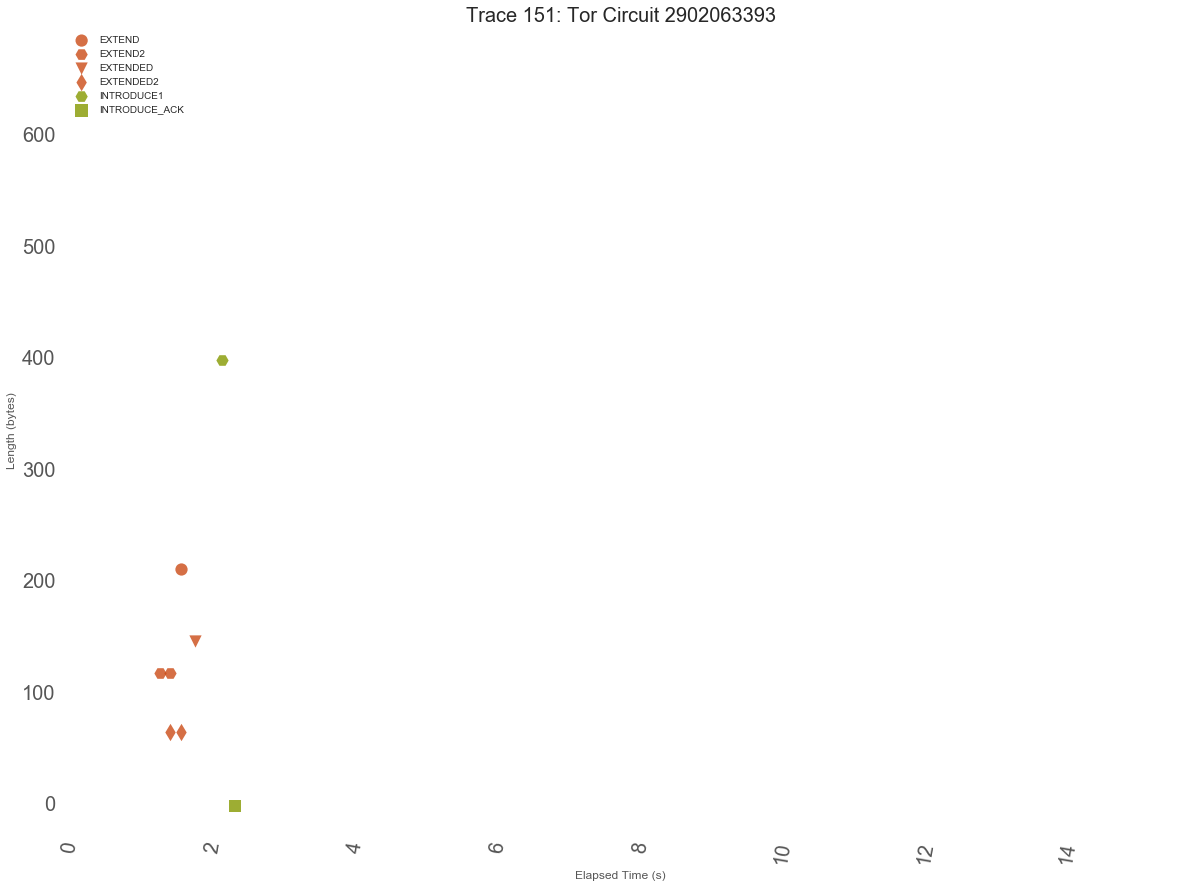

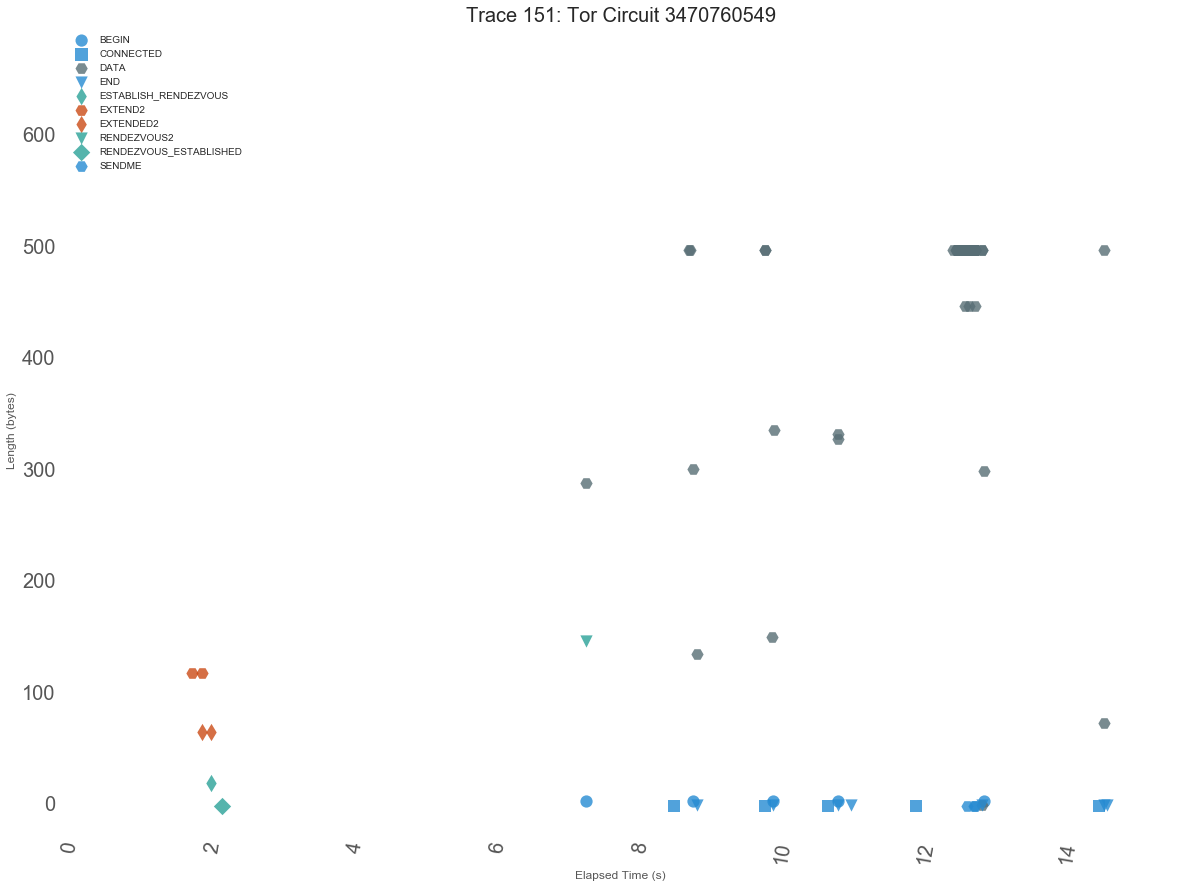

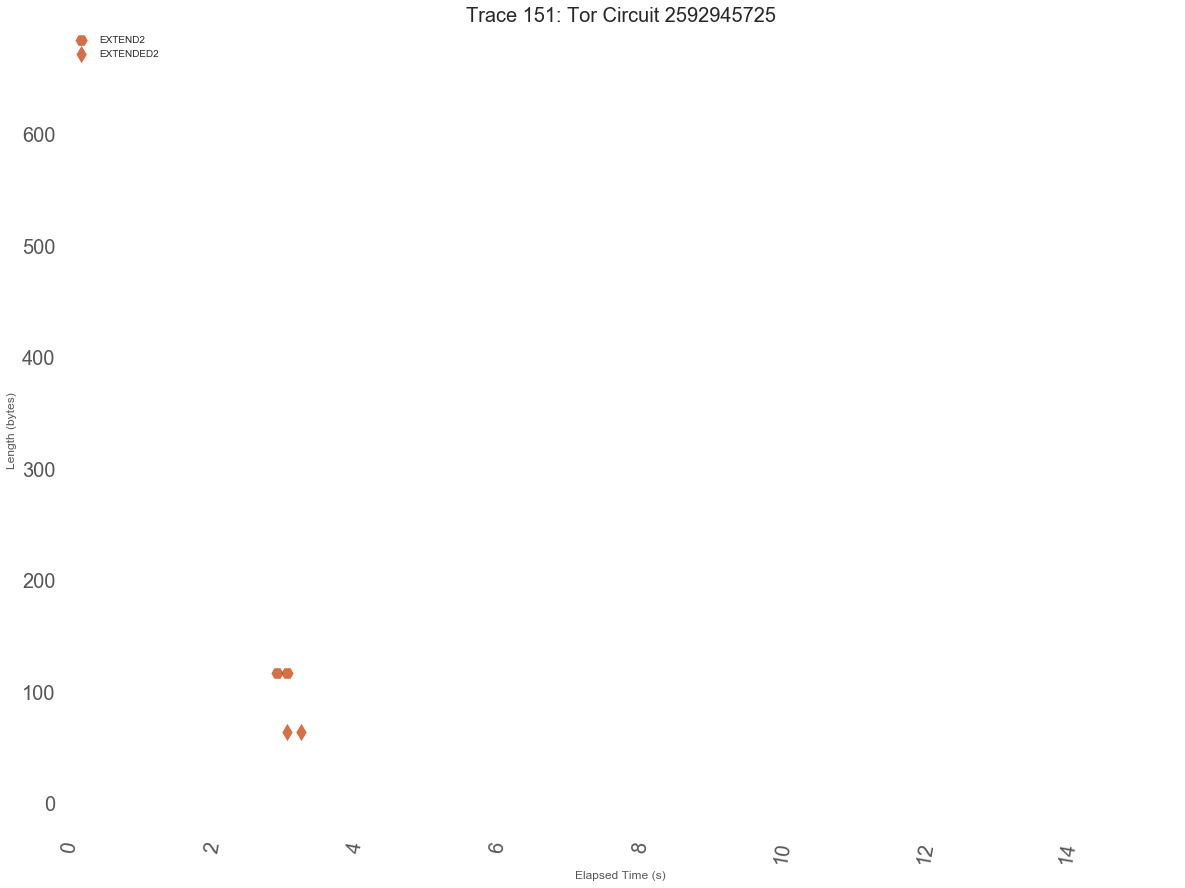

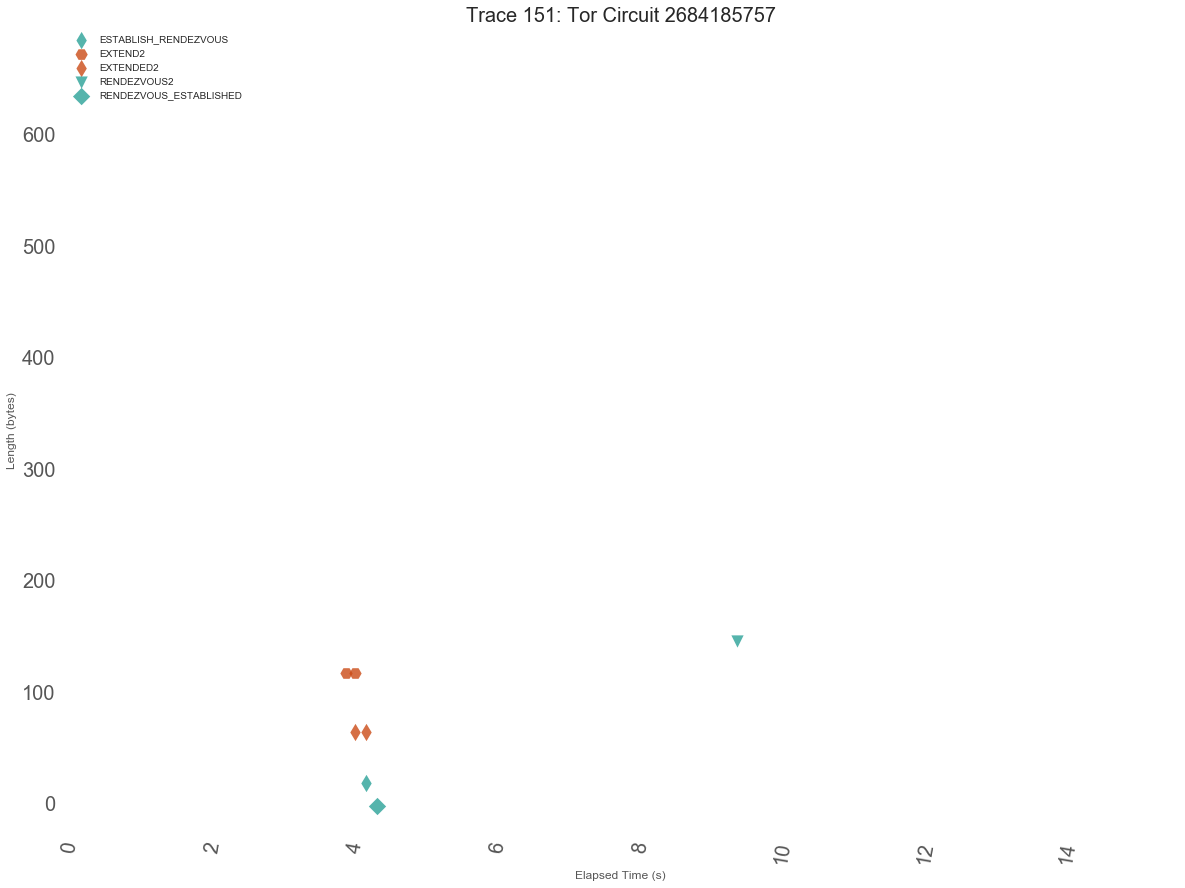

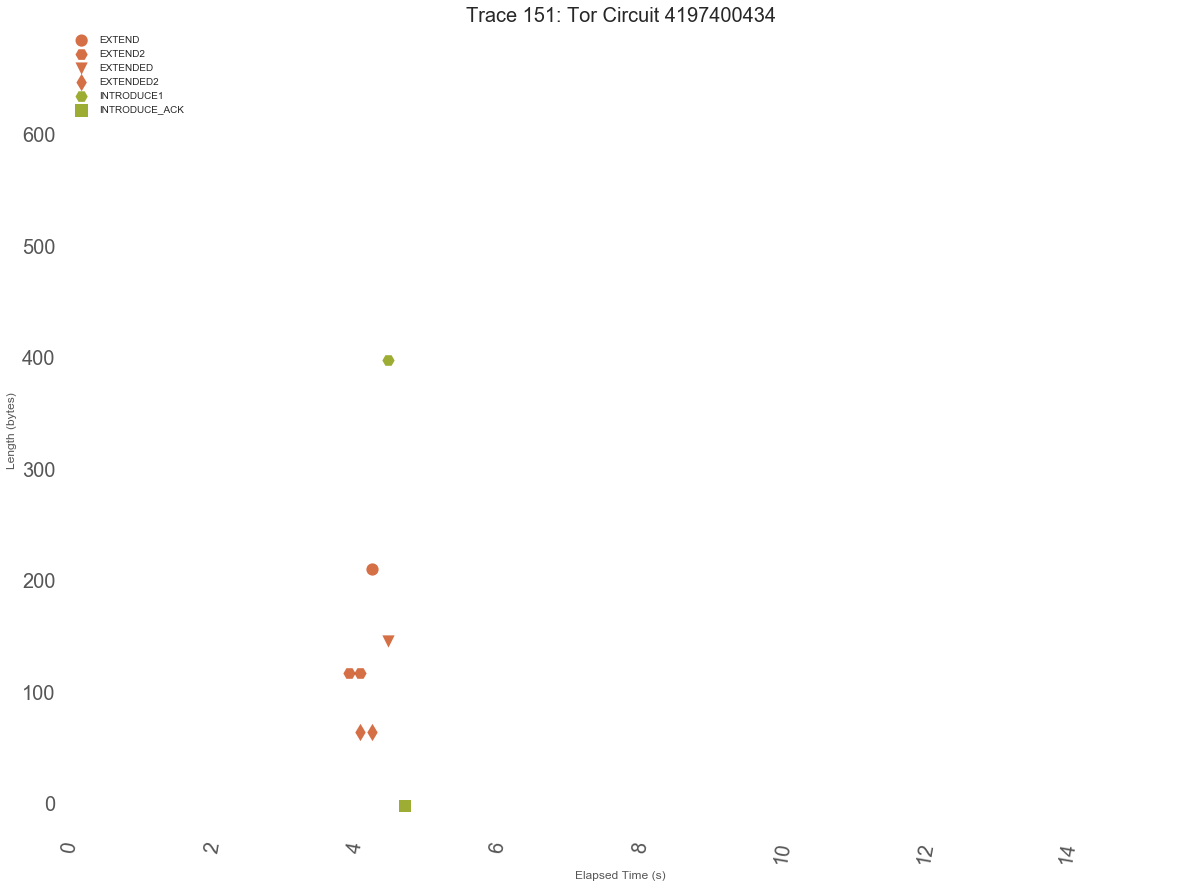

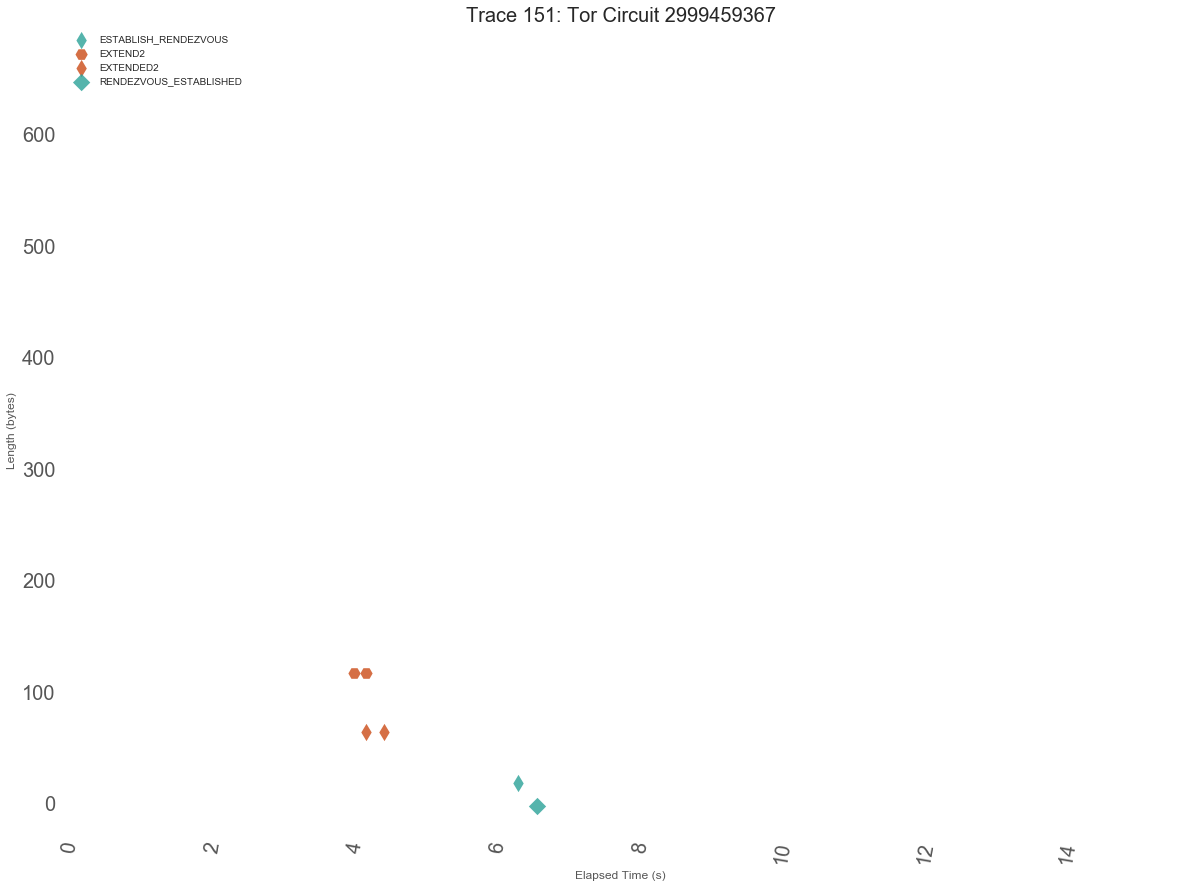

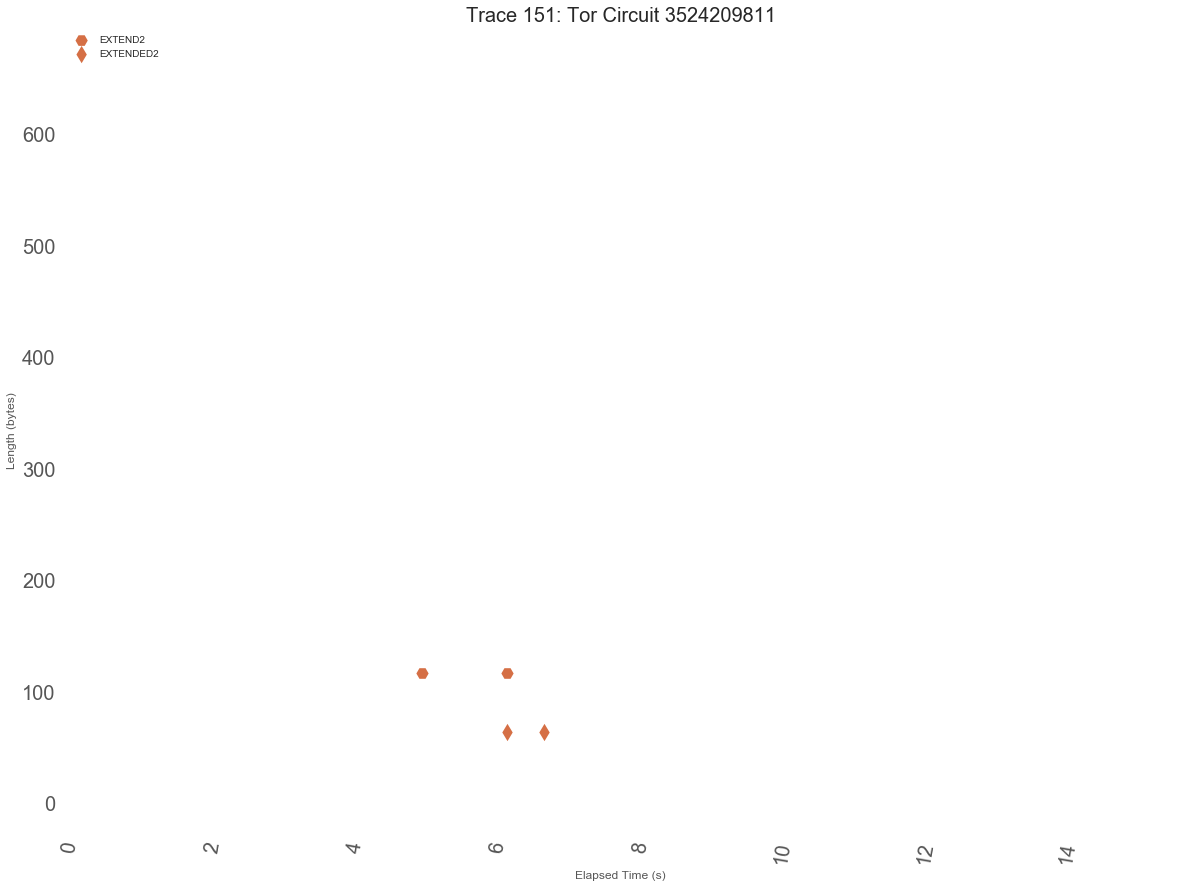

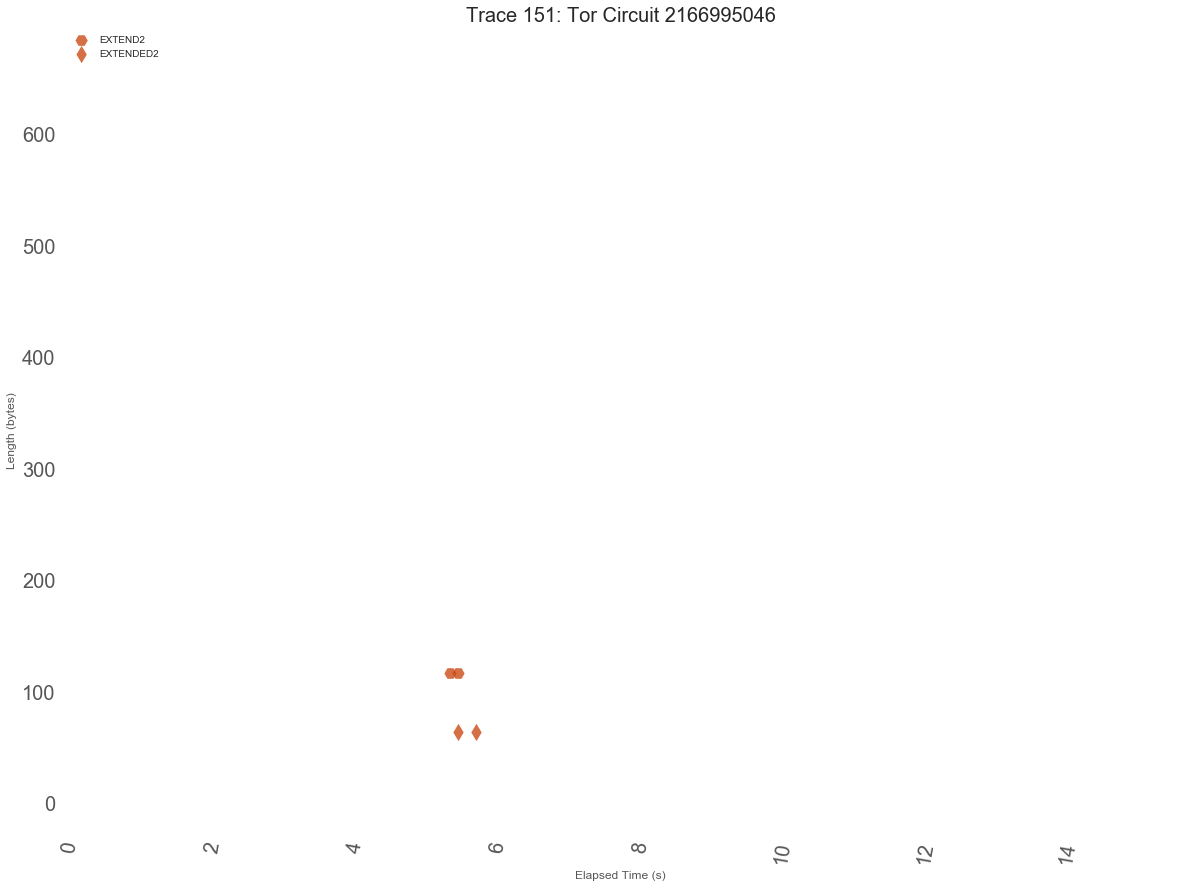

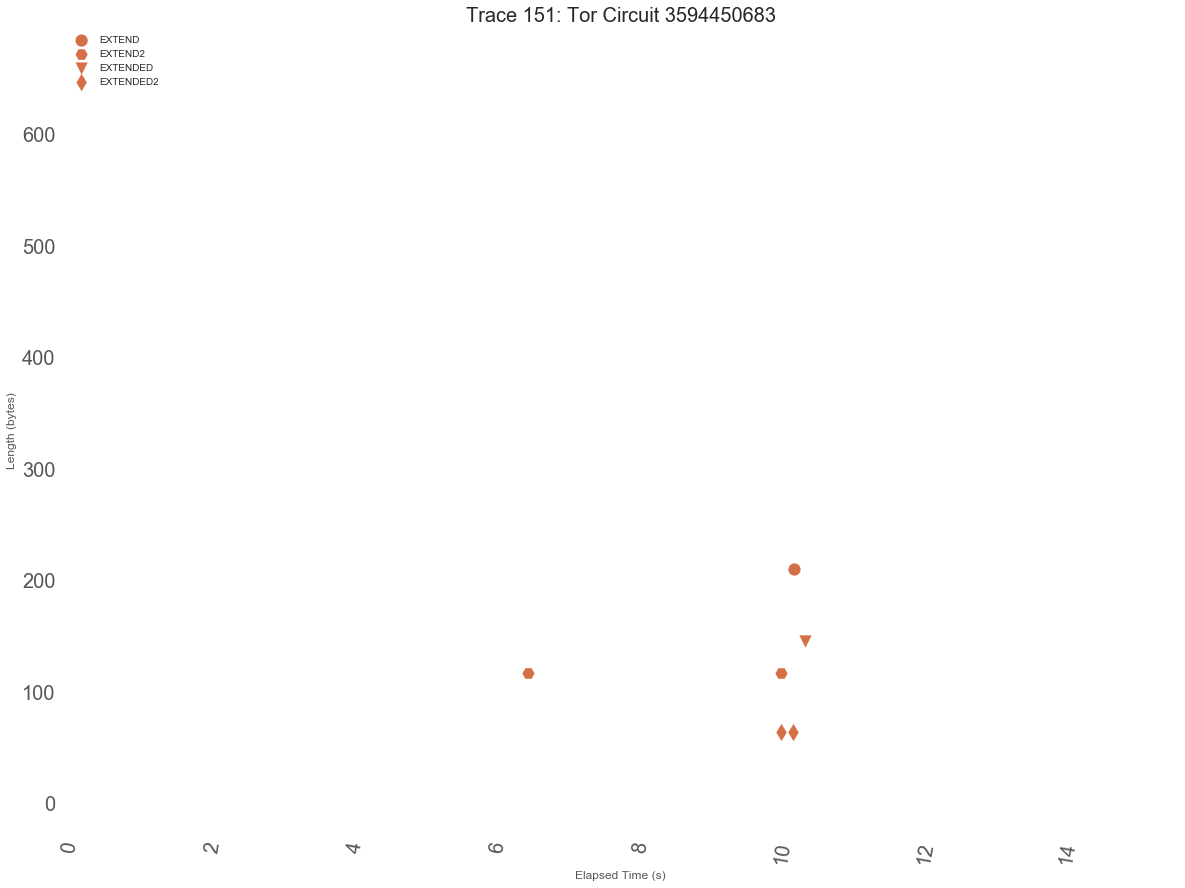

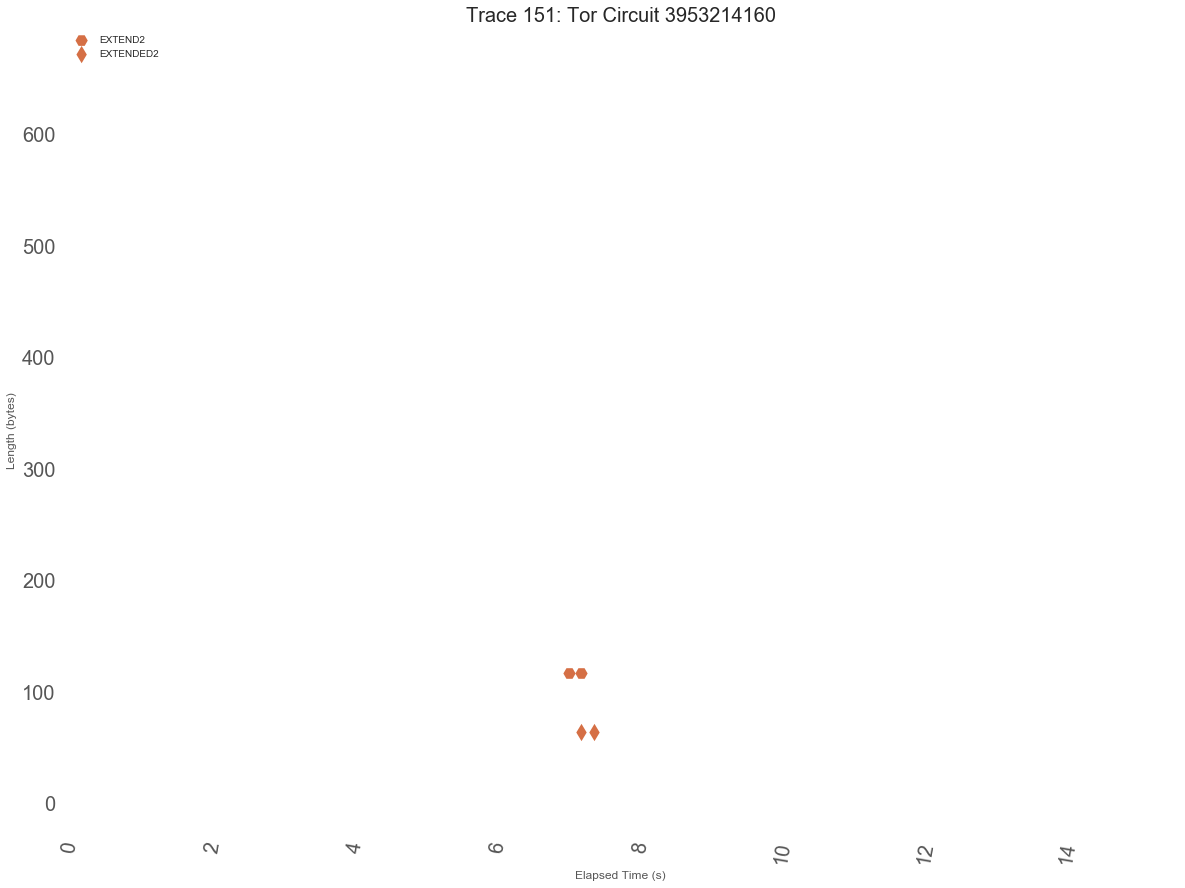

In [29]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '151-raw')), '151')

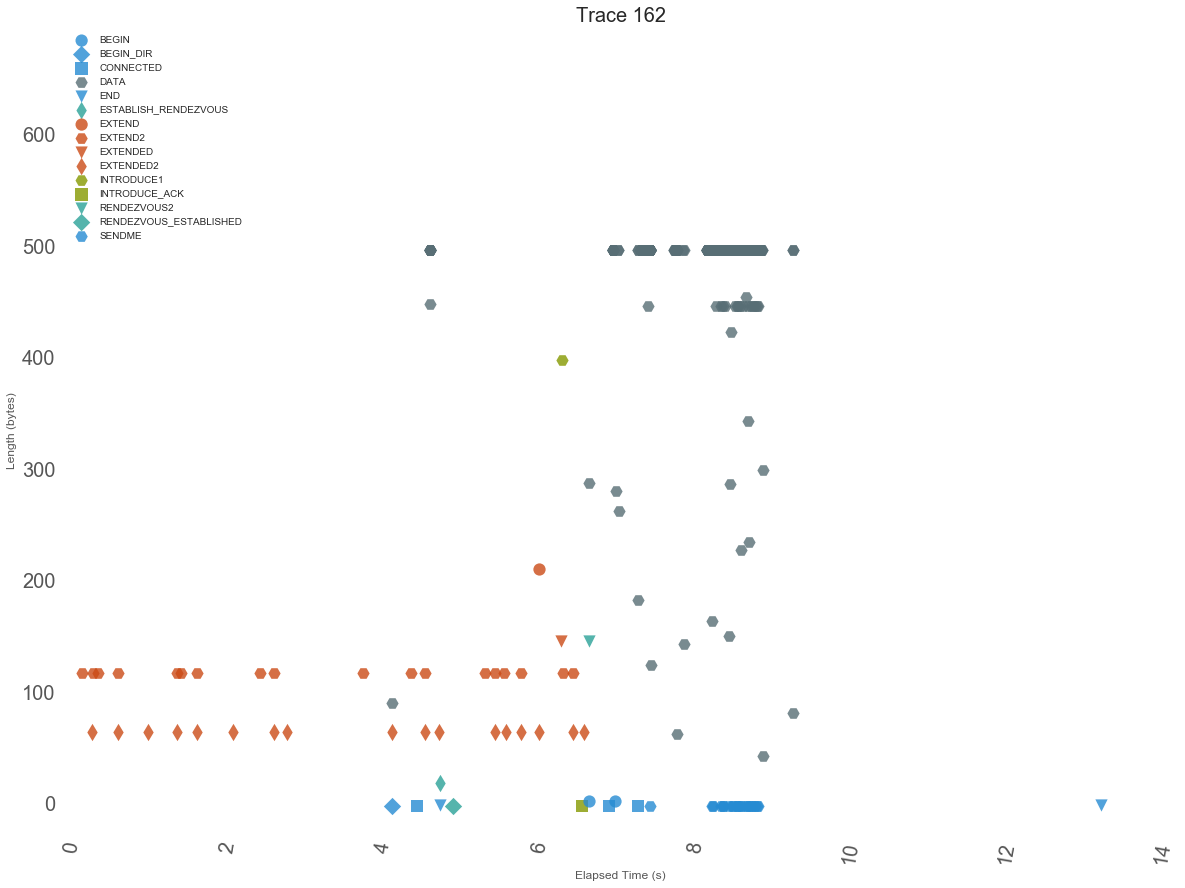

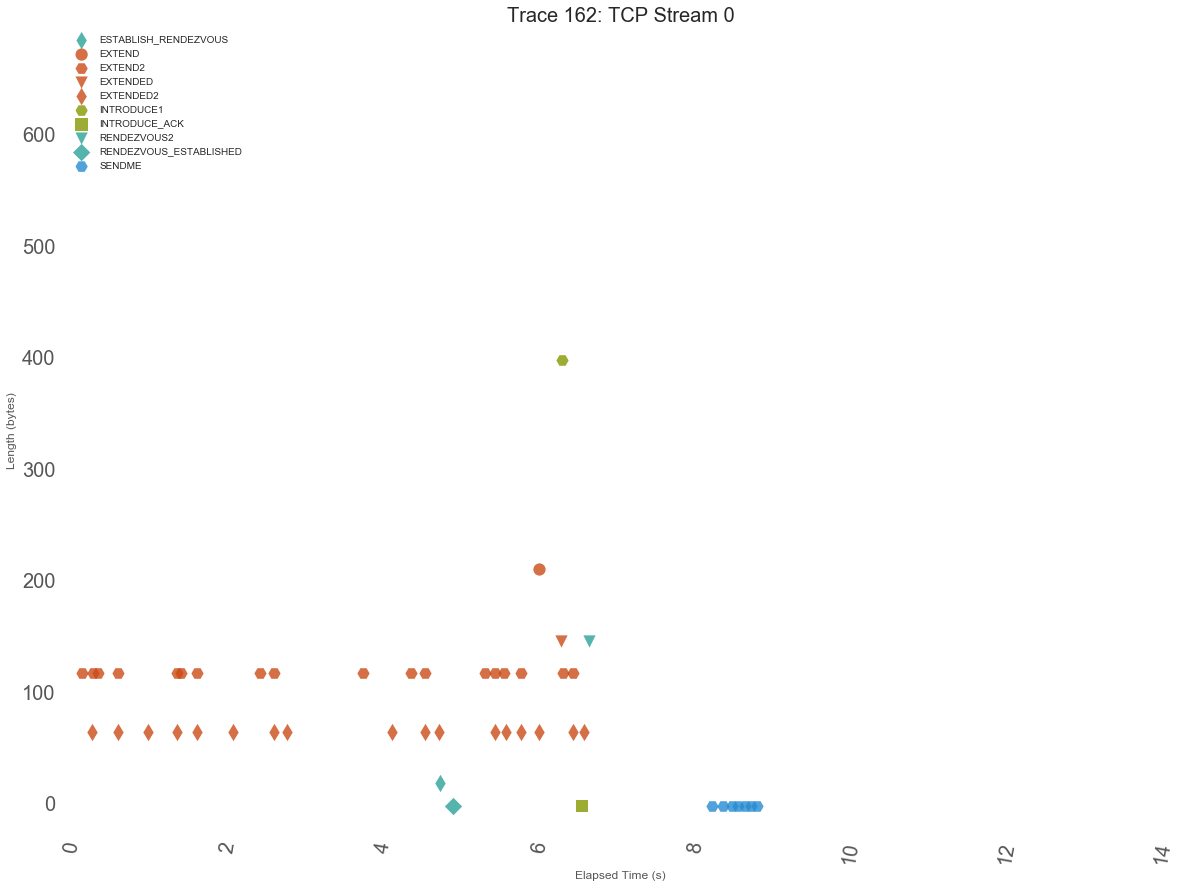

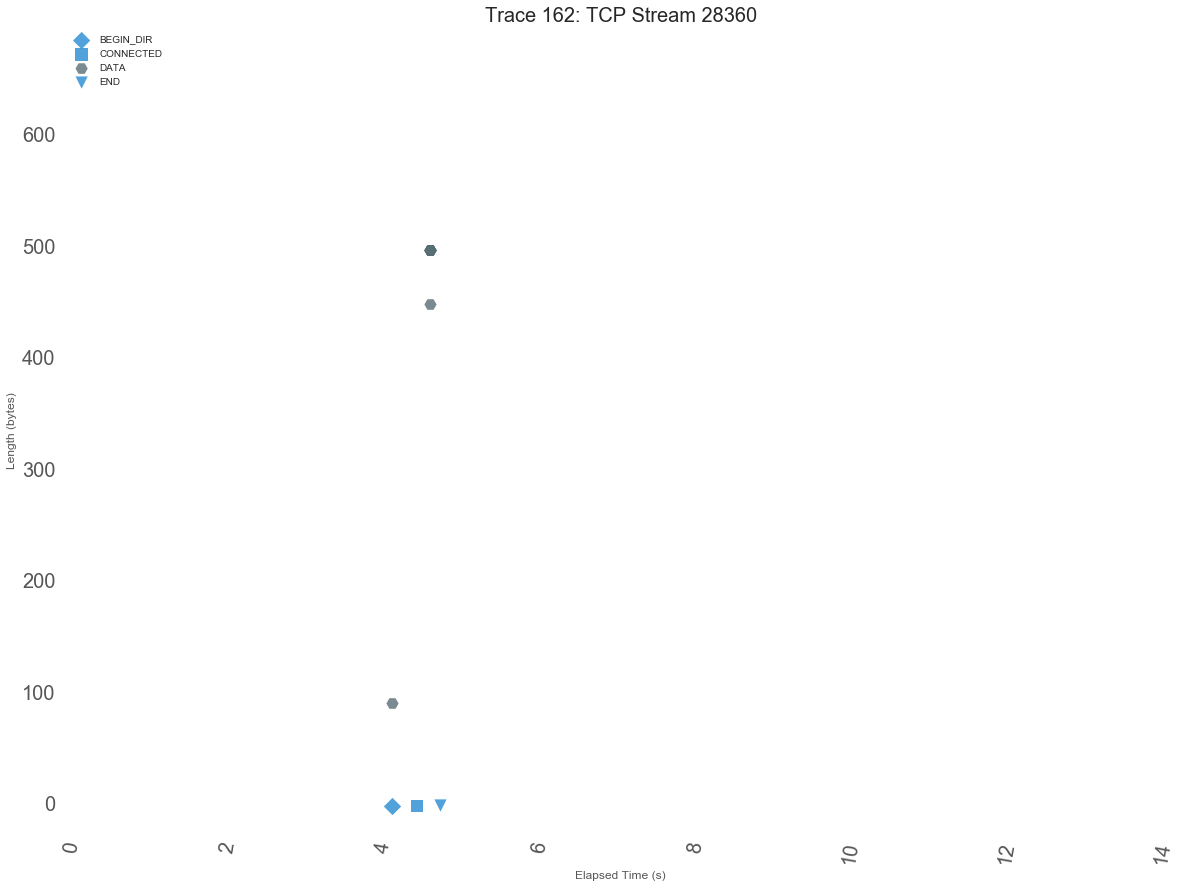

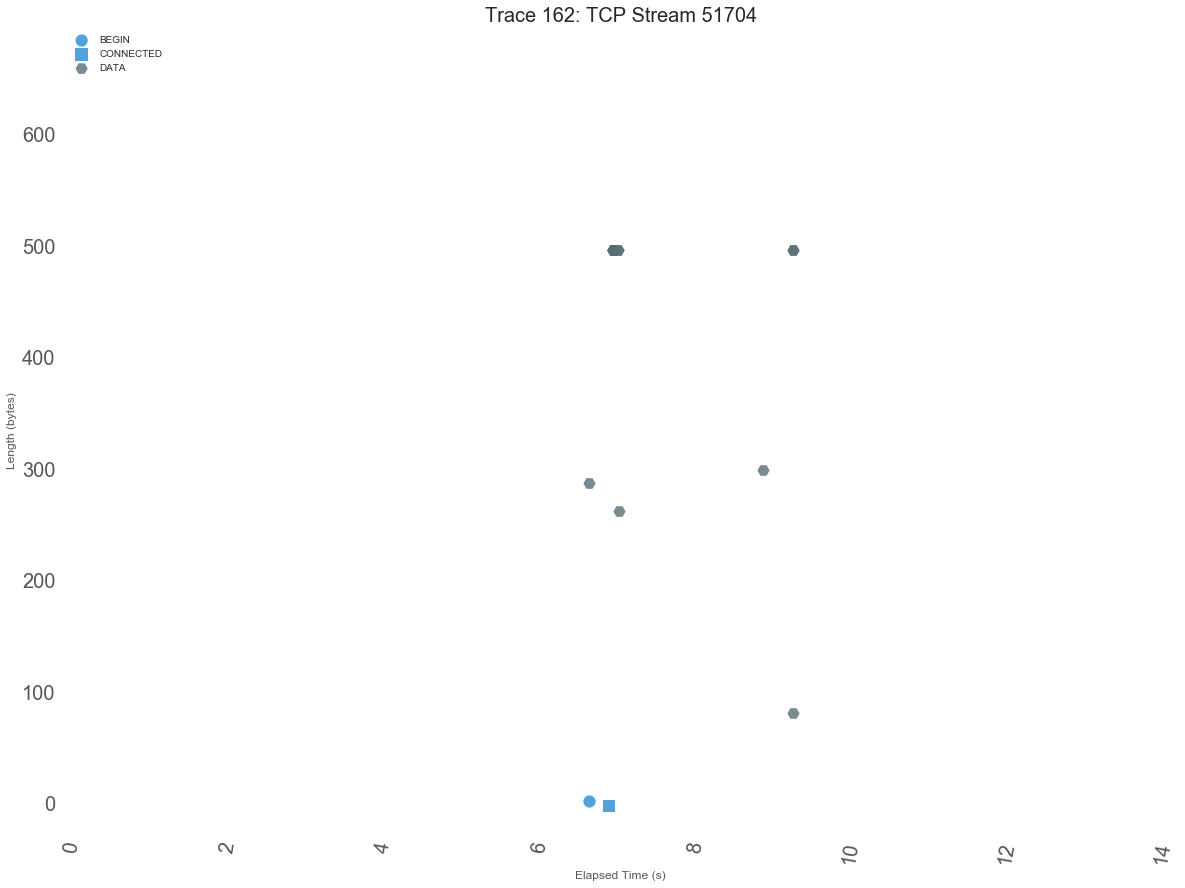

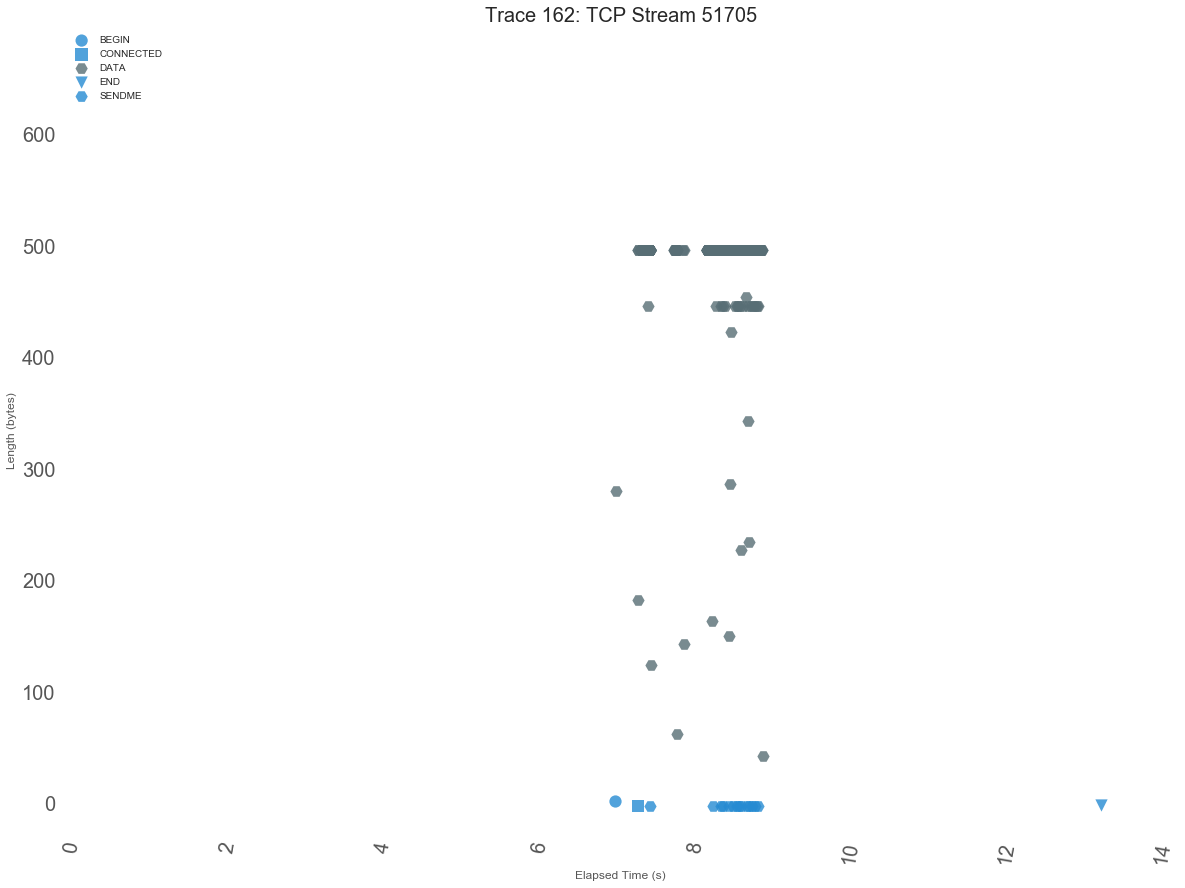

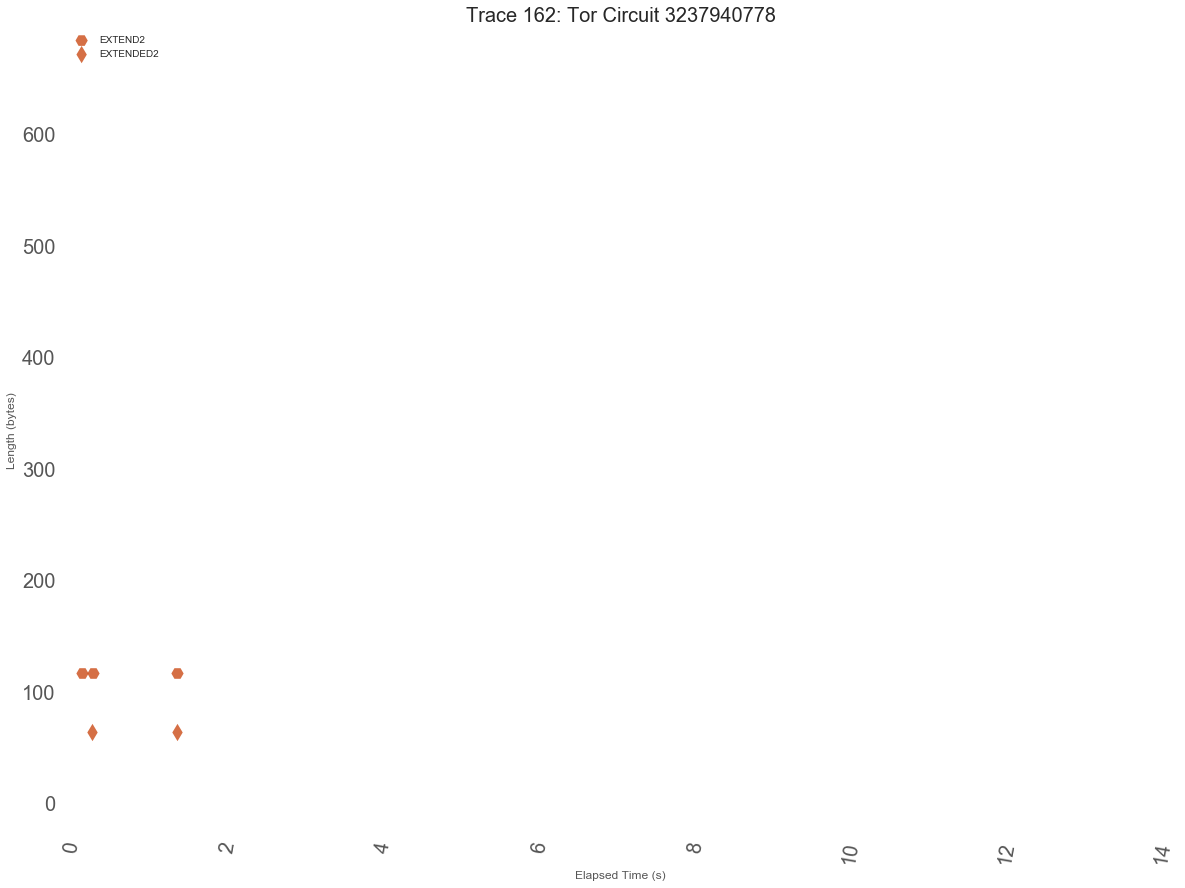

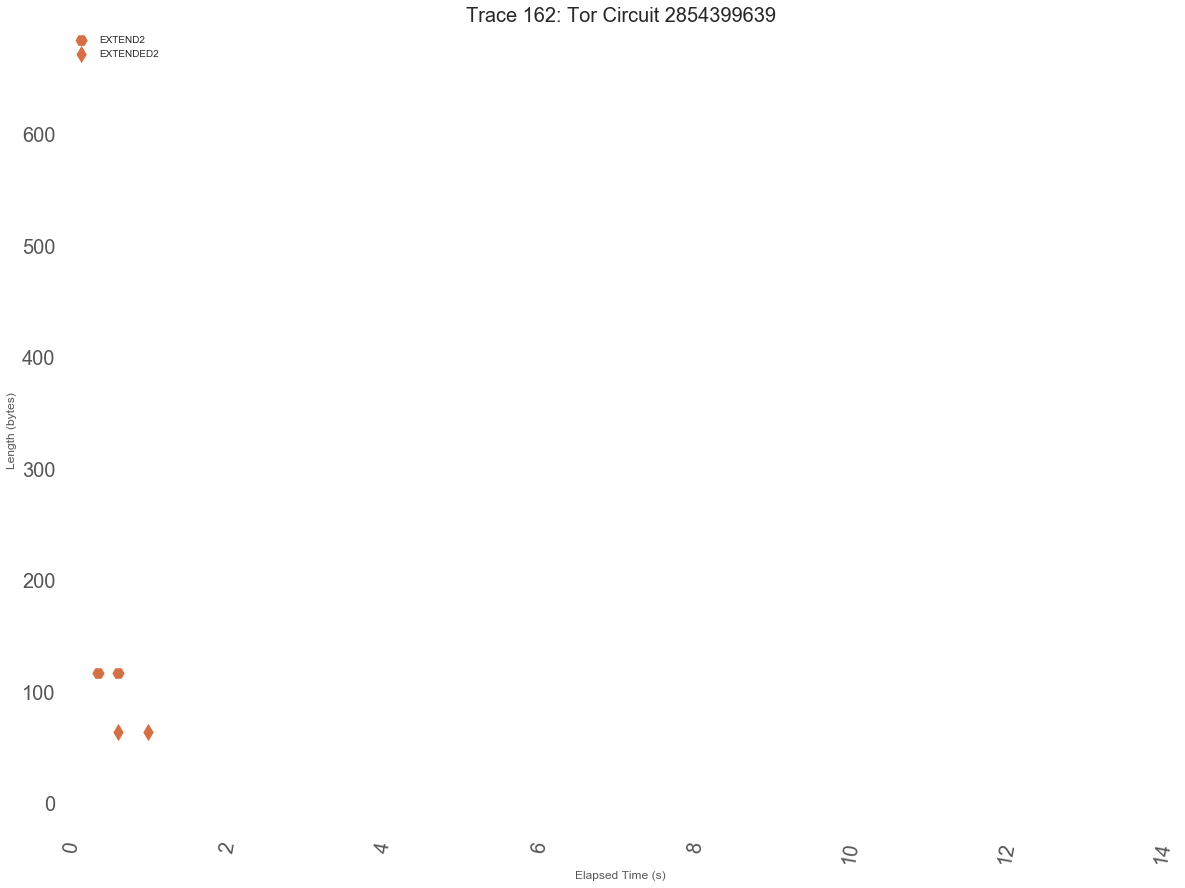

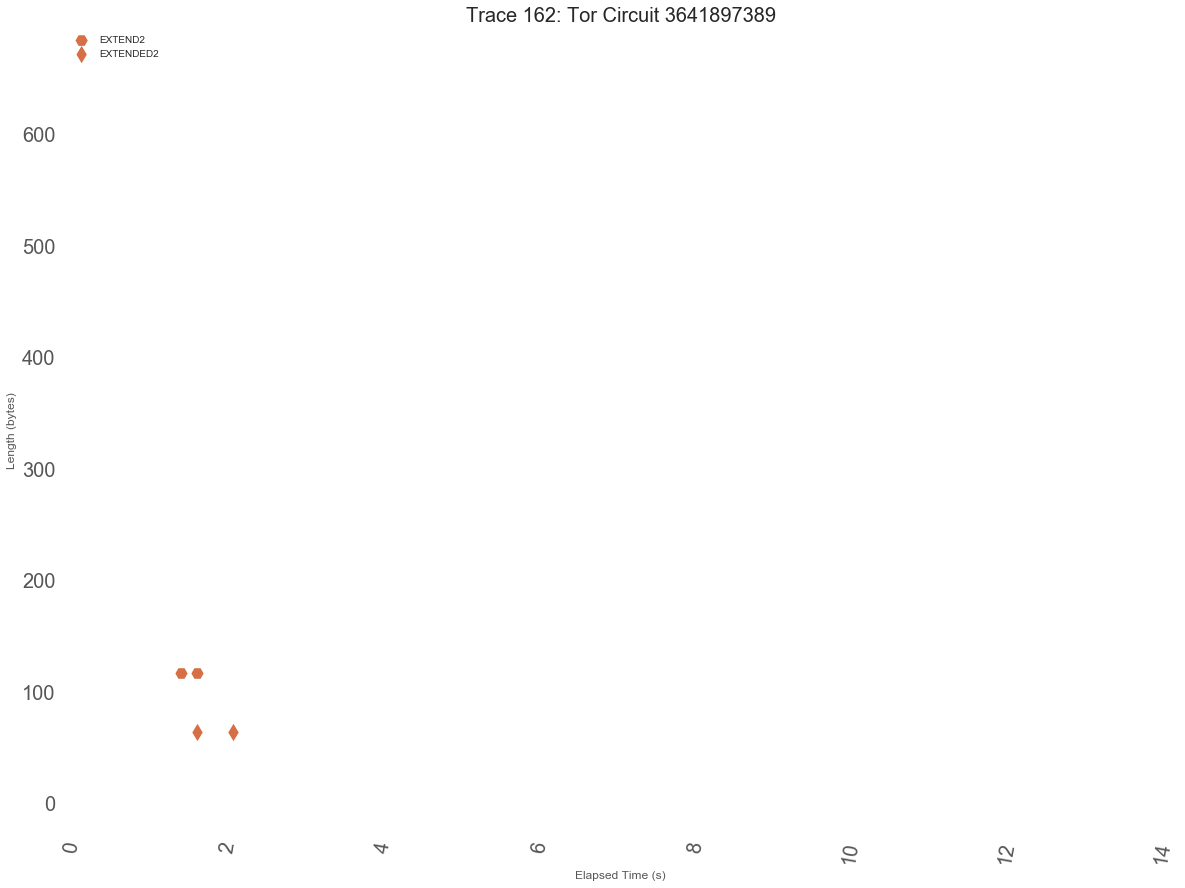

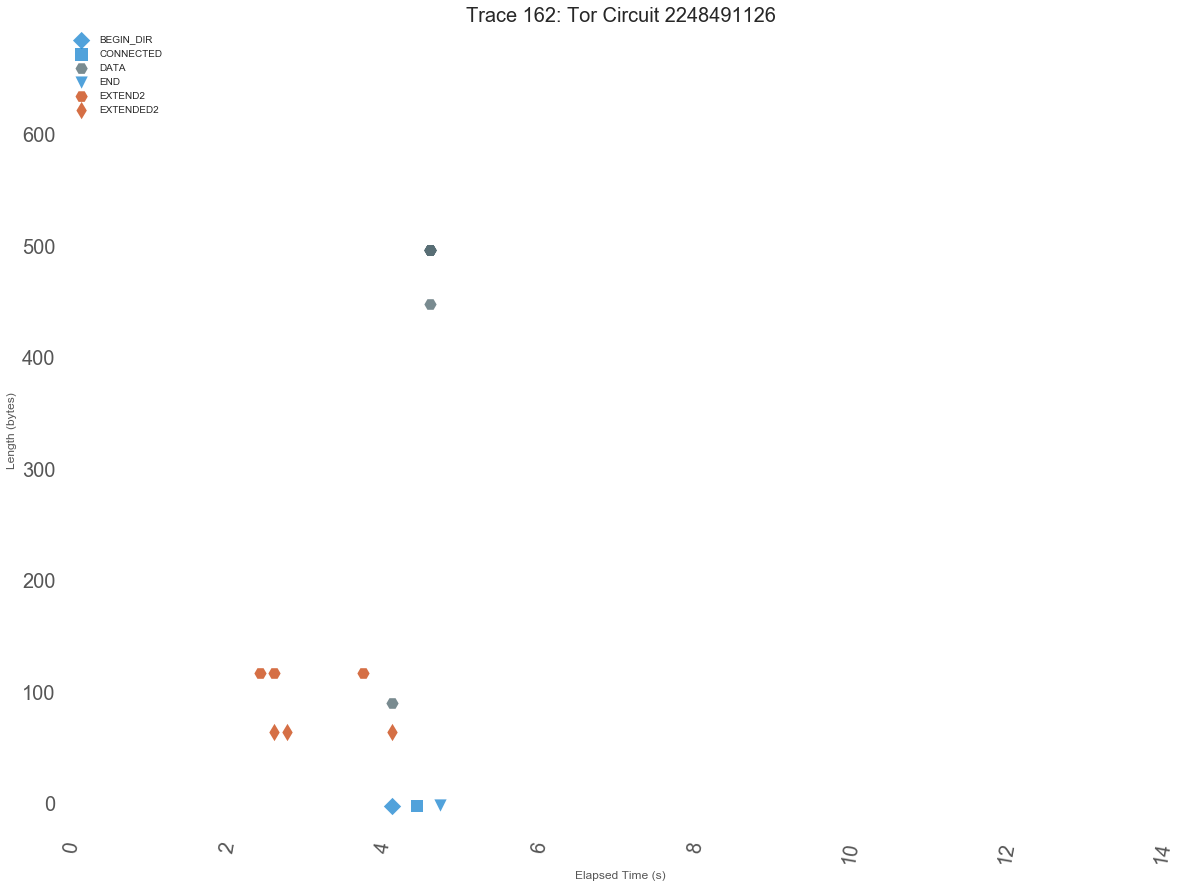

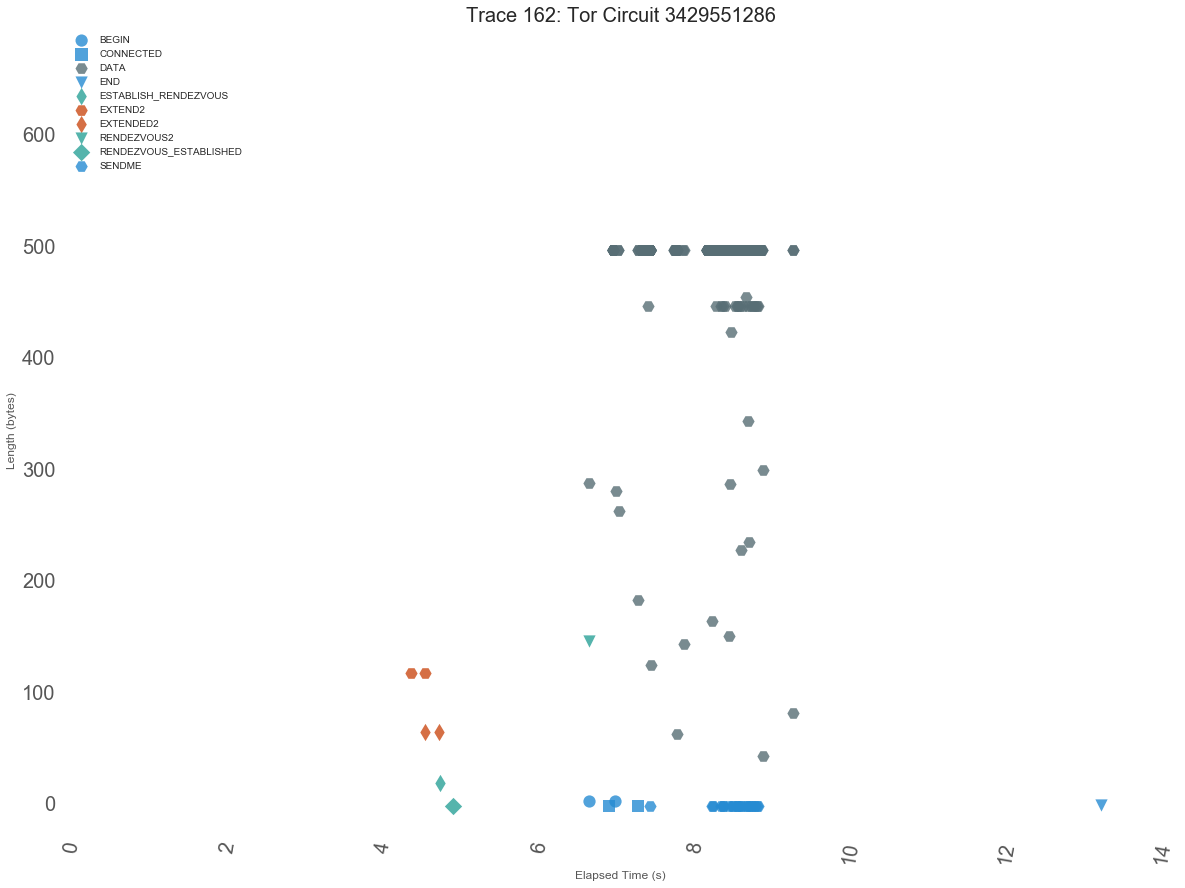

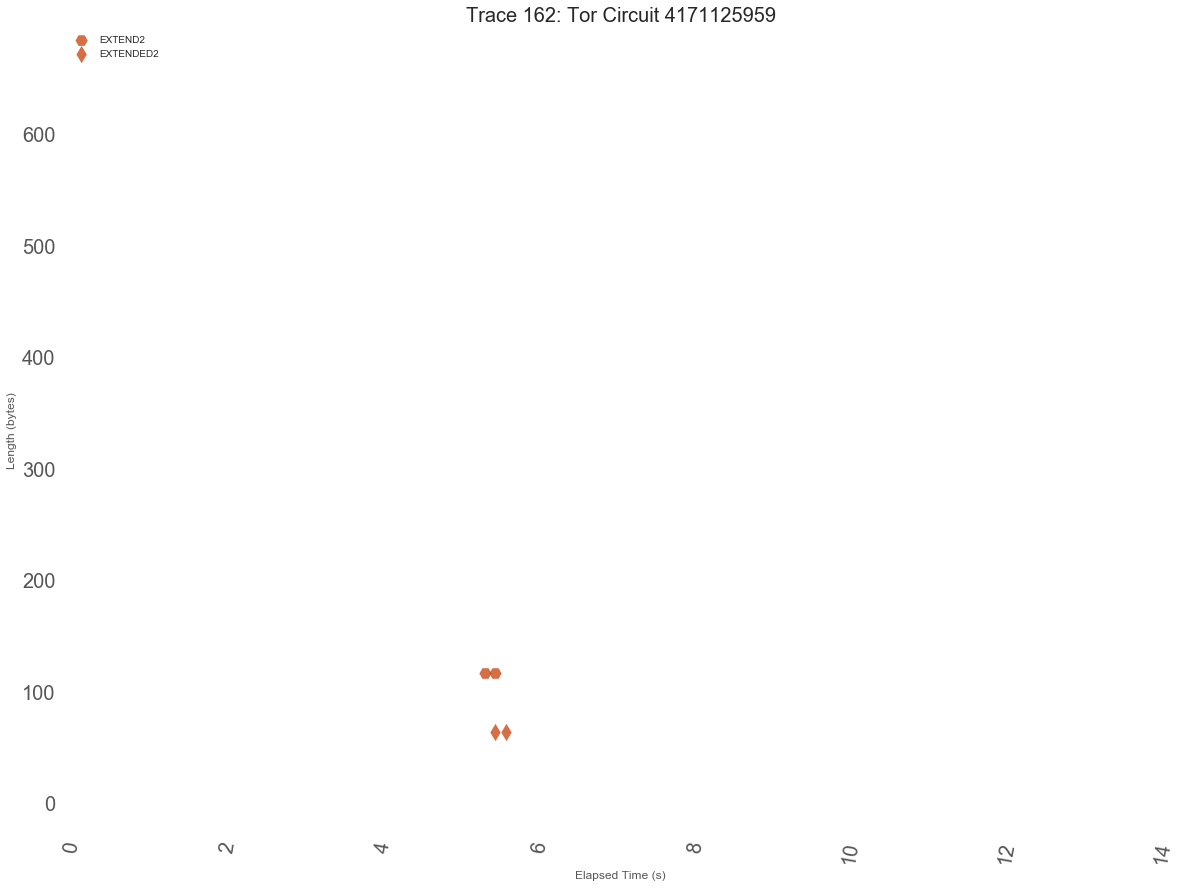

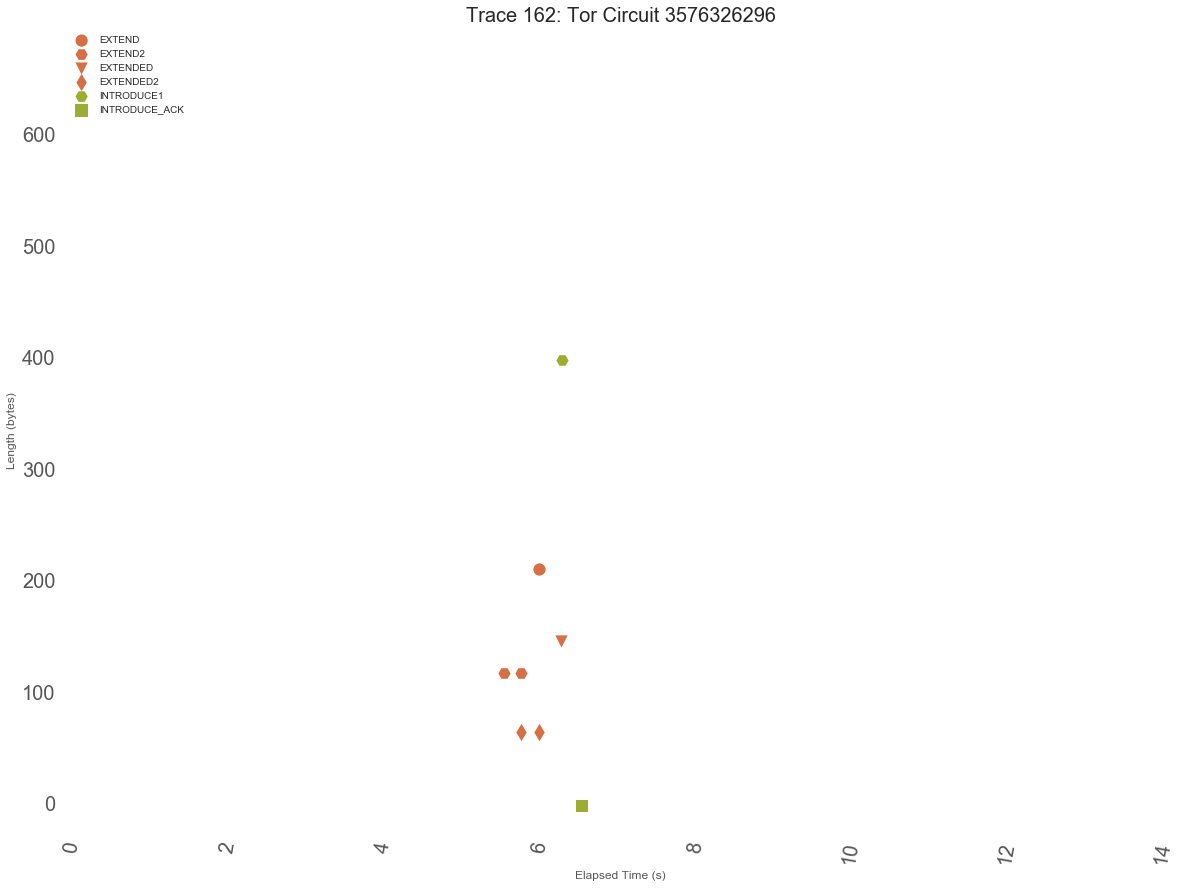

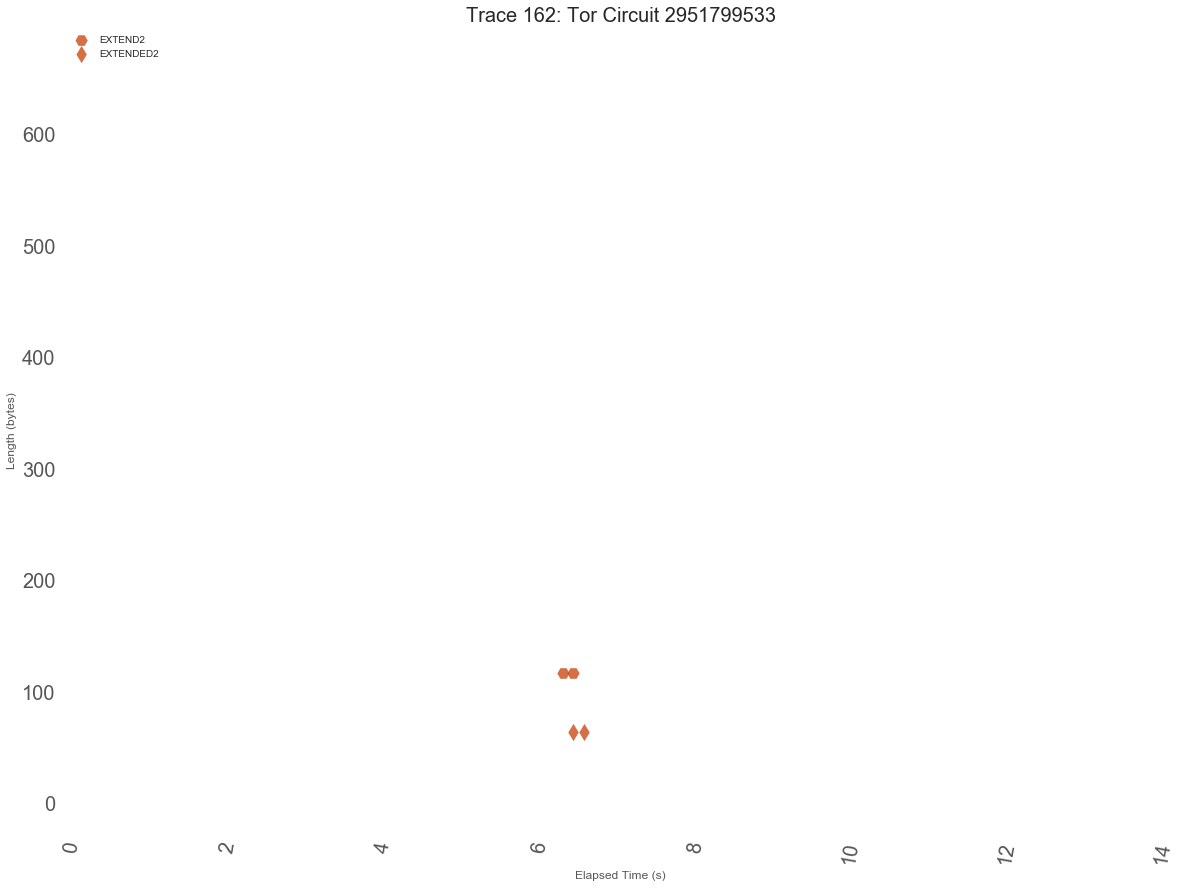

In [30]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '162-raw')), '162')

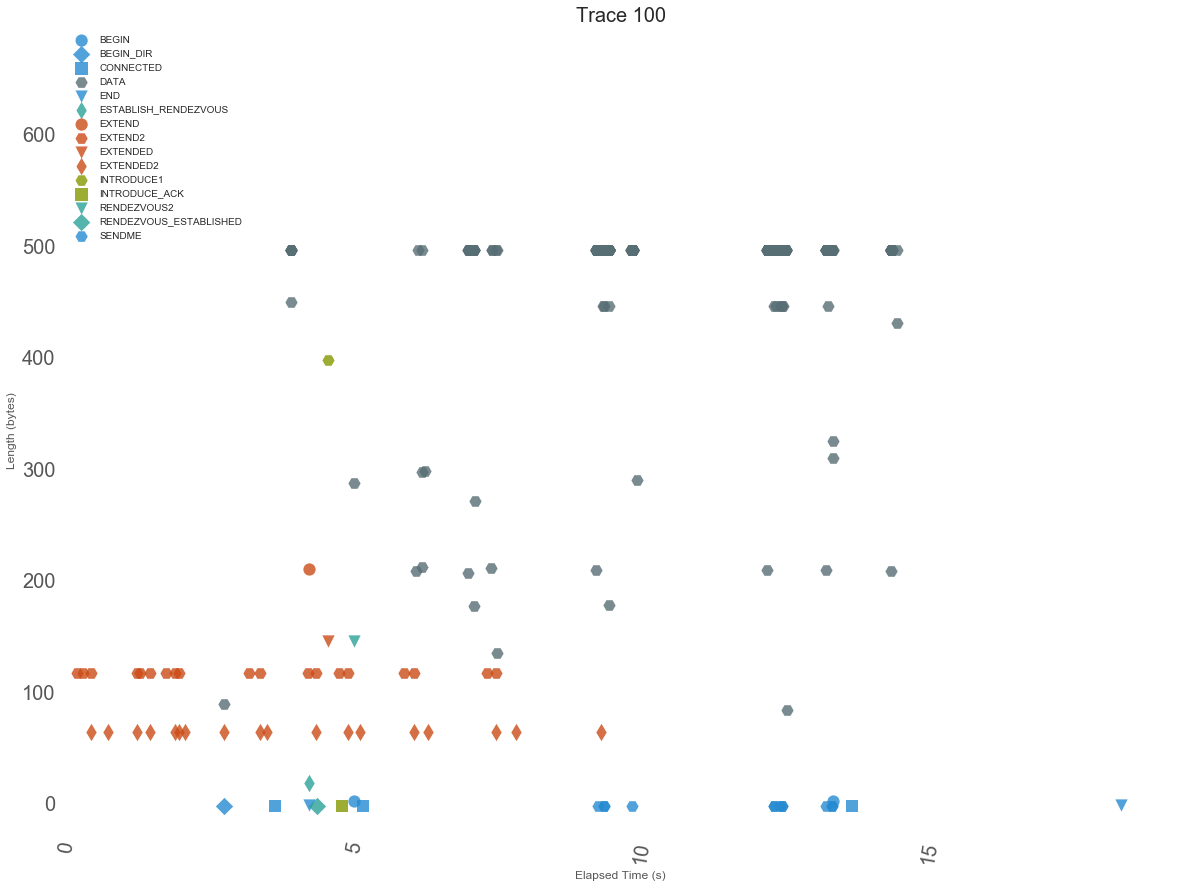

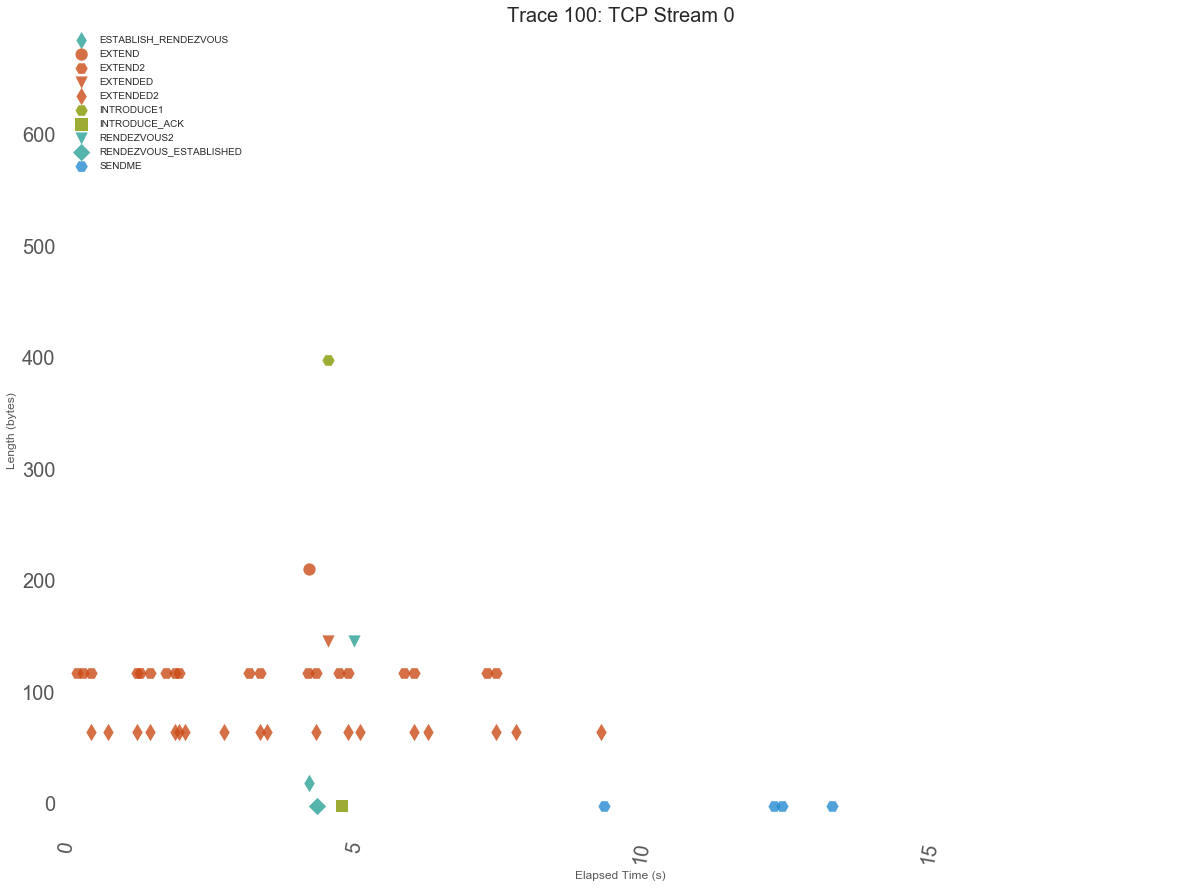

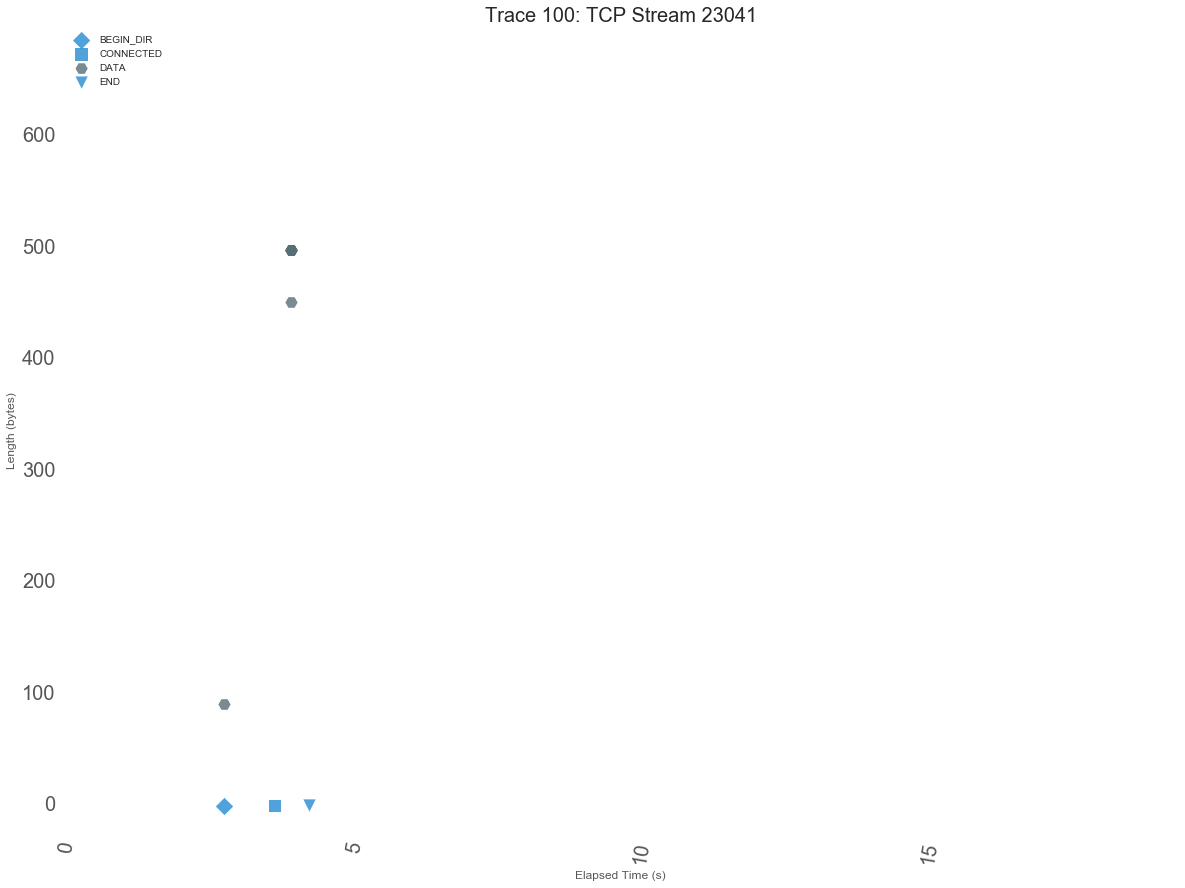

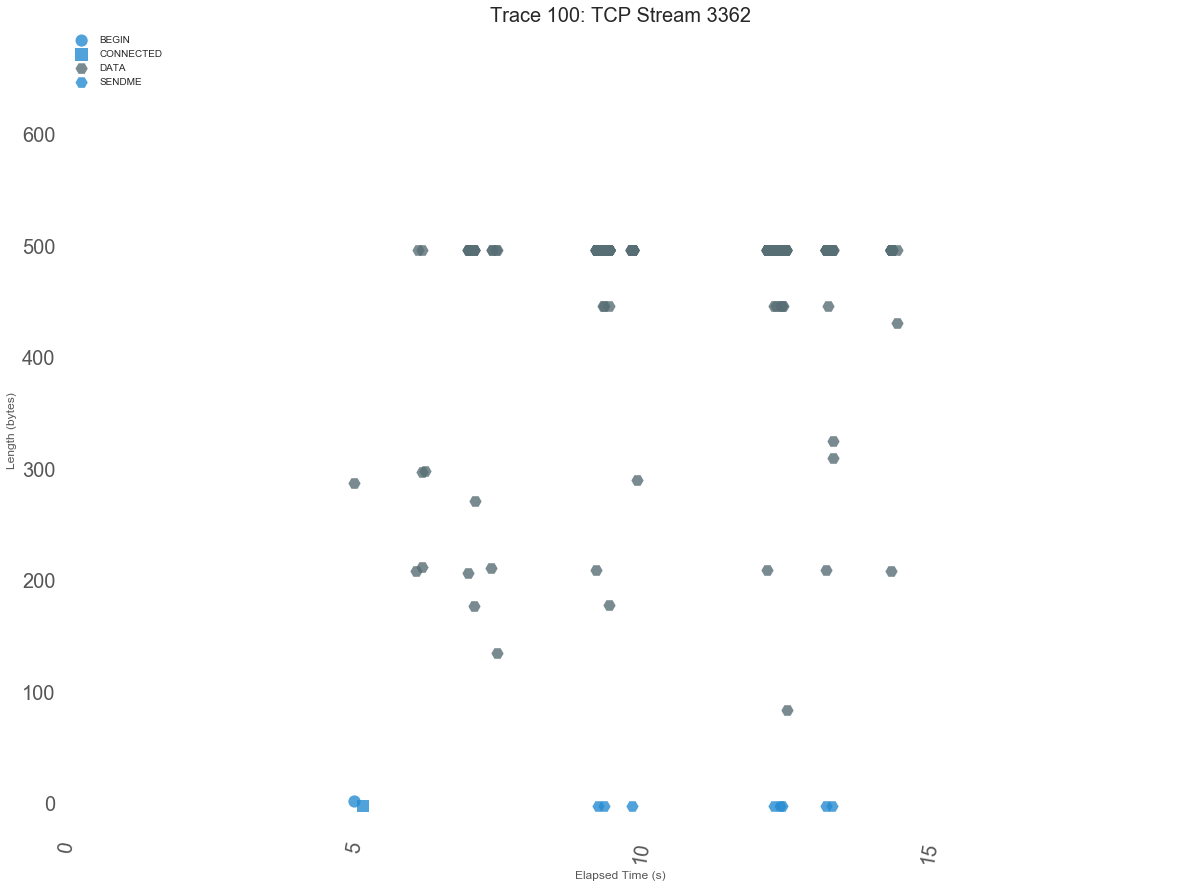

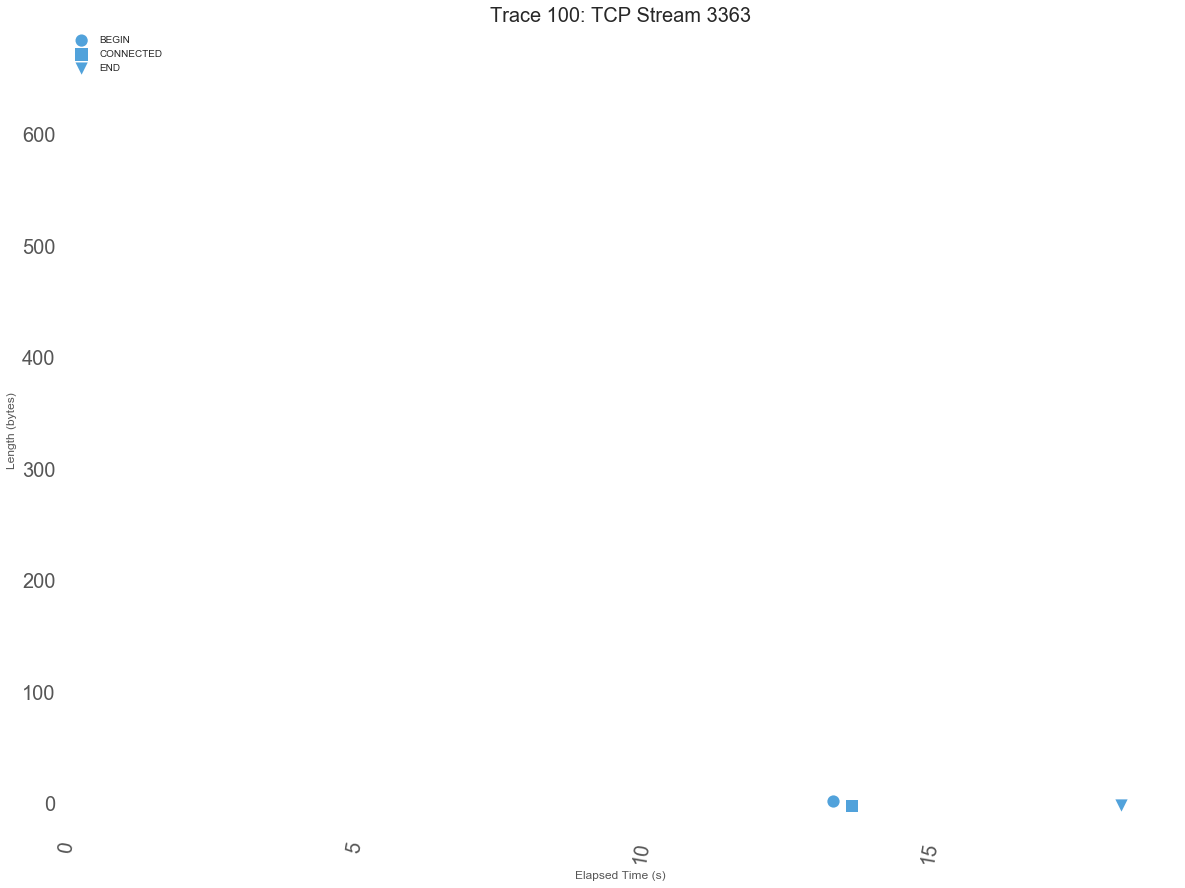

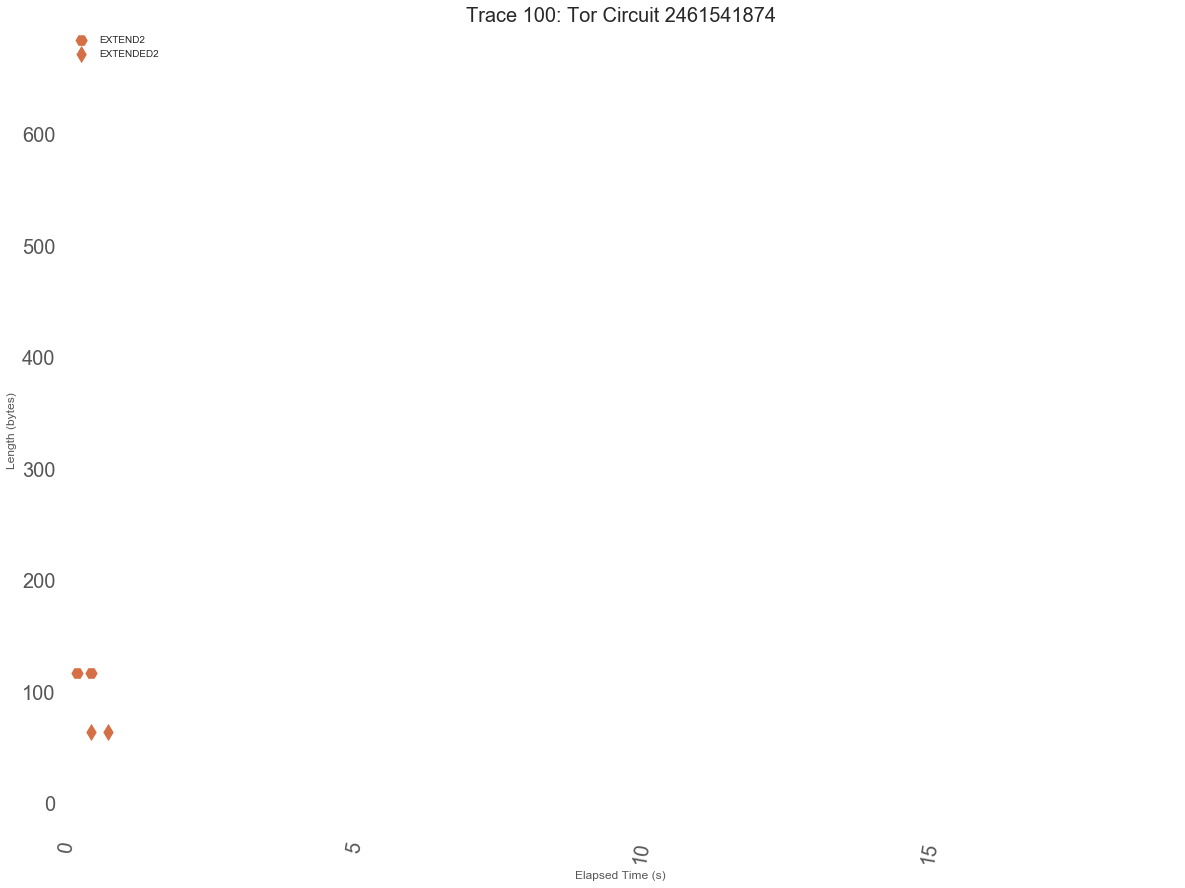

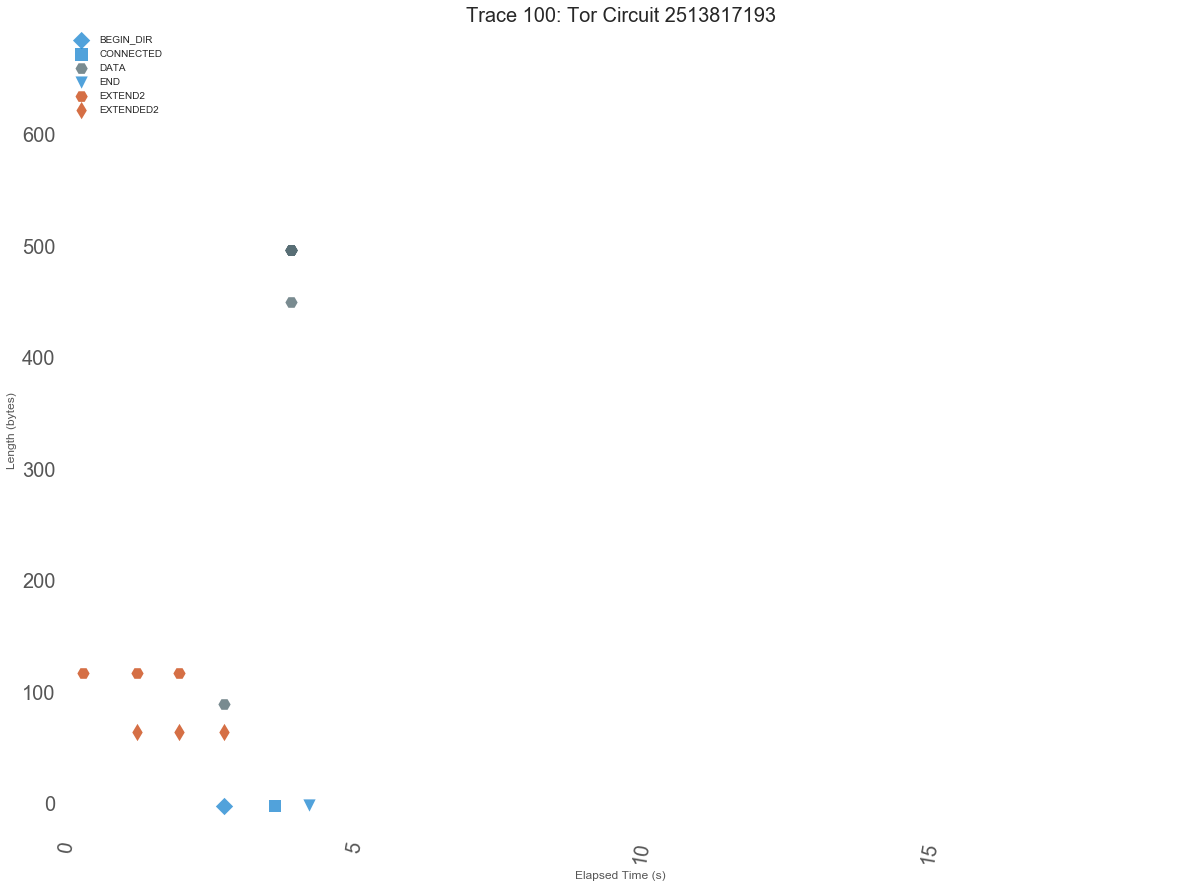

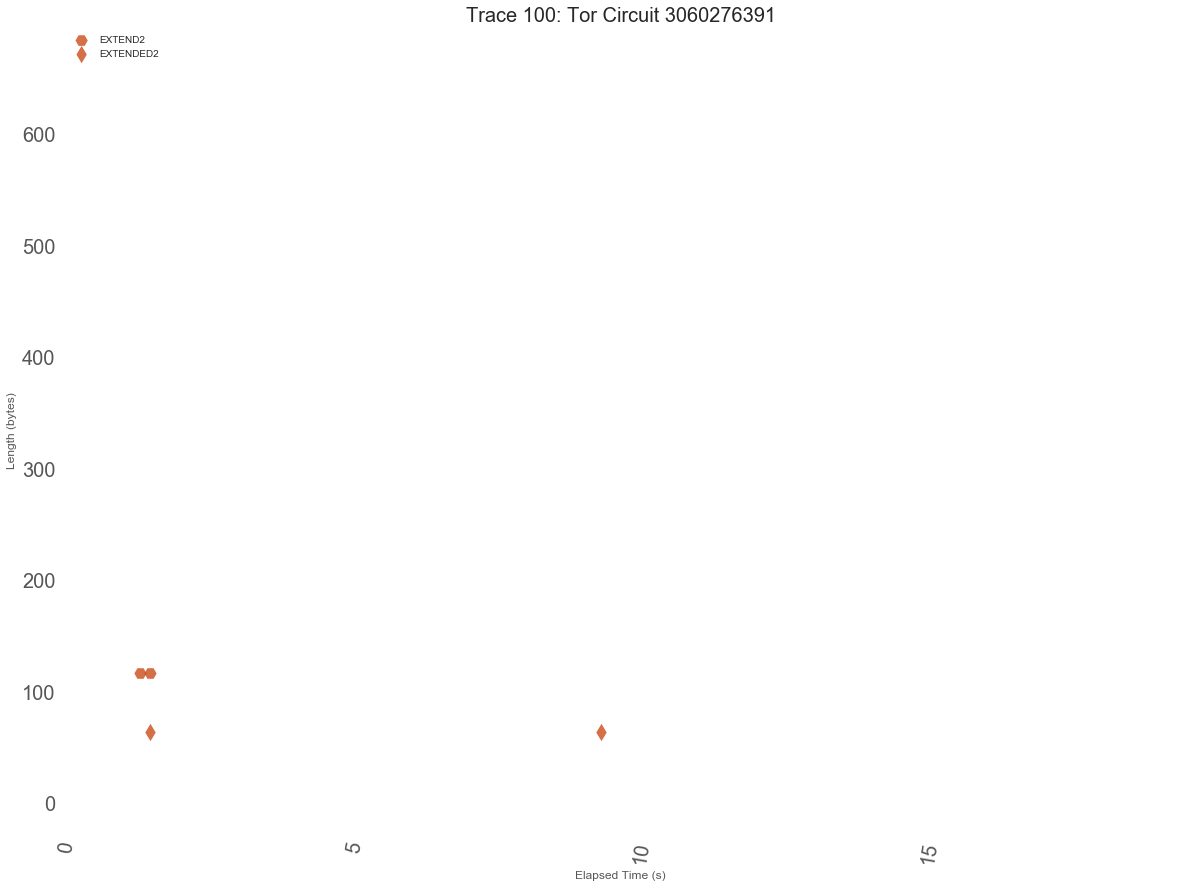

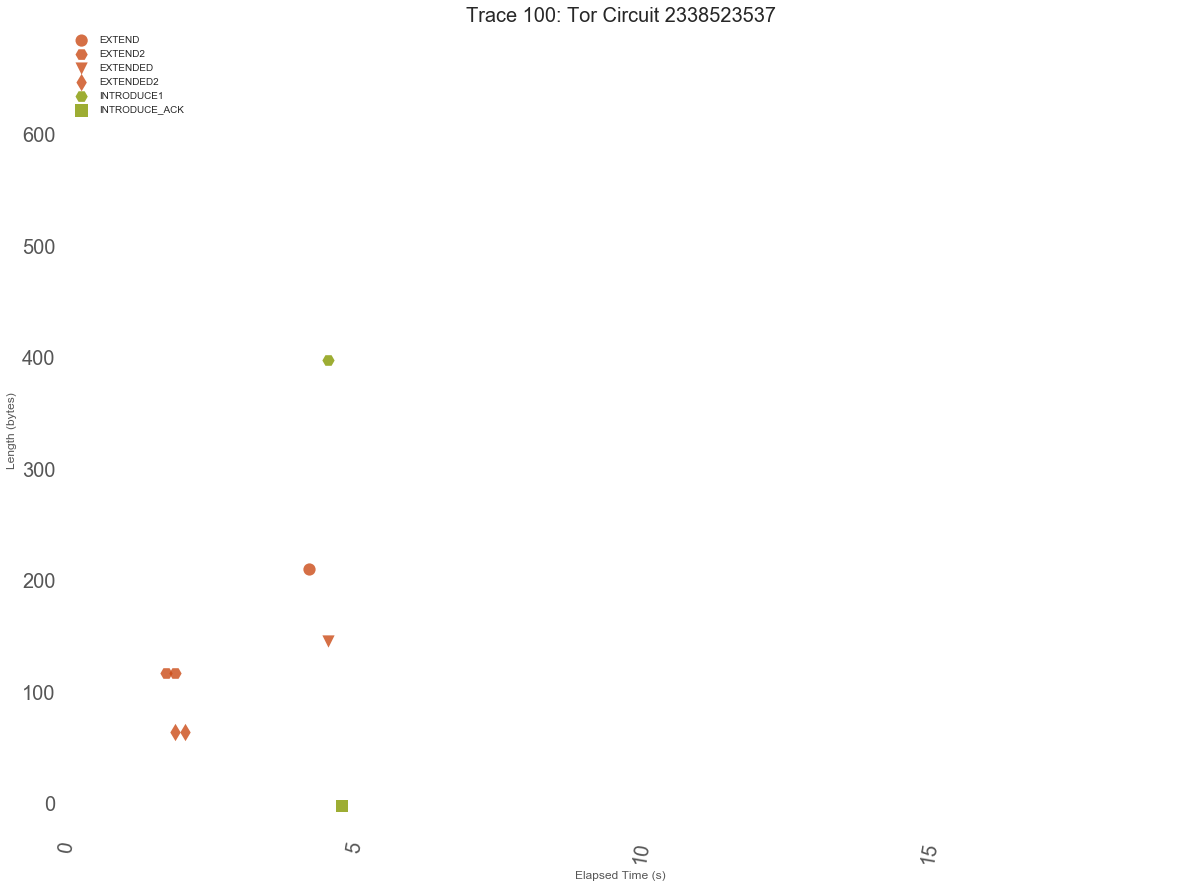

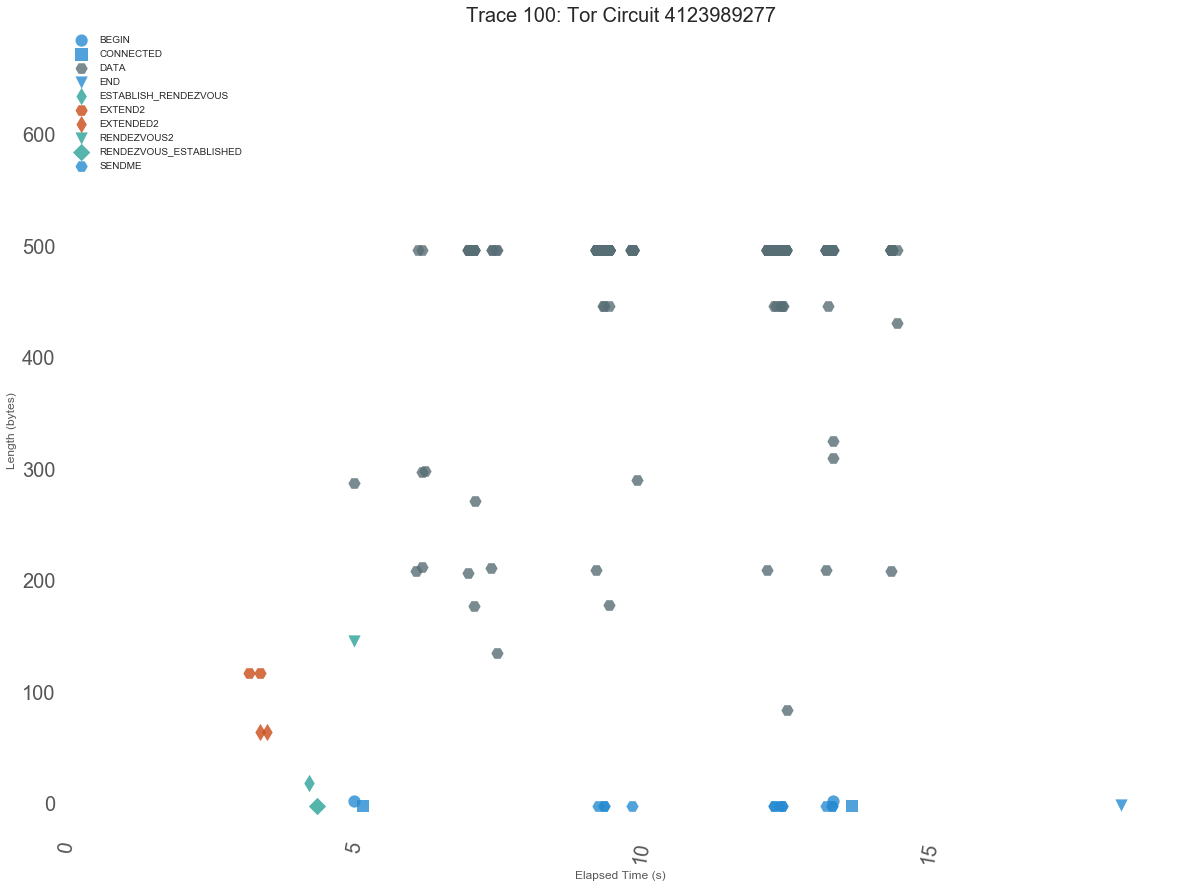

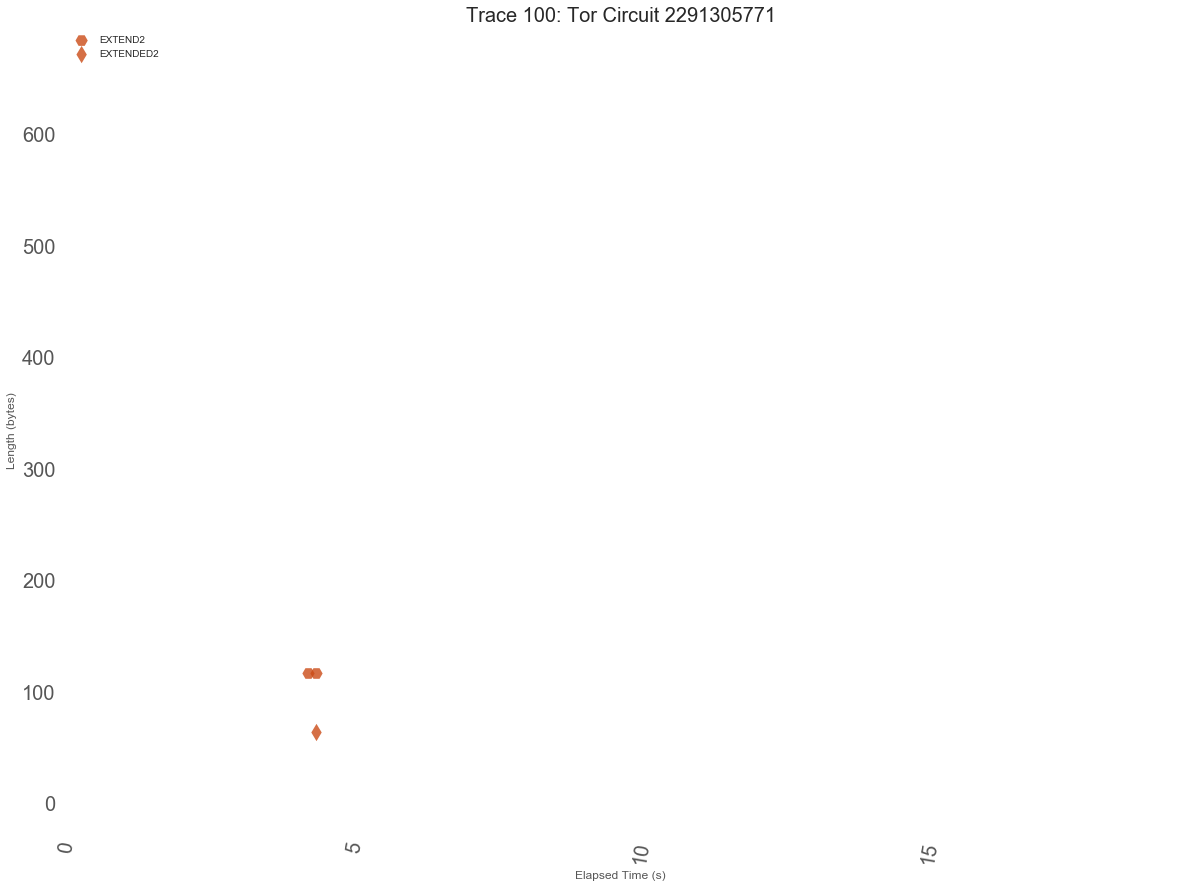

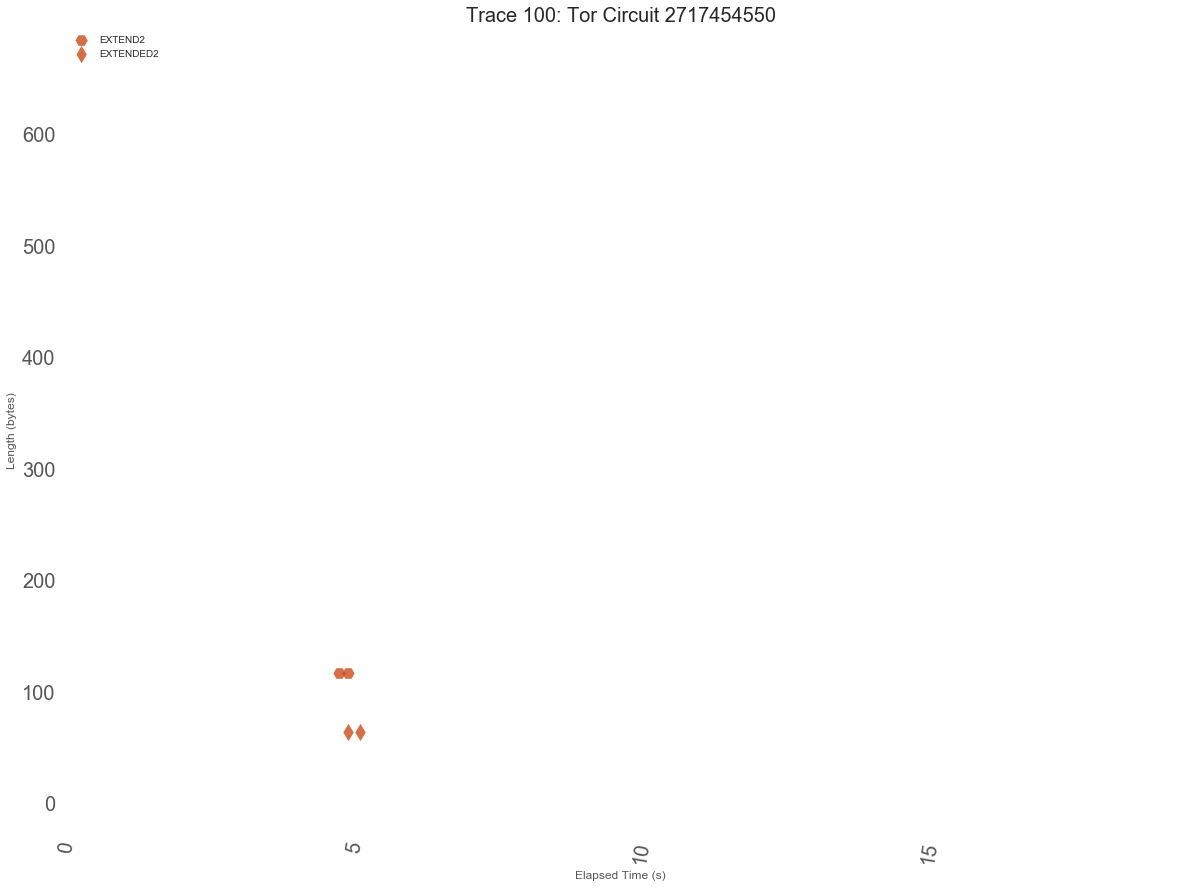

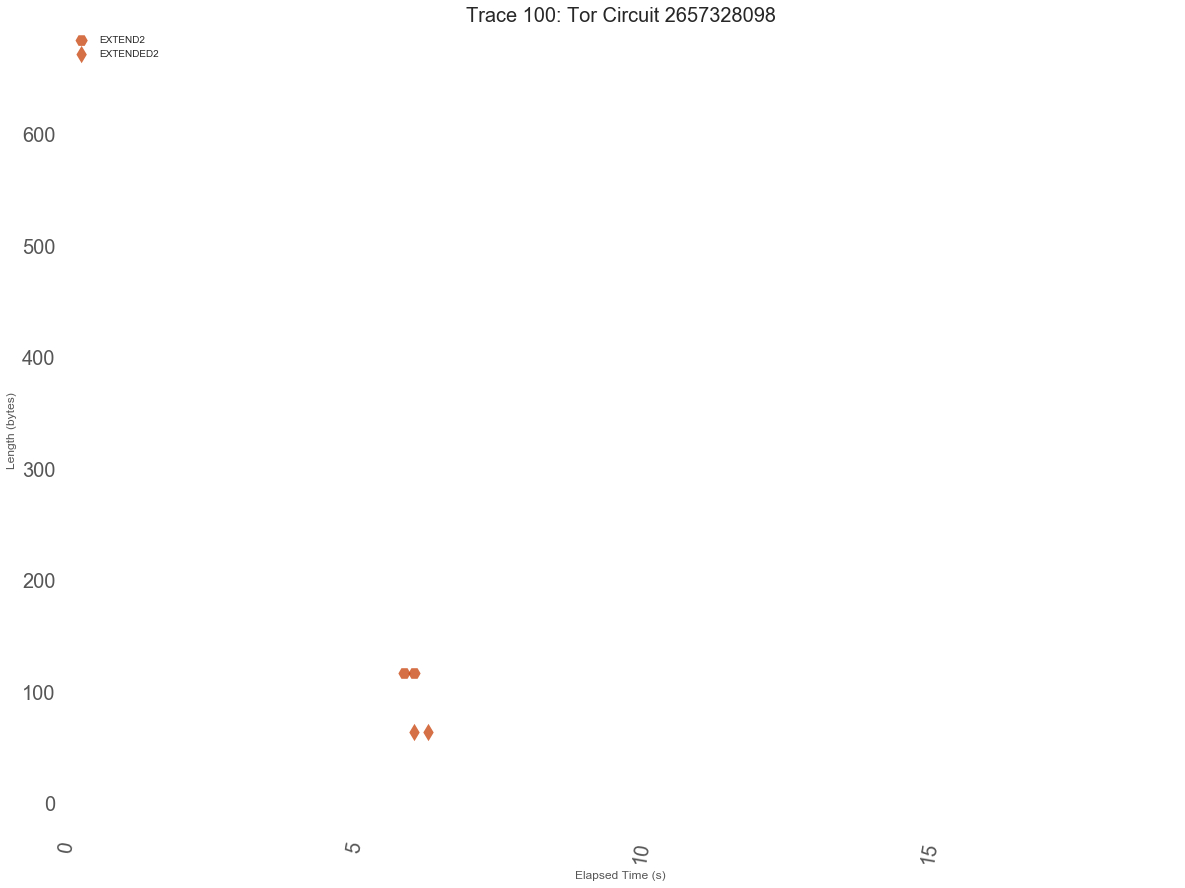

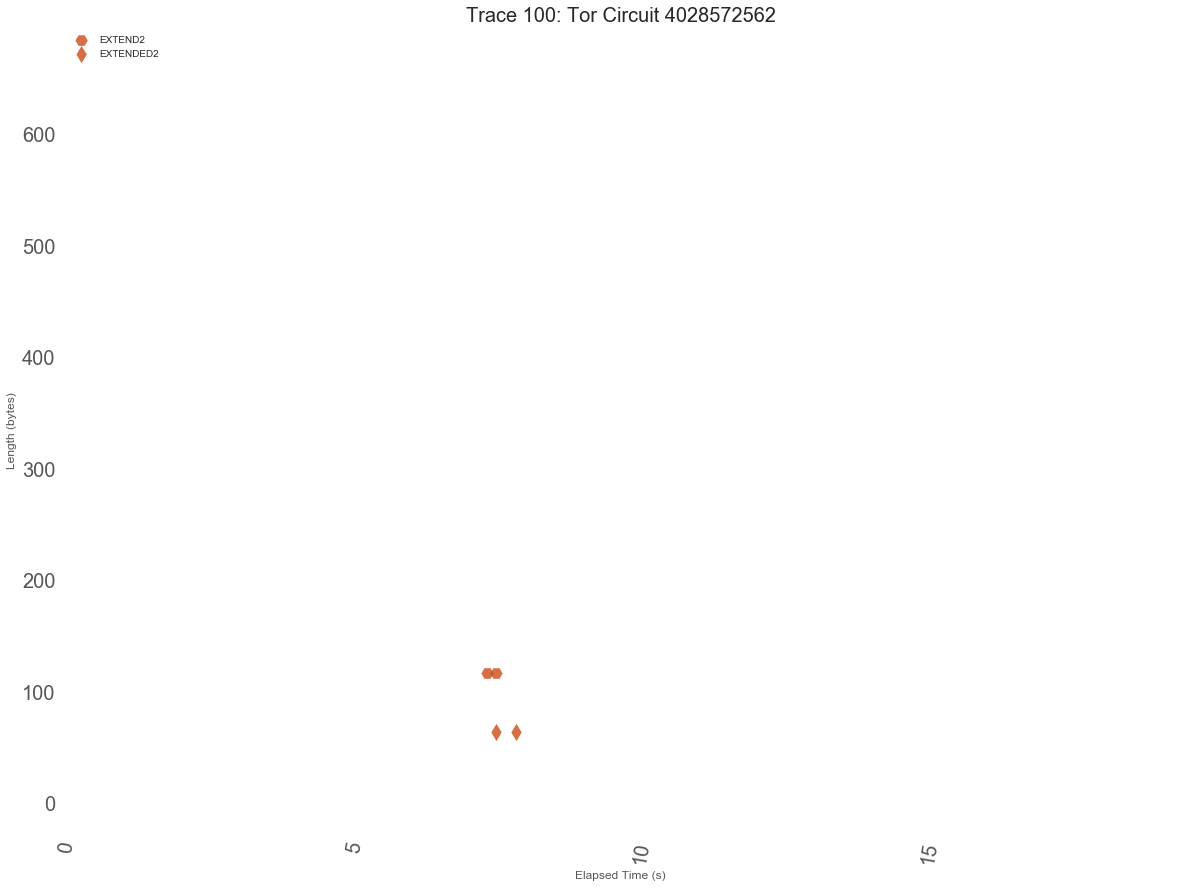

In [31]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '100-raw')), '100')

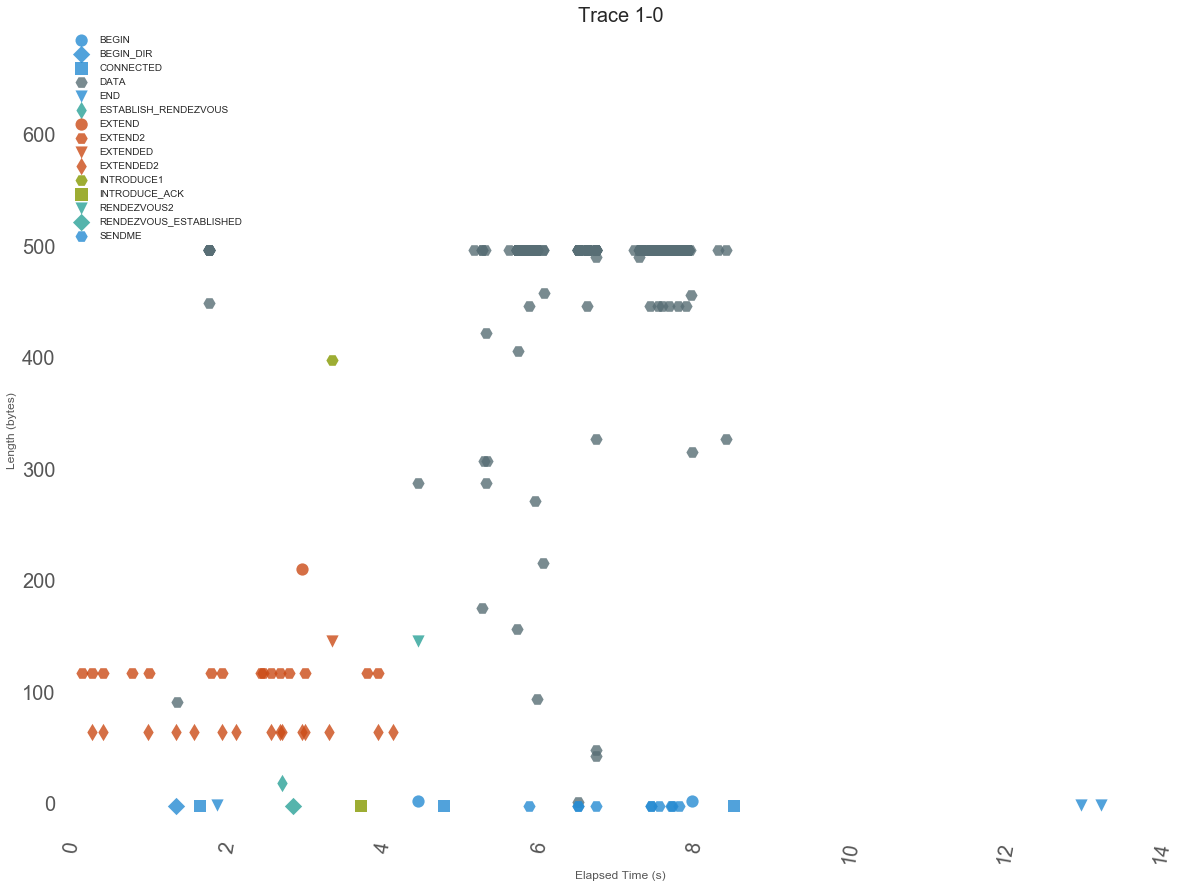

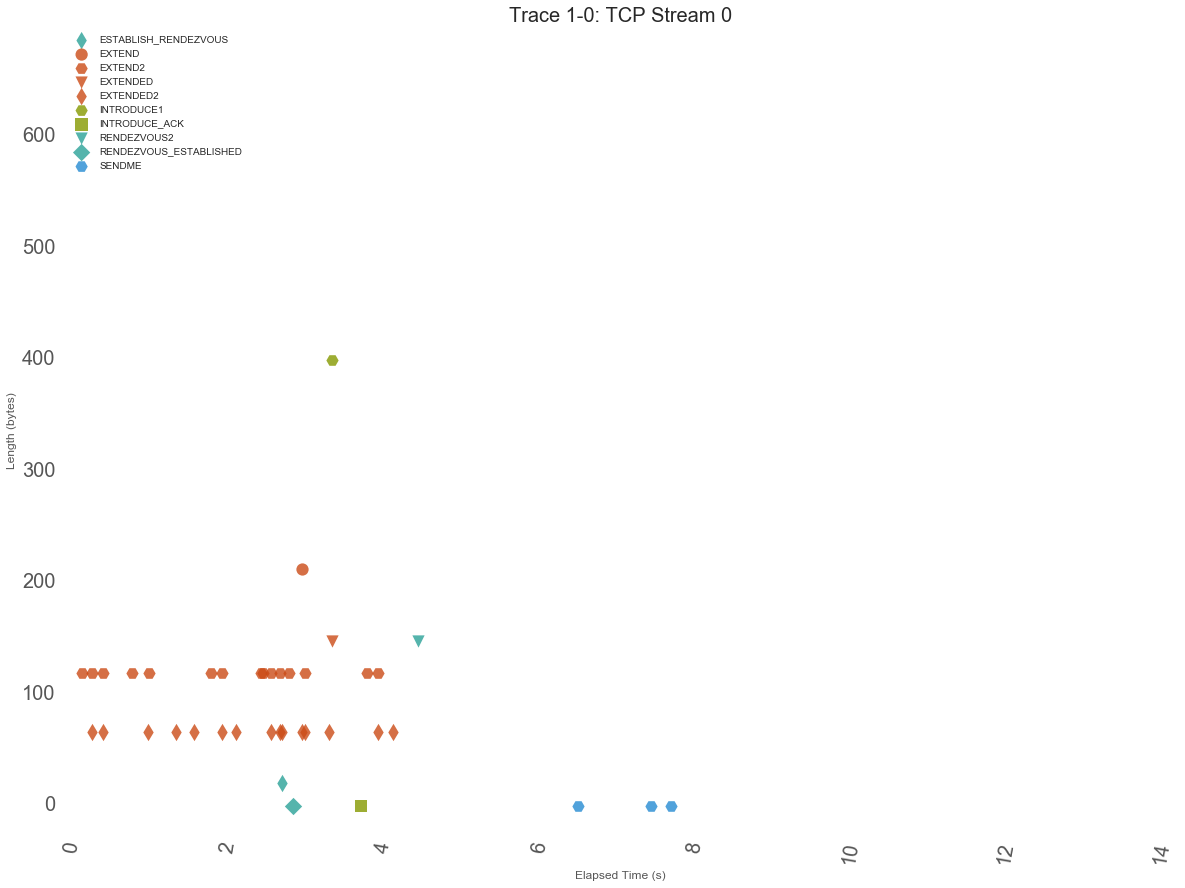

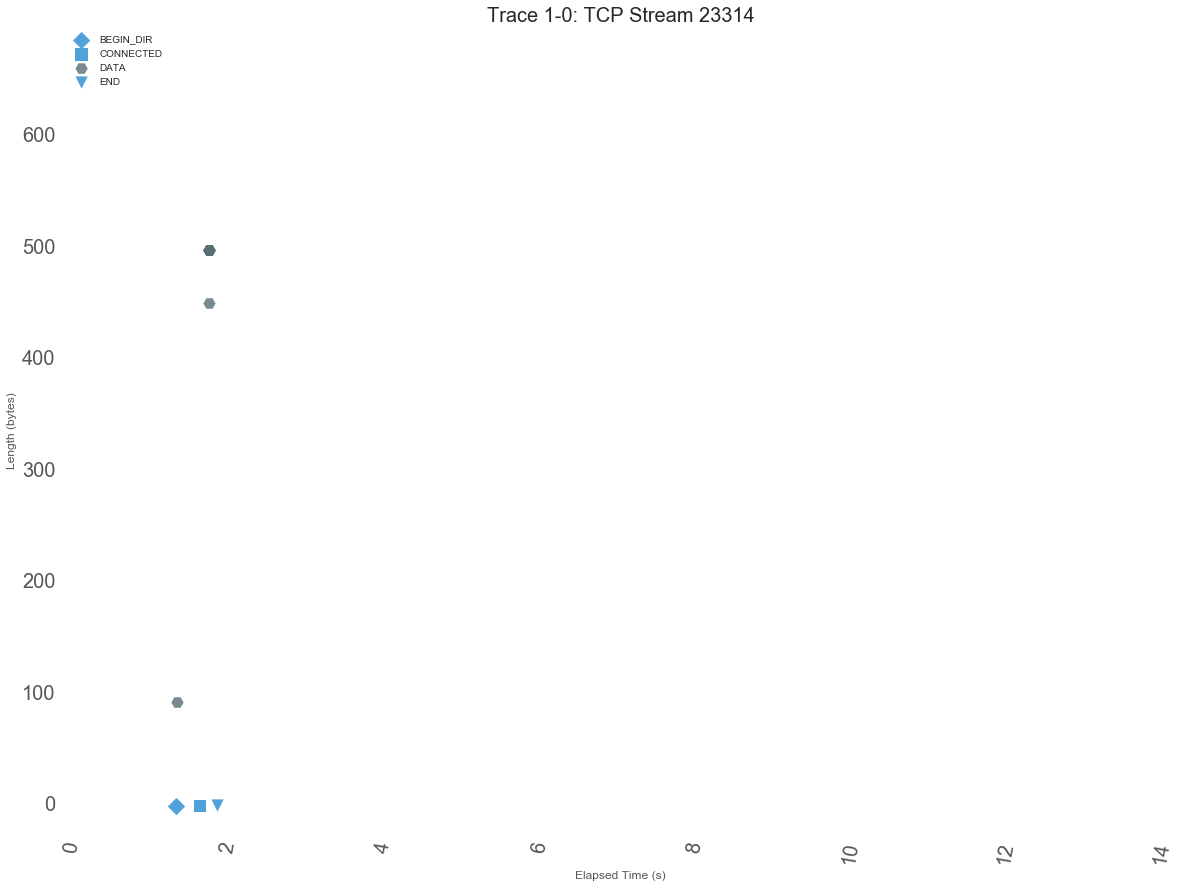

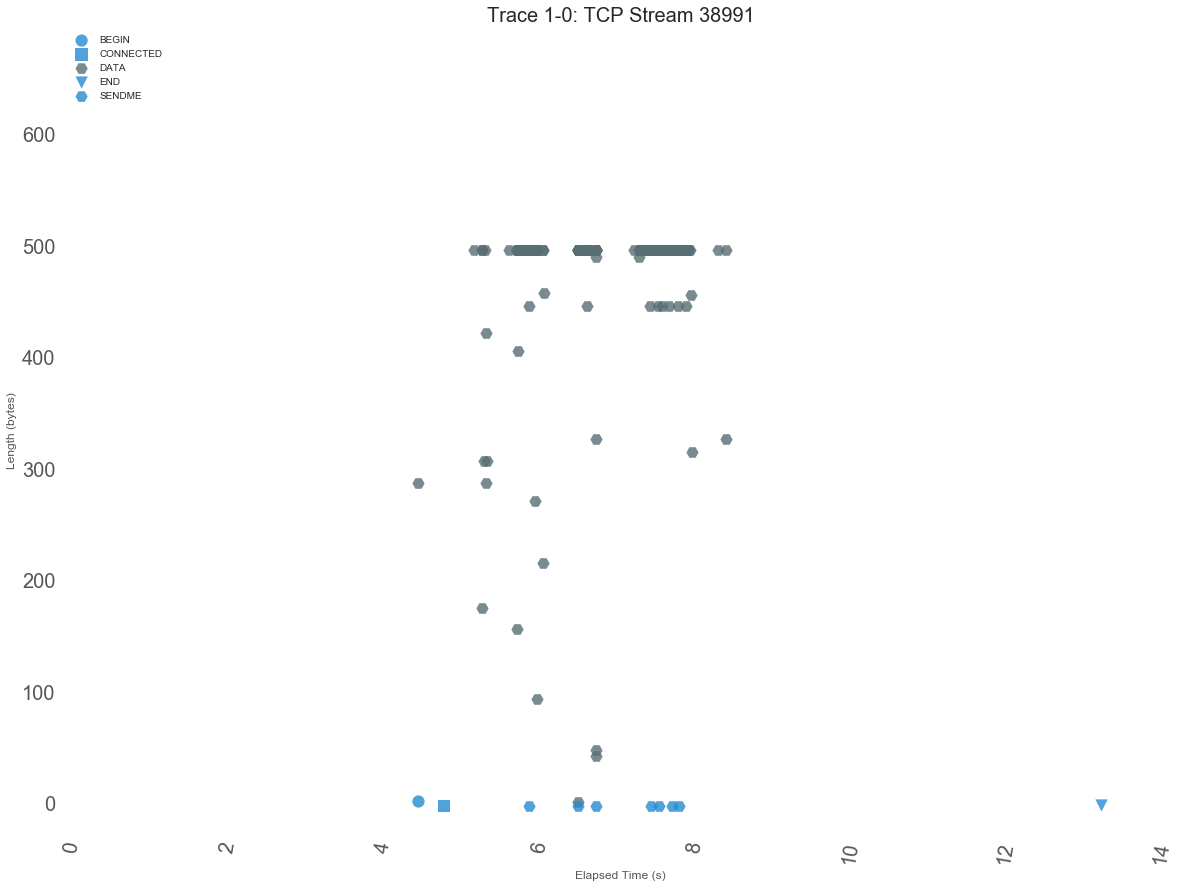

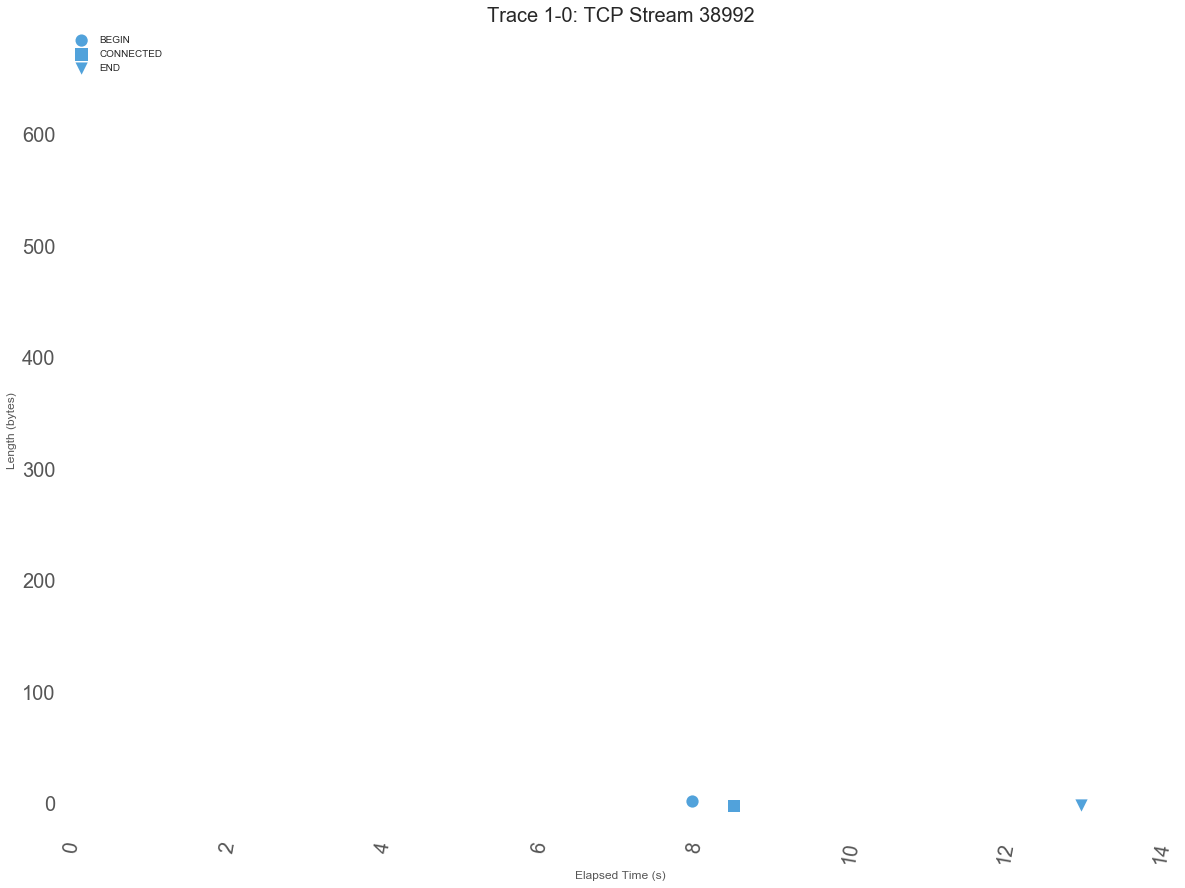

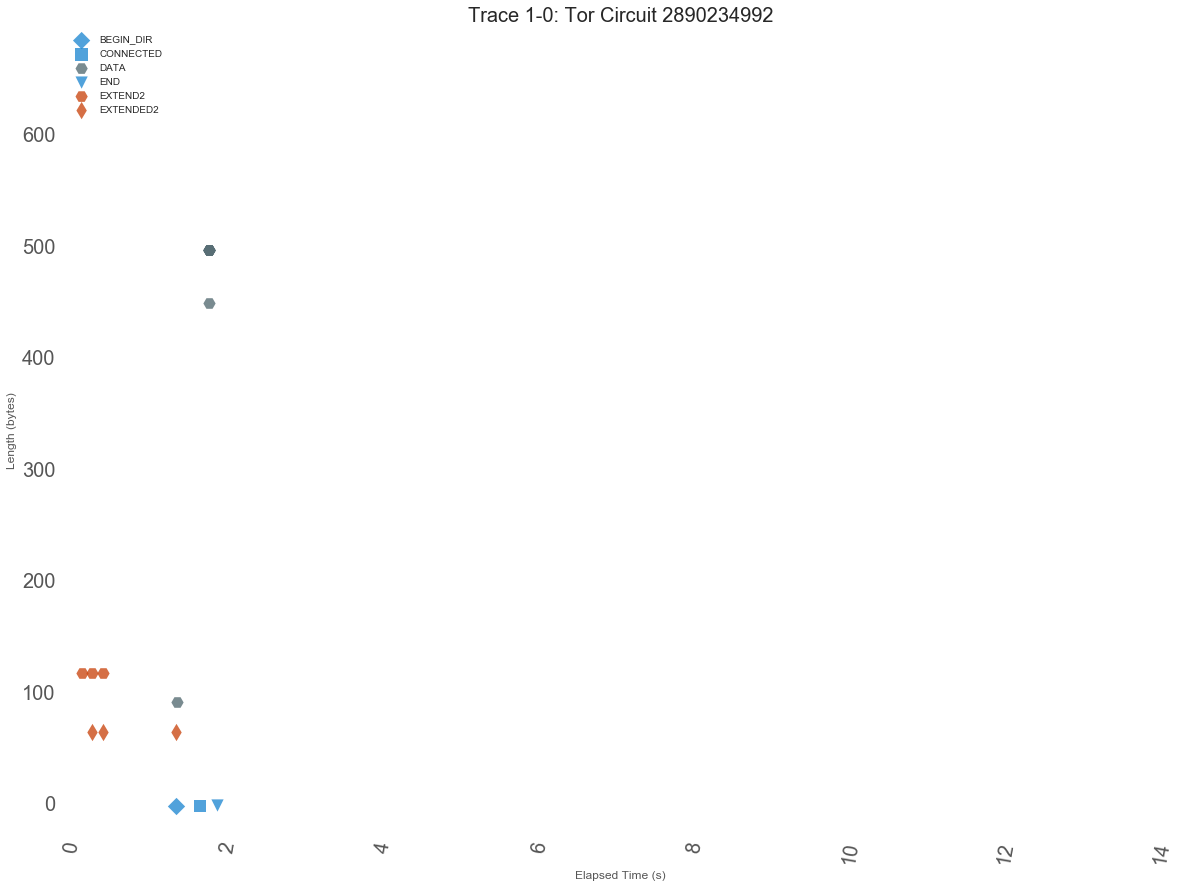

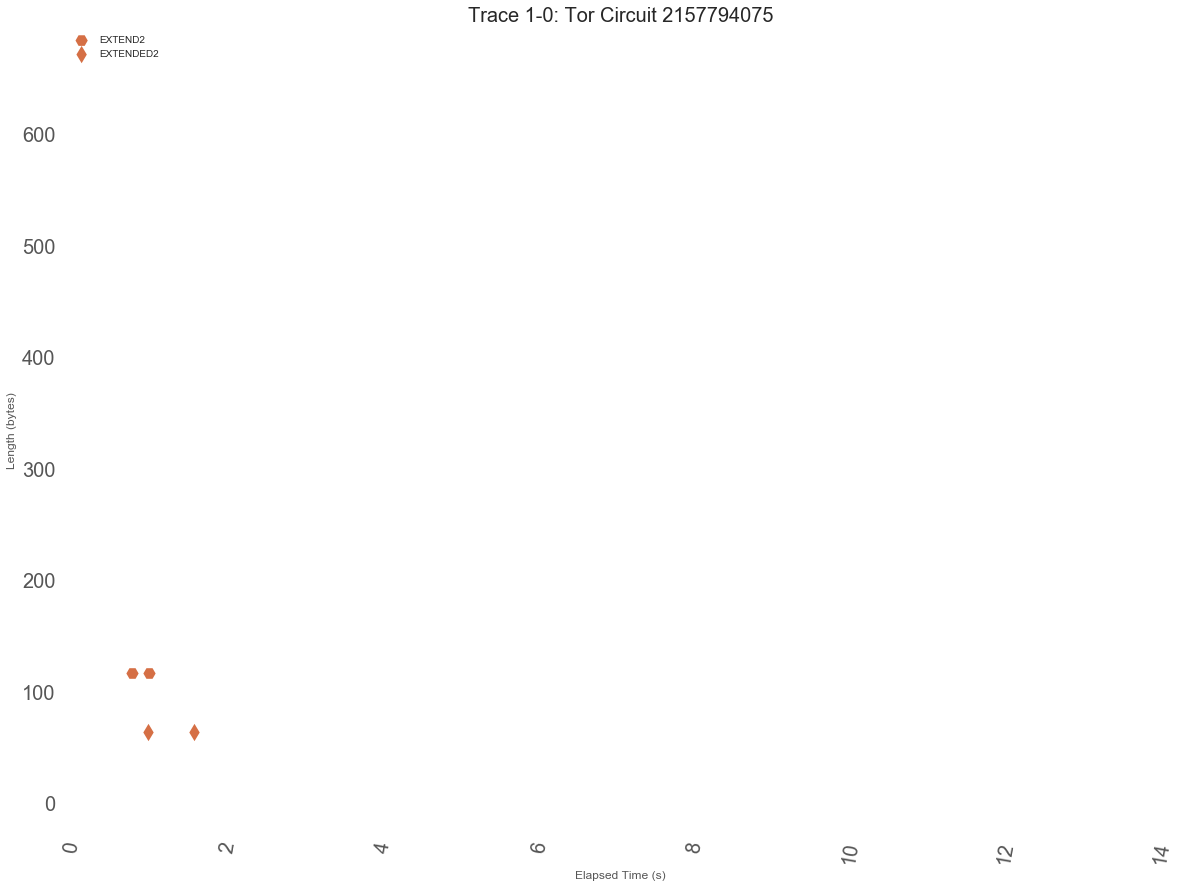

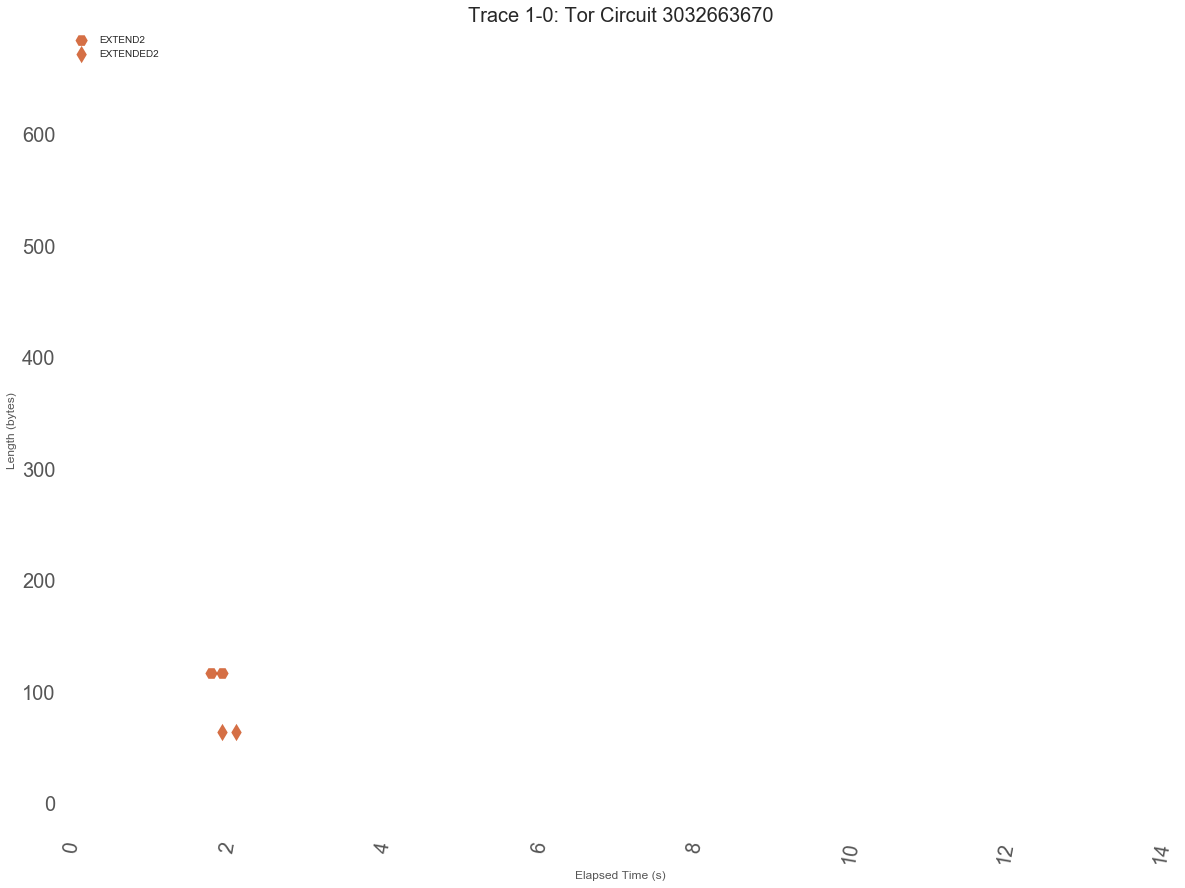

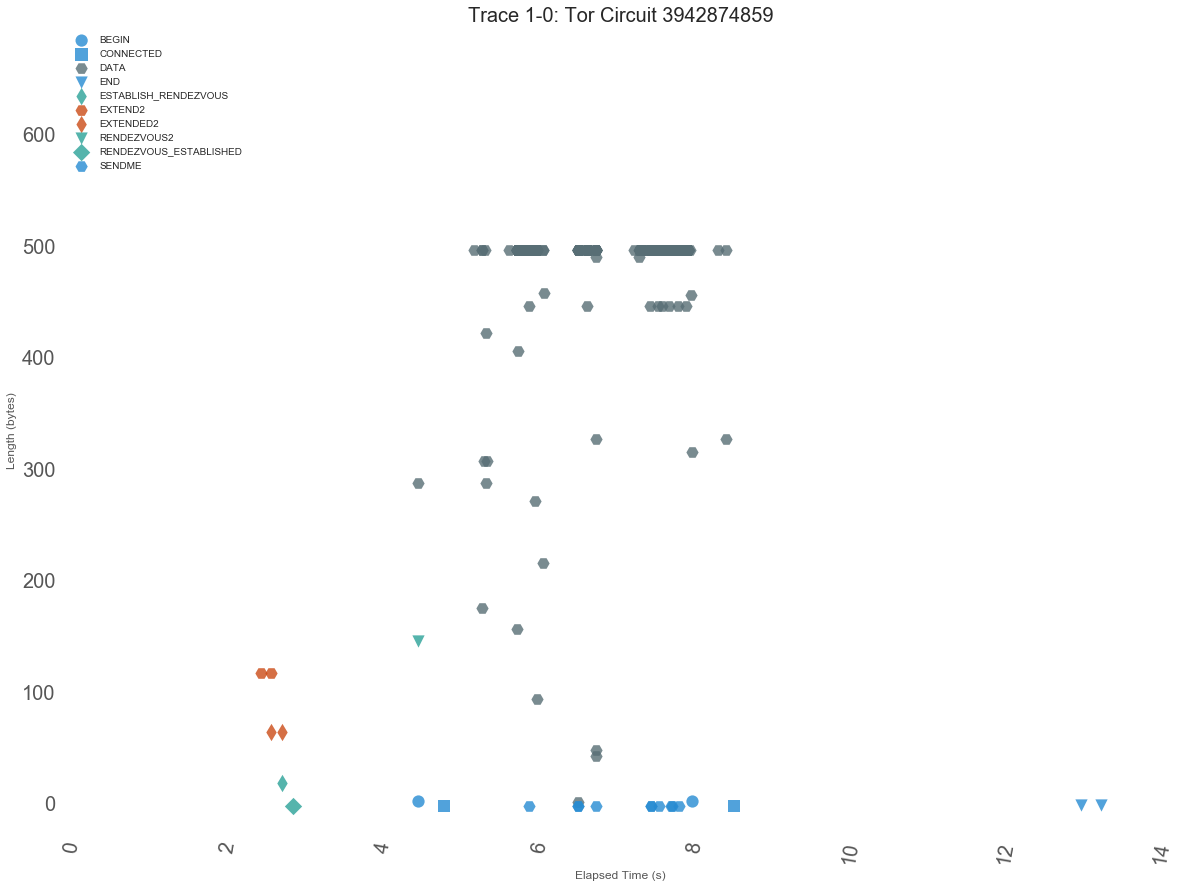

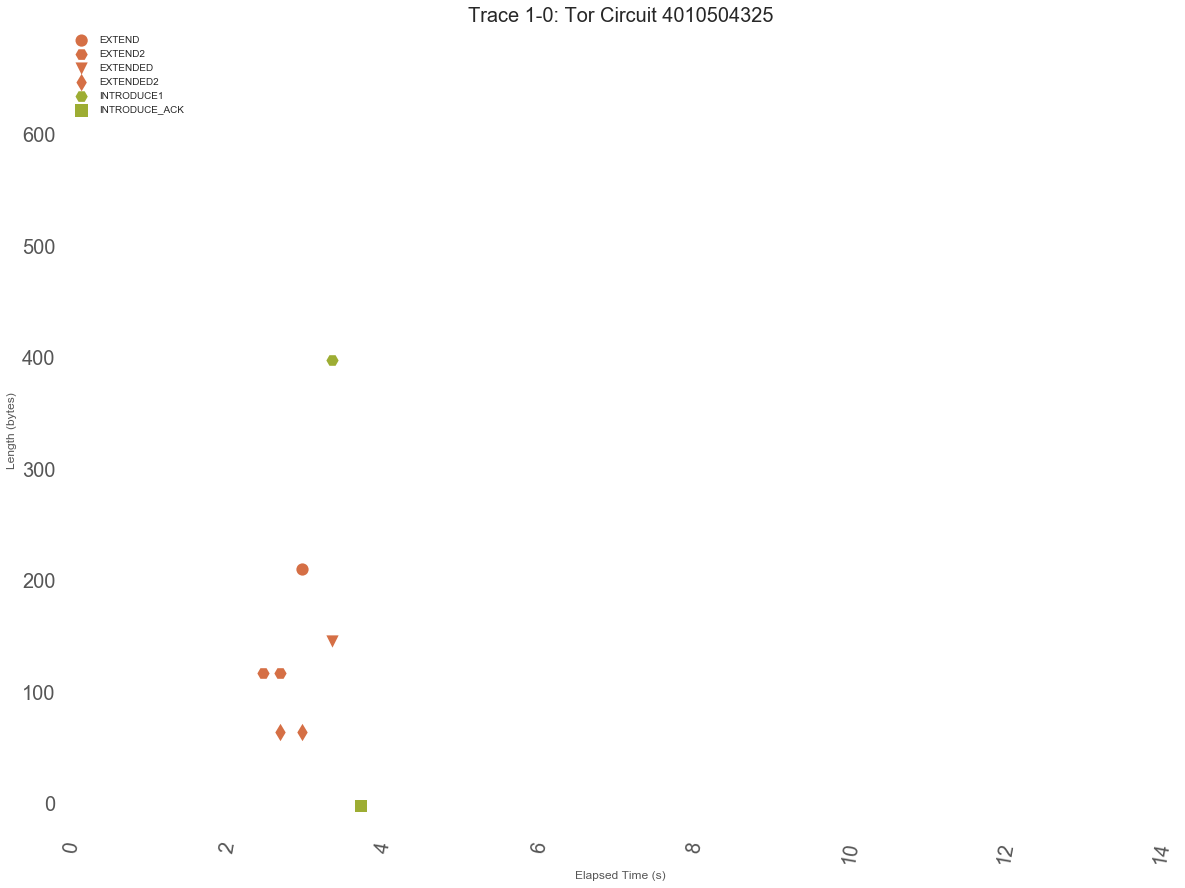

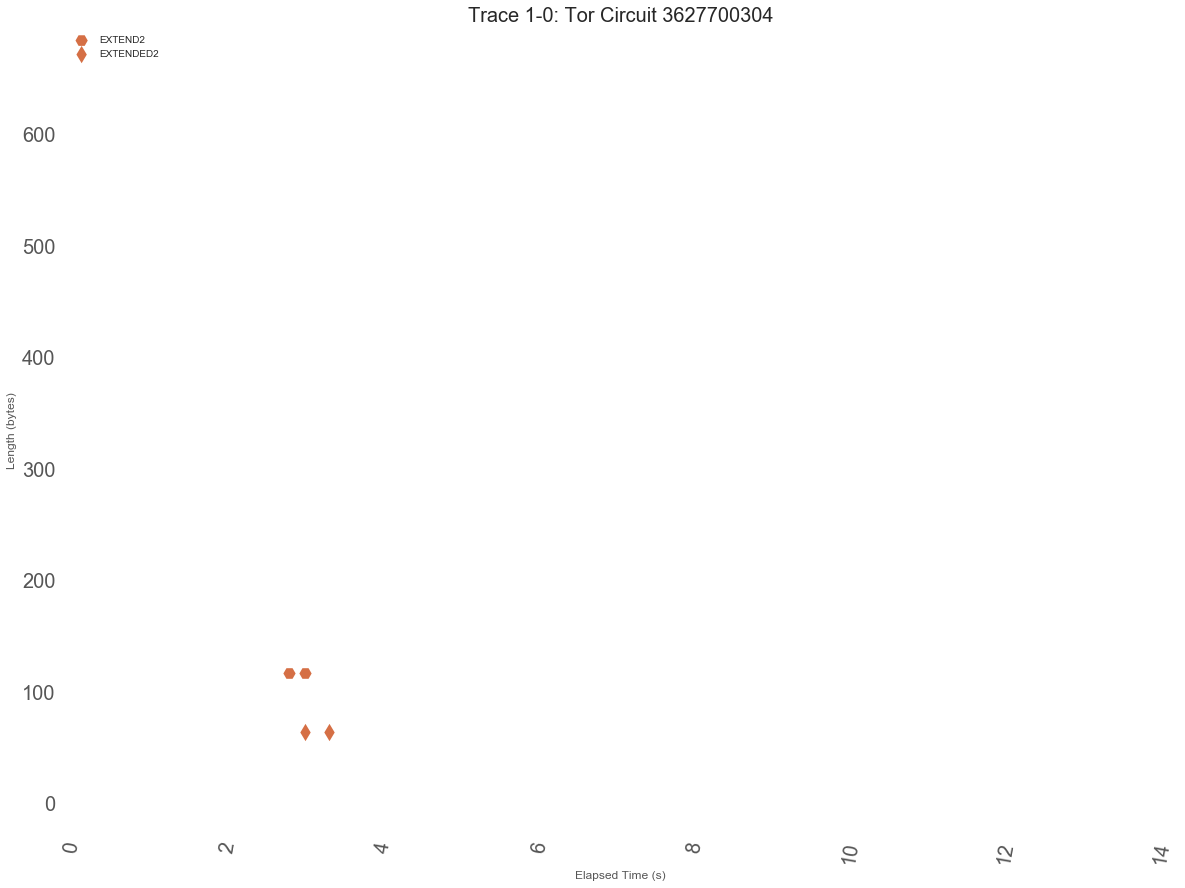

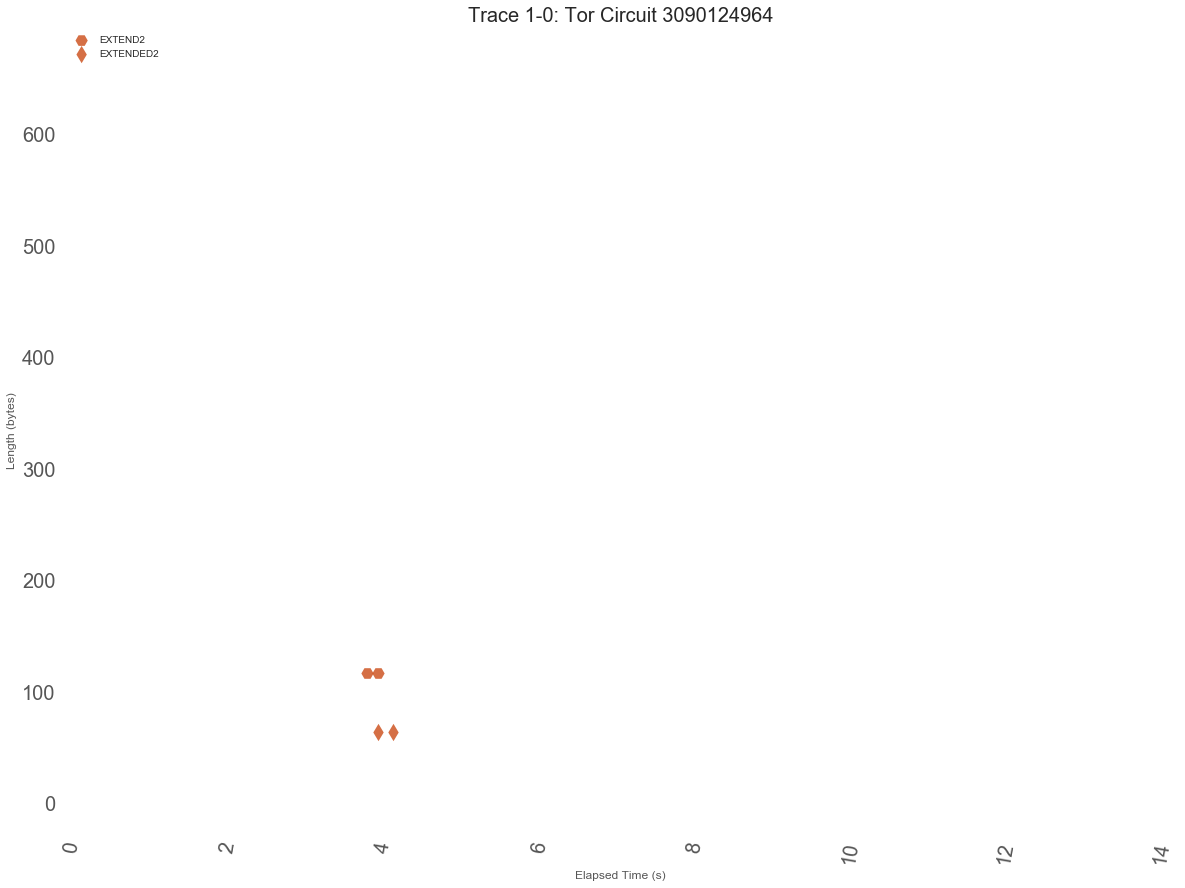

In [32]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '1-0-raw')), '1-0')

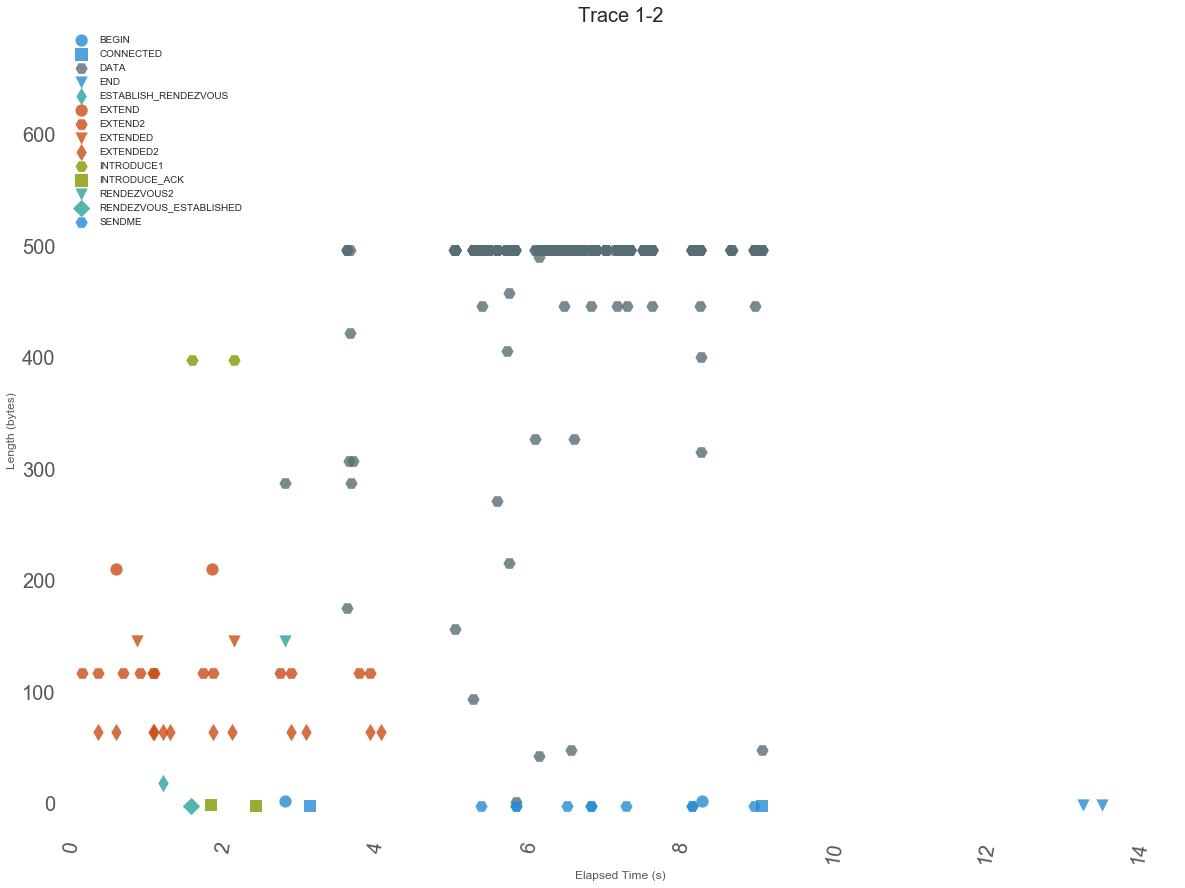

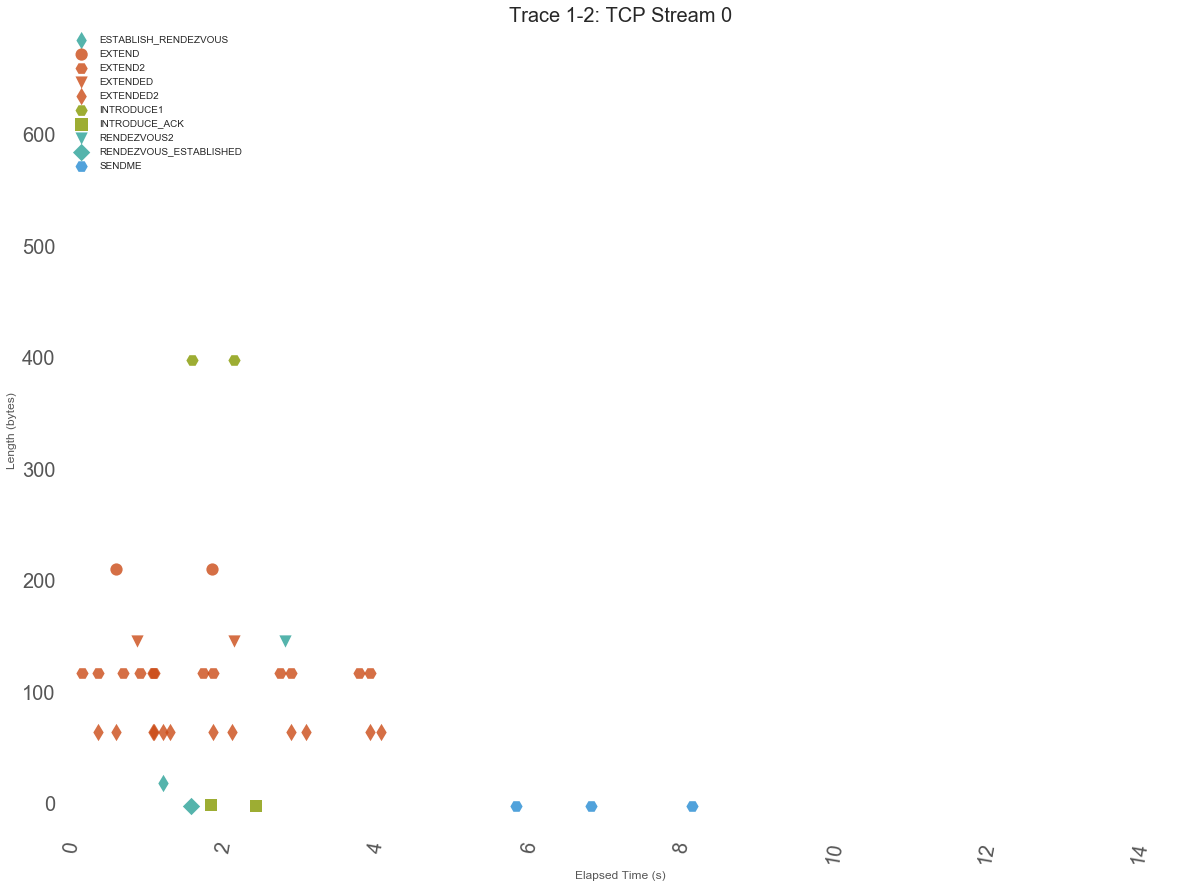

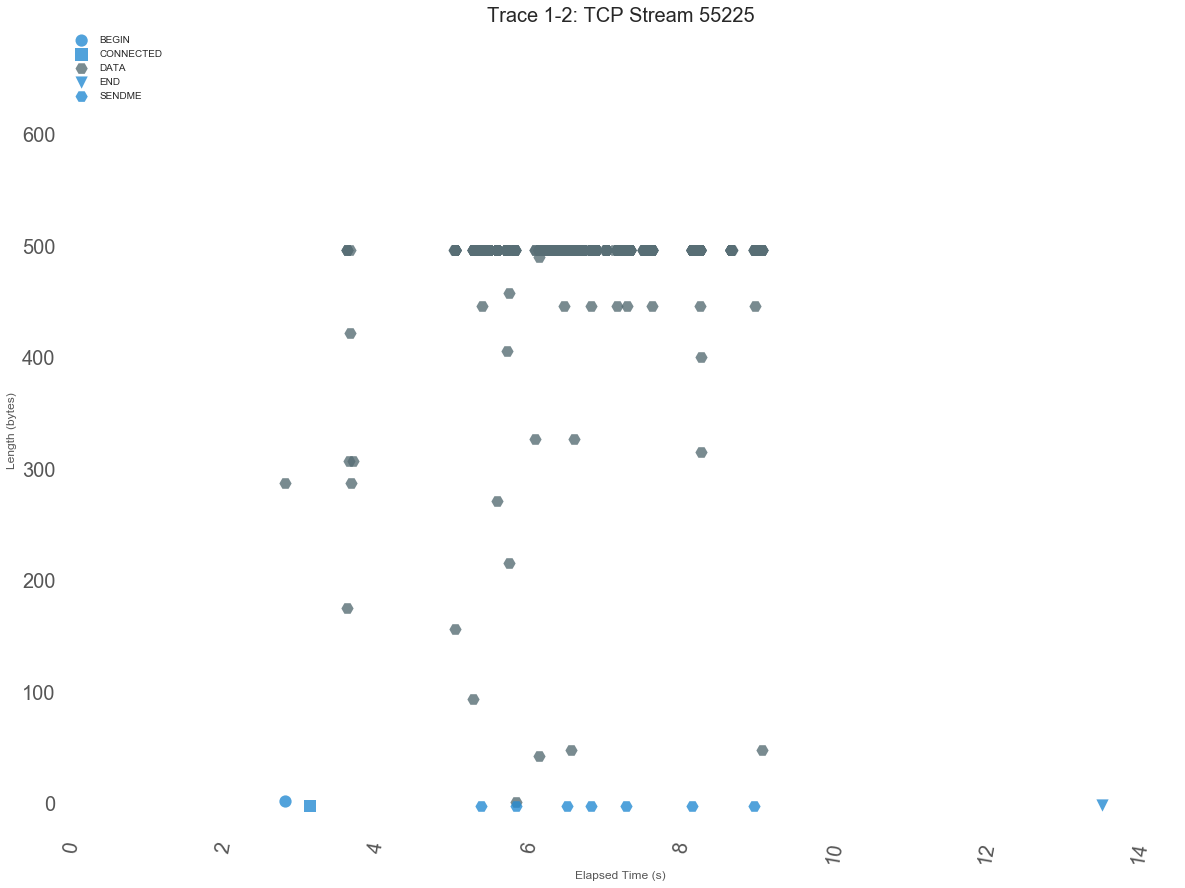

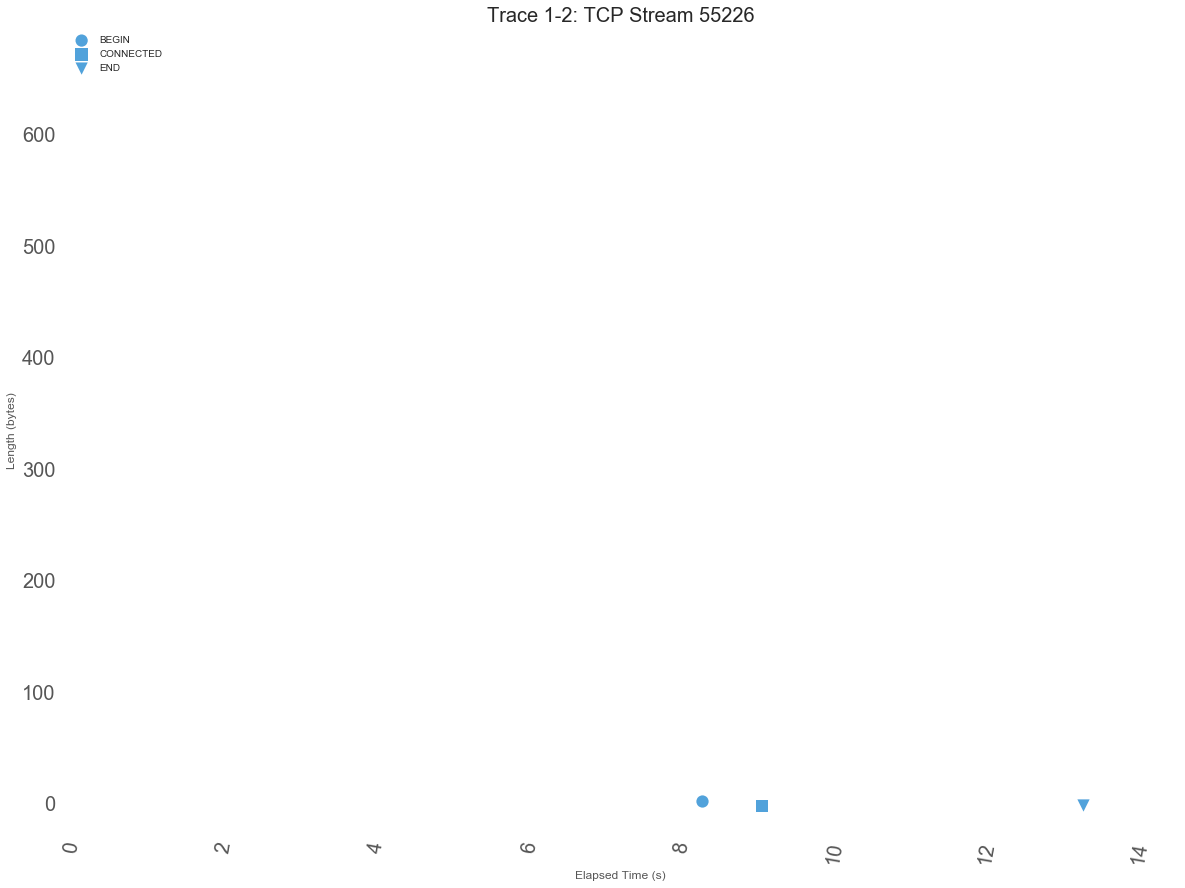

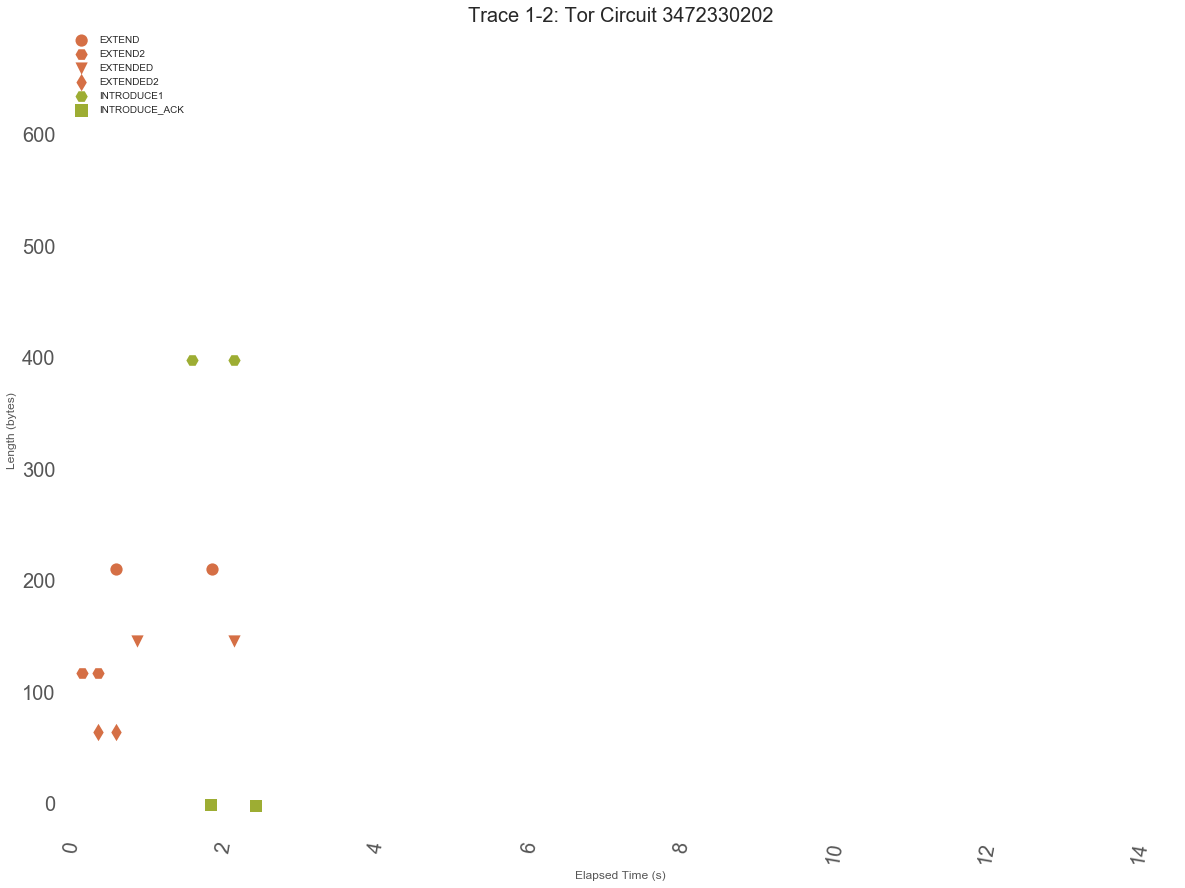

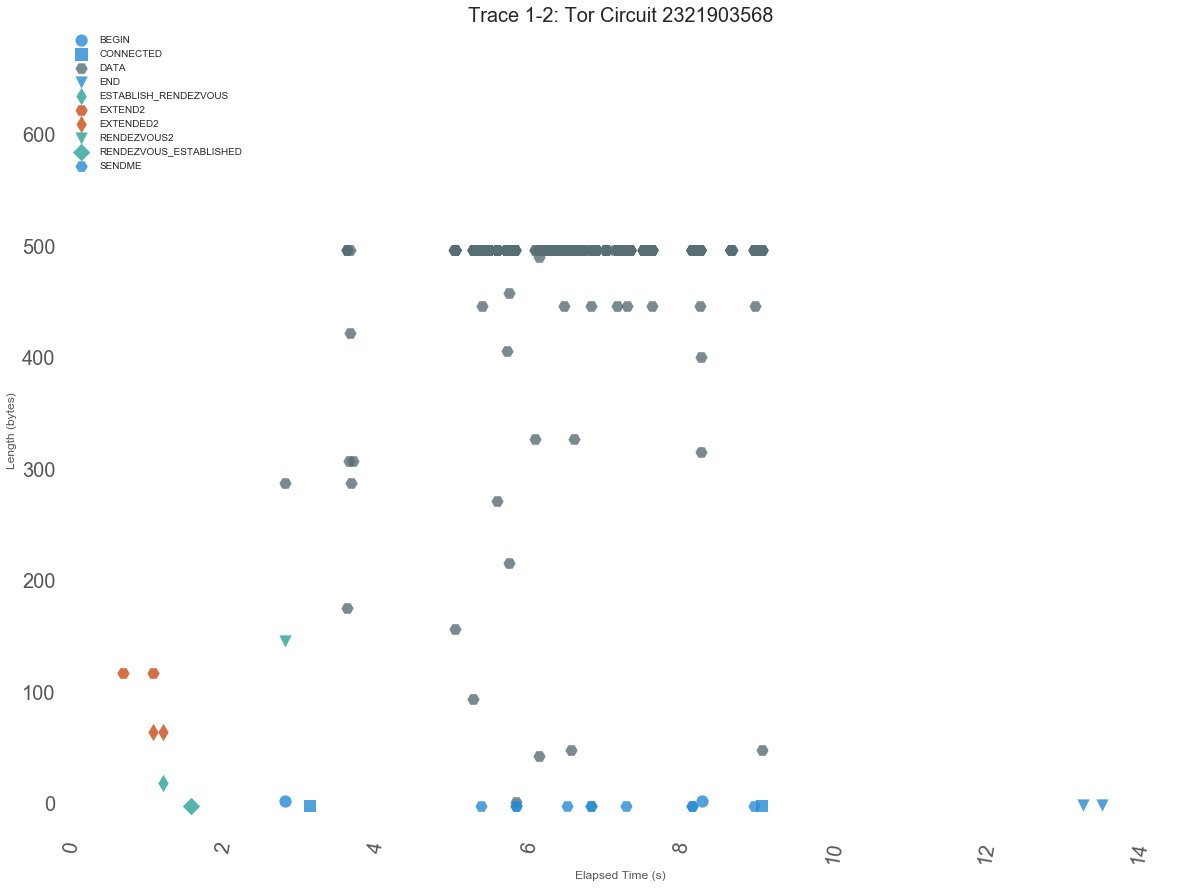

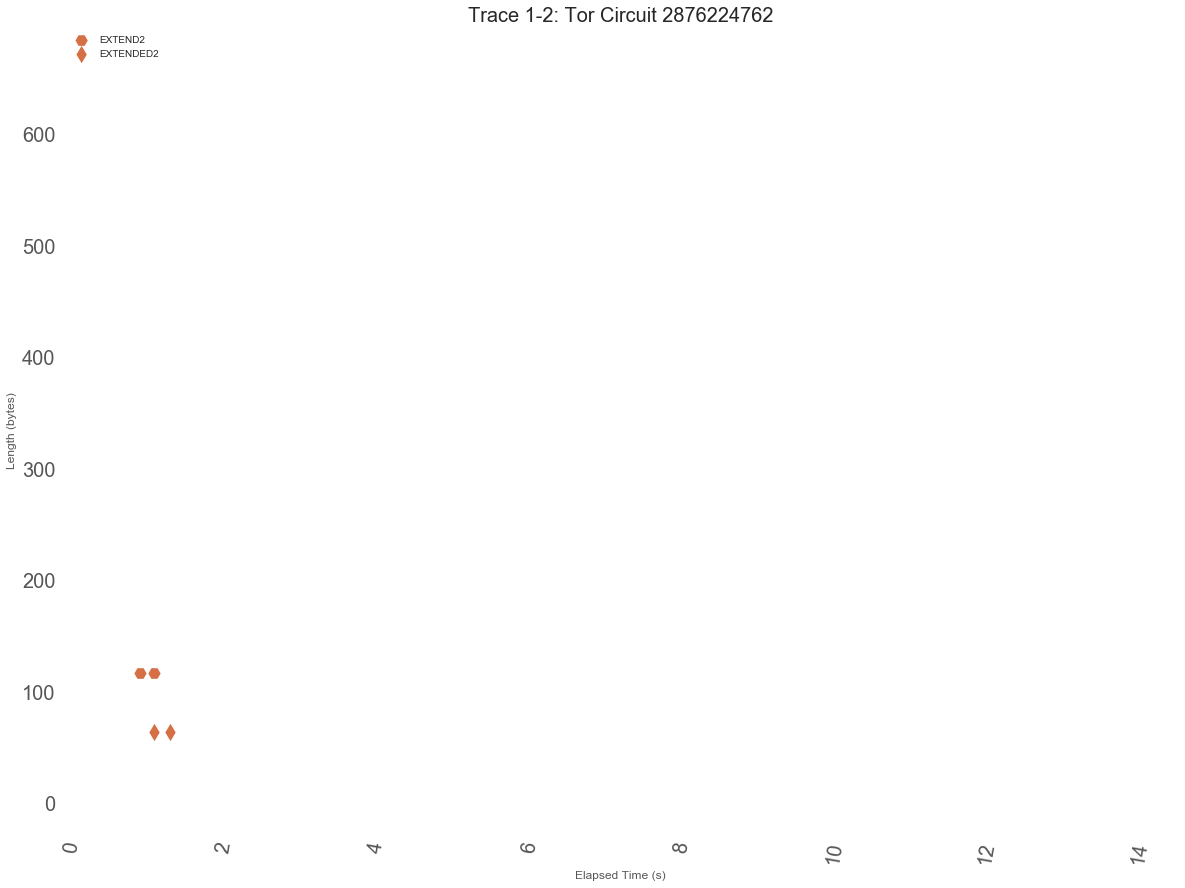

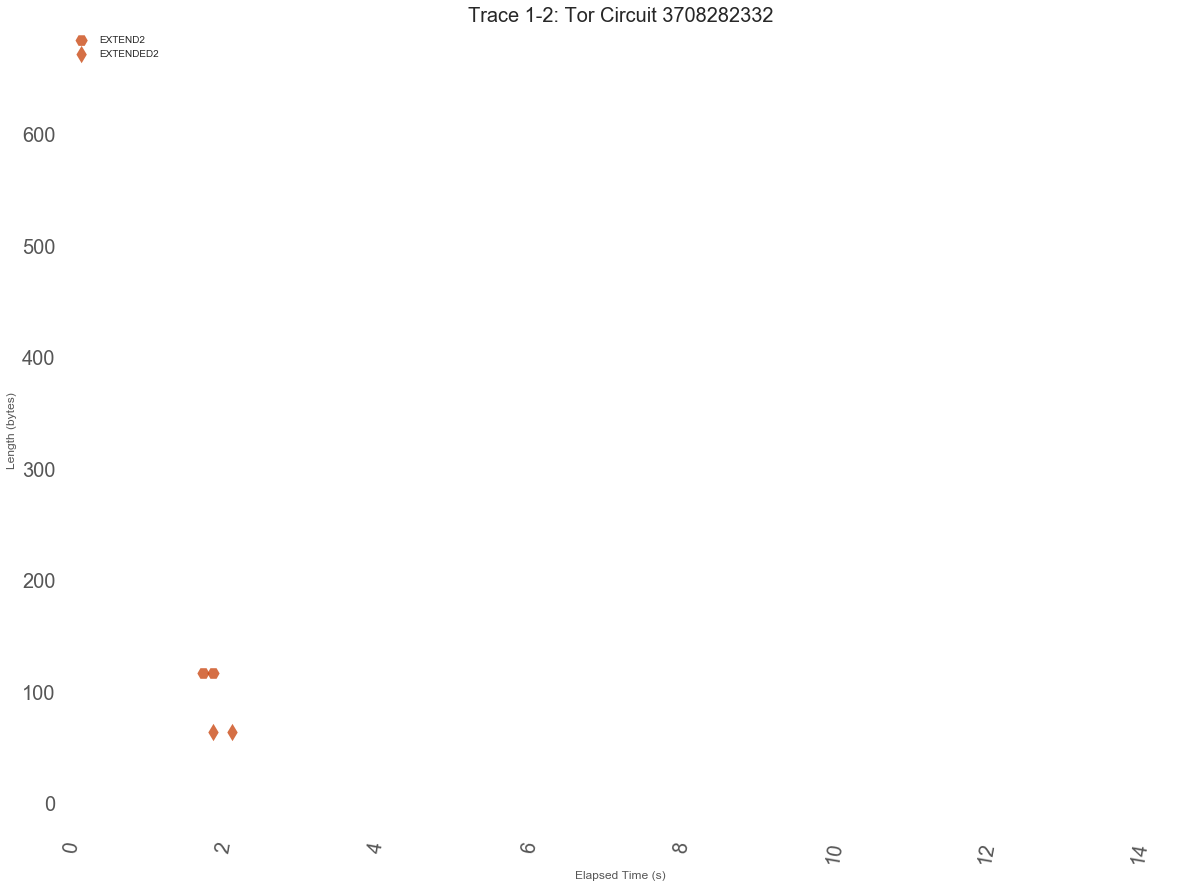

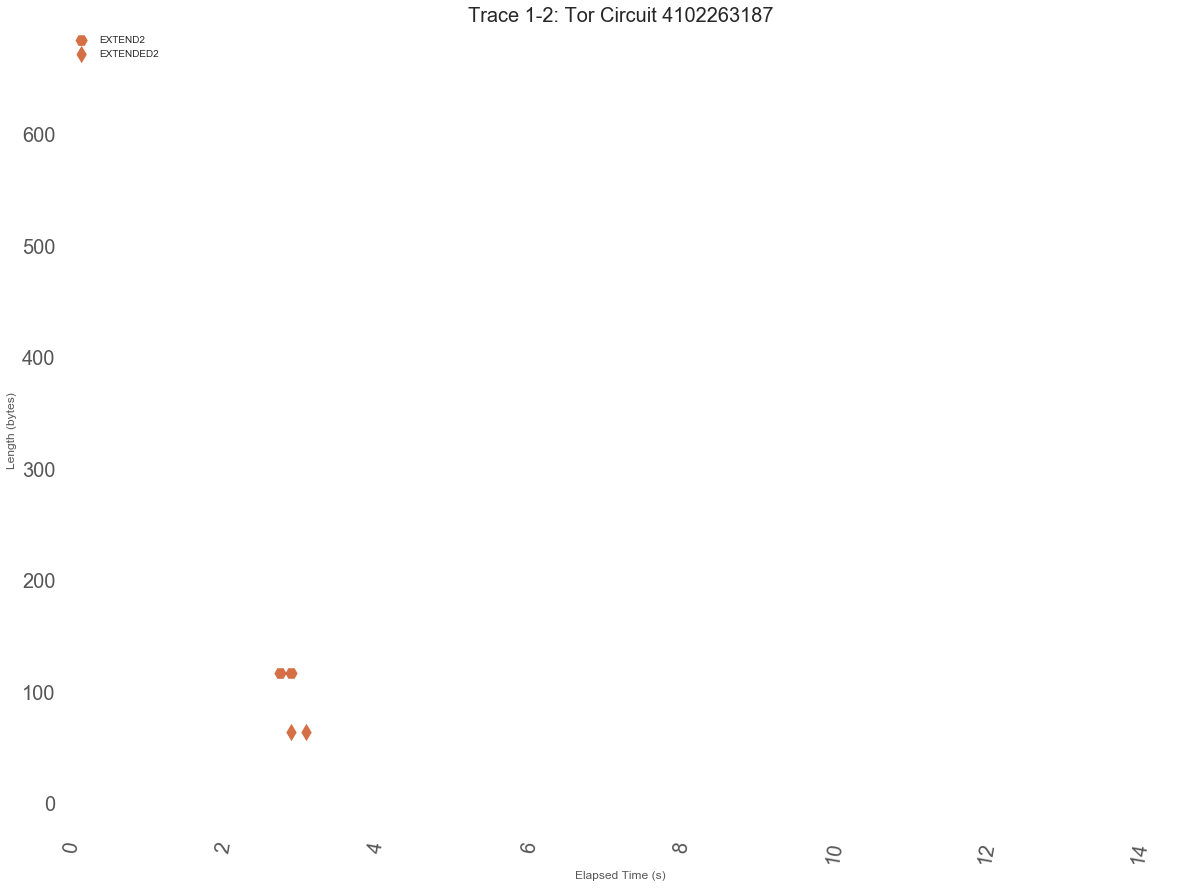

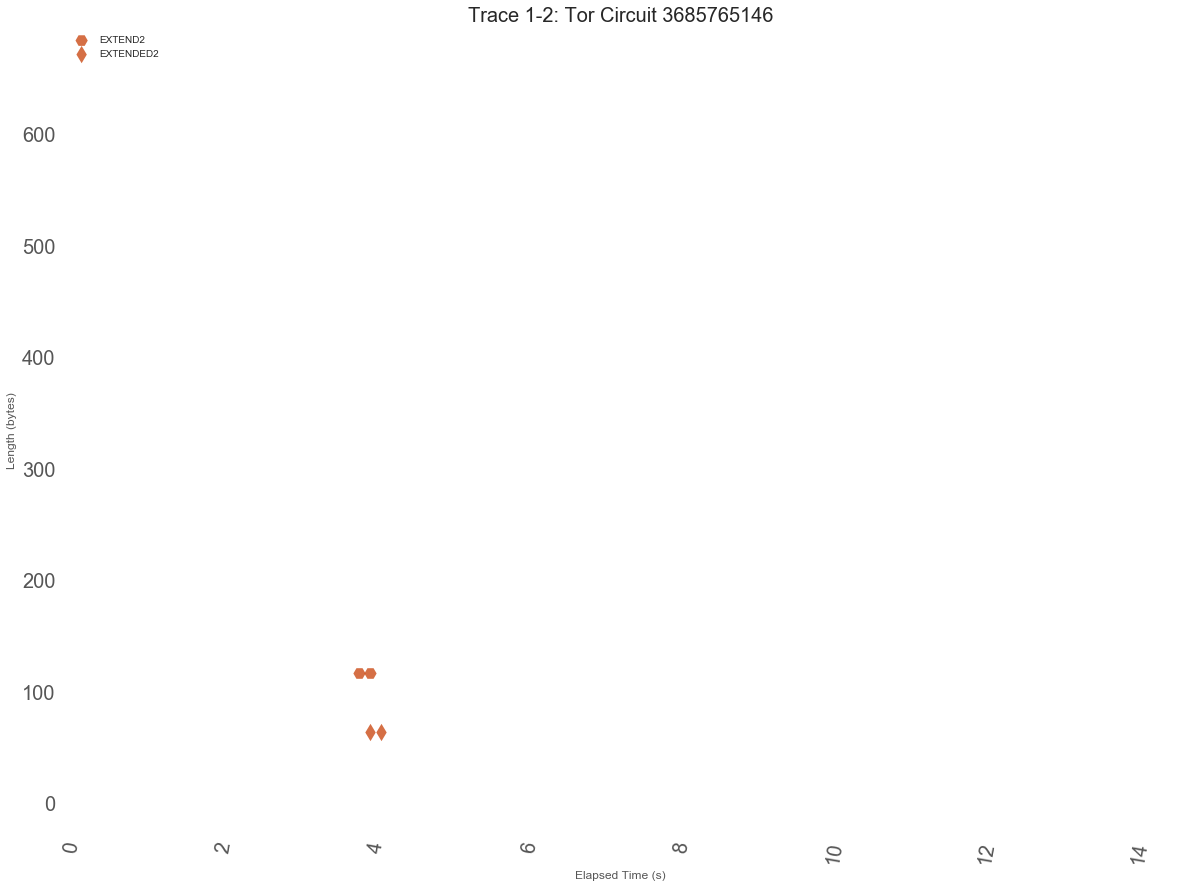

In [33]:
explore_circuit_streams(clean_trace('{}/{}'.format(traces_folder, '1-2-raw')), '1-2')